# **From Spikes to Signals: Country-Level Diagnostics of Google Trends Terms**

**Team 4:**
- Lifu Li
- Divyesh Sai Annavarapu
- Raskirt Bhatia
- Wenxin Liang
- Xingzhu Chen

## **1. Project Proposal**

### **1.1 Business Problem & Introduction:**

Organizations increasingly rely on Google Trends to understand public interest, yet most tools focus narrowly on ranking popular queries rather than explaining how attention behaves across different markets. In practice, countries exhibit widely varying levels of search volatility, topic concentration, and responsiveness to emerging events, but these structural differences are not explicitly measured or benchmarked.

Current dashboards also offer limited guidance on whether a trending term is likely to persist or fade quickly, making it difficult for teams to prioritize monitoring resources, plan campaigns, or interpret sudden spikes. Moreover, external forces such as coordinated spam activity or country-level digital constraints can distort search signals, further complicating cross-country comparisons.

This project addresses these gaps by systematically examining the underlying dynamics of Google Trends across countries and identifying structural factors that shape attention patterns. By focusing on persistence, diffusion, topic composition and their relationship with national characteristics, we aim to establish a diagnostic foundation for interpreting global search behavior, setting the stage for predictive modeling of trend survival.

### **1.2 Executive Summary**

This project evaluates whether global Google Trends spikes represent random fluctuations or structured attention patterns shaped by country-level environments. By analyzing temporal persistence, cross-country diffusion, topic composition, and macroeconomic indicators, we reveal consistent and interpretable differences in how national audiences generate and sustain search interest.

Our findings show a clear structural divide: emerging markets (e.g., Indonesia, Egypt) display highly volatile, burst-driven rising-term spikes, while mature economies (e.g., France, Japan) exhibit stable, diffuse attention with lower peak intensity. Wealthier countries also disperse attention across a broader set of topics, whereas lower-GDP markets concentrate more heavily on a few dominant queries. Political openness further moderates these dynamics, with low-freedom environments producing sharper, more reactive spikes. We additionally detect non-organic activity, such as coordinated gambling spam, propagating across multiple regions.

These insights point to actionable strategies. High-volatility markets benefit from rapid “blitz” activation, while mature markets reward sustained SEO-driven engagement. Organizations should tailor anomaly thresholds to each country’s baseline volatility and filter spam before integrating trend signals into decision workflows. This framework enables leaders to balance fast, high-risk attention capture with long-horizon, low-volatility engagement across global markets.

## **2. Data Preparation**

### **2.1 Data Description & Source**

**About Google Trends (for context)**

Google Trends measures relative search interest on Google over time. Values are normalized from 0–100, where 100 represents the peak popularity of a term within a given region and time window.

Google Trends provides two distinct types of search-query lists:

- Top Terms – the most consistently searched queries in a region (baseline popularity).

- Rising Terms – queries whose search interest is growing rapidly compared to a previous period (short-term momentum).

These definitions help interpret the two Google Trends tables used in our dataset.

**The Three Datasets We Are Using**

The dataset combines weekly, country-level search interest from Google Trends with annual country-level socioeconomic indicators from the World Bank’s World Development Indicators (WDI). It is publicly available via Google BigQuery and Kaggle, and comprises the following tables:

- **international_top_rising_terms** (Google Trends, BigQuery Public Datasets)

Coverage 8,747,342 rows and 10 columns data through 2020-08-23 to 2025-10-19 (weekly) across 42 countries/regions.

Description: Country-week “rising” queries that exhibit short-term momentum; includes fields for country, week, query term, and rising intensity (e.g., percent gain / relative surge), plus ranking metadata. The total size of this table is 17.63 GB.

- **international_top_terms** (Google Trends, BigQuery Public Datasets)

Coverage 1,363,914 rows and 9 columns data through 2020-08-30 to 2025-10-19 (weekly) across 42 countries/regions.

Description: Country-week “top” (baseline popularity) queries; includes fields for country, week, query term, popularity score, and rank, capturing sustained search interest. The total size of this table is 15.6 GB.

- **world_development_indicators** (World Bank WDI, Kaggle mirror)

It contains information about 268 countries and regions, including 48 features, all numerical,  measured from 1960 to 2022.

Description: Country-year macro indicators (e.g., GDP per capita, internet usage, governance, population). Used to contextualize cross-country differences and to build covariates for modeling search dynamics.

**Data Source:**

- Google Trends: The dataset comes from Google Trends, accessed via the Google BigQuery Public Datasets platform.
Link: https://console.cloud.google.com/bigquery?ws=!1m4!1m3!3m2!1sbigquery-public-data!2sgoogle_trends
- World Bank World Development Indicators: Extracted from the World Bank database.
Link: https://www.kaggle.com/datasets/nicolasgonzalezmunoz/world-bank-world-development-indicators

**Data Dictionary 1: Google Trends Rising Terms**

| Column Name      | Data Type | Description                                                                                                                                           |
| ---------------- | --------- | ----------------------------------------------------------------------------------------------------------------------------------------------------- |
| **country_name** | string    | Full name of the country where the search trend was recorded. Corresponds to the ISO country code.                                                    |
| **region_name**  | string    | Subregional classification of the country (e.g., “Europe & Central Asia”, “Latin America & Caribbean”), useful for regional aggregation.              |
| **region_code**  | string    | Abbreviated code representing the region, such as “LCN” for Latin America & Caribbean.                                                                |
| **week**         | date      | Start date of the weekly observation period in ISO format, defining the time window of measurement.                                                   |
| **score**        | long      | Relative search interest value (0–100) normalized by Google. Indicates proportional popularity rather than absolute search volume. Often missing on purpose in ‘Rising’ datasets.                   |
| **refresh_date** | date      | Date when Google refreshed the dataset. Primarily used for version tracking.                                                          |
| **country_code** | string    | Two-letter ISO country code identifying each country (e.g., “US”, “MX”, “IN”). Enables merging with external datasets such as WDI indicators.         |
| **term**         | string    | The search keyword or phrase identified as “rising” in a given country-week pair. May include multi-word terms.                                       |
| **rank**         | long      | Ranking of the term’s rising momentum within a country and week (1 = fastest rising). Lower values indicate stronger relative growth.                 |
| **percent_gain** | long      | Percent increase in search interest compared to the previous week. Higher values indicate stronger upward trends. |



**Data Dictionary 2: Google Trends Top Terms**

| Column Name      | Data Type | Description                                                                                                                                                                                                                                                                                                                                                                                                               |
| ---------------- | --------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **region_name**  | string    | Subregional classification of the country (e.g., “Europe & Central Asia”, “Latin America & Caribbean”), useful for geographic grouping and regional comparisons.                                                                                                                                                                                                                                                          |
| **rank**         | long      | The fixed ranking position of a search term within Google’s *Top N* list for that region (1 = most popular). The ranks are not recalculated weekly; Google first determines the top queries over a broader historical window (e.g., the past few months) and then attaches that same ranking to each weekly snapshot. Thus, `rank` reflects long-term popularity, not week-to-week change.                                |
| **refresh_date** | date      | The date when Google updated or extracted this dataset. All rows in the same export share the same value.                                                                                                                                                                                                                        |
| **country_name** | string    | Full name of the country where the search trend was recorded. Corresponds to the ISO country code.                                                                                                                                                                                                                                                                                                                        |
| **region_code**  | string    | Abbreviated regional identifier such as “LCN” for Latin America & Caribbean. Used to align countries with standardized global regions.                                                                                                                                                                                                                                                                                    |
| **term**         | string    | The actual search keyword or phrase included in Google’s Top Terms list for a given region. Represents consistently popular queries over an extended period.                                                                                                                                                                                                                                                              |
| **week**         | date      | The weekly snapshot label attached by Google when exporting the dataset. It does not represent a newly computed ranking for that specific week; the same ranking and term list are repeated for multiple weeks. This field serves only as a timestamp tag and does not add analytical value.                                                                                                                              |
| **score**        | long      | The relative search interest value (0–100) standardized by Google within the same region and time window. The top-ranked term in each region is scaled to 100, and others are proportionally smaller. Many scores are missing because Google suppresses values for low-volume or privacy-sensitive queries. Therefore, `score` indicates relative strength among top terms but cannot be compared across regions or time. |
| **country_code** | string    | Two-letter ISO country code identifying each country (e.g., “US”, “IN”, “BR”). Enables merging with other datasets such as WDI indicators.                                                                                                                                                                                                                                                                                |


**Data Dictionary 3: World Bank Development Indicators** (Selected Project-related Variables)

| Column Name                           | Data Type | Description                                                                                                                                                                                                                                                                                      |
| ------------------------------------- | --------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| **country**                           | string    | Full name of the country as reported by the World Bank. Serves as the primary geographic identifier for each observation.                                                                                                                                                                        |
| **date**                              | date      | The calendar year corresponding to the observation. WDI data are reported annually.                                                                                                                                                                                                              |
| **goverment_effectiveness_estimate**  | float     | An index capturing perceptions of the quality of public services, the competence and independence of the civil service, the quality of policy formulation and implementation, and the government’s credibility in committing to such policies. Ranges roughly from −2.5 (weak) to +2.5 (strong). |
| **individuals_using_internet%**       | float     | The percentage of individuals in a country who have used the internet (from any location) within the last three months. It reflects access to and adoption of digital technology among the population.                                                                                           |
| **GDP_current_US**                    | float     | Gross Domestic Product (GDP) measured in current U.S. dollars. Represents the market value of all final goods and services produced within a country’s borders during a specific year, using current prices and exchange rates.                                                                  |
| **voice_and_accountability_estimate** | float     | An index measuring perceptions of the extent to which a country's citizens are able to participate in selecting their government, as well as freedom of expression, freedom of association, and a free media. Ranges from −2.5 (weak) to +2.5 (strong).                                          |
| **population**                        | float     | The total number of residents, regardless of legal status or citizenship. It measures mid-year estimates based on the factual population counts.                                                                                                                                                 |


### **2.2 Data Import**

In [1]:
!pip install -q wordcloud

In [2]:
!pip install -q adjustText

In [3]:
from pyspark.sql import functions as F, types as T, Window as W, DataFrame
from functools import reduce
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import display
from wordcloud import WordCloud
import networkx as nx
from adjustText import adjust_text
from scipy.stats import pearsonr
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from sklearn.metrics import roc_curve, auc

In [4]:
pd.set_option('display.max_colwidth', None)

In [5]:
# Table 1: international_top_rising_term

gcs_path = "gs://team-4-project/dataset/international_top_rising_term_*.parquet"

international_top_rising_term = (
    spark.read
    .parquet(gcs_path)
)

international_top_rising_term.printSchema()
international_top_rising_term.show(5)

root
 |-- country_name: string (nullable = true)
 |-- region_name: string (nullable = true)
 |-- region_code: string (nullable = true)
 |-- week: date (nullable = true)
 |-- score: long (nullable = true)
 |-- refresh_date: date (nullable = true)
 |-- country_code: string (nullable = true)
 |-- term: string (nullable = true)
 |-- rank: long (nullable = true)
 |-- percent_gain: long (nullable = true)



+------------+-----------------+-----------+----------+-----+------------+------------+--------------+----+------------+
|country_name|      region_name|region_code|      week|score|refresh_date|country_code|          term|rank|percent_gain|
+------------+-----------------+-----------+----------+-----+------------+------------+--------------+----+------------+
|     Ukraine|Vinnyts'ka oblast|      UA-05|2020-10-18| NULL|  2025-10-08|          UA|6 жовтня свято|  22|         180|
|     Ukraine|Vinnyts'ka oblast|      UA-05|2020-11-15| NULL|  2025-10-08|          UA|6 жовтня свято|  22|         180|
|     Ukraine|Vinnyts'ka oblast|      UA-05|2021-03-21| NULL|  2025-10-08|          UA|6 жовтня свято|  22|         180|
|     Ukraine|Vinnyts'ka oblast|      UA-05|2021-04-11| NULL|  2025-10-08|          UA|6 жовтня свято|  22|         180|
|     Ukraine|Vinnyts'ka oblast|      UA-05|2021-06-13| NULL|  2025-10-08|          UA|6 жовтня свято|  22|         180|
+------------+-----------------+

In [6]:
international_top_rising_term.createOrReplaceTempView("international_top_rising_term")

spark.sql("""
SELECT
  MIN(to_date(week, 'yyyy-MM-dd')) AS min_week,
  MAX(to_date(week, 'yyyy-MM-dd')) AS max_week,
  COUNT(DISTINCT country_name) AS unique_country_count
FROM international_top_rising_term
""").show(truncate=False)

+----------+----------+--------------------+
|min_week  |max_week  |unique_country_count|
+----------+----------+--------------------+
|2020-08-23|2025-10-19|42                  |
+----------+----------+--------------------+



In [7]:
# Table 2: international_top_rising_term

gcs_path = "gs://team-4-project/dataset/international_top_term_*.parquet"

international_top_term = (
    spark.read
    .parquet(gcs_path)
)

international_top_term.printSchema()
international_top_term.show(5)

root
 |-- region_name: string (nullable = true)
 |-- rank: long (nullable = true)
 |-- refresh_date: date (nullable = true)
 |-- country_name: string (nullable = true)
 |-- region_code: string (nullable = true)
 |-- term: string (nullable = true)
 |-- week: date (nullable = true)
 |-- score: long (nullable = true)
 |-- country_code: string (nullable = true)

+--------------+----+------------+------------+-----------+----------+----------+-----+------------+
|   region_name|rank|refresh_date|country_name|region_code|      term|      week|score|country_code|
+--------------+----+------------+------------+-----------+----------+----------+-----+------------+
|Aguascalientes|   8|  2025-10-06|      Mexico|     MX-AGU|31 minutos|2020-10-11| NULL|          MX|
|Aguascalientes|   8|  2025-10-06|      Mexico|     MX-AGU|31 minutos|2020-10-25| NULL|          MX|
|Aguascalientes|   8|  2025-10-06|      Mexico|     MX-AGU|31 minutos|2020-11-29| NULL|          MX|
|Aguascalientes|   8|  2025-10-06

In [8]:
international_top_term.createOrReplaceTempView("international_top_term")

spark.sql("""
SELECT
  MIN(to_date(week, 'yyyy-MM-dd')) AS min_week,
  MAX(to_date(week, 'yyyy-MM-dd')) AS max_week,
  COUNT(DISTINCT country_name) AS unique_country_count
FROM international_top_term
""").show(truncate=False)

+----------+----------+--------------------+
|min_week  |max_week  |unique_country_count|
+----------+----------+--------------------+
|2020-08-30|2025-10-19|42                  |
+----------+----------+--------------------+



In [9]:
# Table 3: world_bank_development_indicators

schema_world_bank = T.StructType([
    T.StructField("country", T.StringType(), True),
    T.StructField("date", T.DateType(), True),
    T.StructField("agricultural_land%", T.FloatType(), True),
    T.StructField("forest_land%", T.FloatType(), True),
    T.StructField("land_area", T.FloatType(), True),
    T.StructField("avg_precipitation", T.FloatType(), True),
    T.StructField("trade_in_services%", T.FloatType(), True),
    T.StructField("control_of_corruption_estimate", T.FloatType(), True),
    T.StructField("control_of_corruption_std", T.FloatType(), True),
    T.StructField("access_to_electricity%", T.FloatType(), True),
    T.StructField("renewvable_energy_consumption%", T.FloatType(), True),
    T.StructField("electric_power_consumption", T.FloatType(), True),
    T.StructField("CO2_emisions", T.FloatType(), True),
    T.StructField("other_greenhouse_emisions", T.FloatType(), True),
    T.StructField("population_density", T.FloatType(), True),
    T.StructField("inflation_annual%", T.FloatType(), True),
    T.StructField("real_interest_rate", T.FloatType(), True),
    T.StructField("risk_premium_on_lending", T.FloatType(), True),
    T.StructField("research_and_development_expenditure%", T.FloatType(), True),
    T.StructField("central_goverment_debt%", T.FloatType(), True),
    T.StructField("tax_revenue%", T.FloatType(), True),
    T.StructField("expense%", T.FloatType(), True),
    T.StructField("goverment_effectiveness_estimate", T.FloatType(), True),
    T.StructField("goverment_effectiveness_std", T.FloatType(), True),
    T.StructField("human_capital_index", T.FloatType(), True),
    T.StructField("doing_business", T.FloatType(), True),
    T.StructField("time_to_get_operation_license", T.FloatType(), True),
    T.StructField("statistical_performance_indicators", T.FloatType(), True),
    T.StructField("individuals_using_internet%", T.FloatType(), True),
    T.StructField("logistic_performance_index", T.FloatType(), True),
    T.StructField("military_expenditure%", T.FloatType(), True),
    T.StructField("GDP_current_US", T.FloatType(), True),
    T.StructField("political_stability_estimate", T.FloatType(), True),
    T.StructField("political_stability_std", T.FloatType(), True),
    T.StructField("rule_of_law_estimate", T.FloatType(), True),
    T.StructField("rule_of_law_std", T.FloatType(), True),
    T.StructField("regulatory_quality_estimate", T.FloatType(), True),
    T.StructField("regulatory_quality_std", T.FloatType(), True),
    T.StructField("government_expenditure_on_education%", T.FloatType(), True),
    T.StructField("government_health_expenditure%", T.FloatType(), True),
    T.StructField("multidimensional_poverty_headcount_ratio%", T.FloatType(), True),
    T.StructField("gini_index", T.FloatType(), True),
    T.StructField("birth_rate", T.FloatType(), True),
    T.StructField("death_rate", T.FloatType(), True),
    T.StructField("life_expectancy_at_birth", T.FloatType(), True),
    T.StructField("population", T.FloatType(), True),
    T.StructField("rural_population", T.FloatType(), True),
    T.StructField("voice_and_accountability_estimate", T.FloatType(), True),
    T.StructField("voice_and_accountability_std", T.FloatType(), True),
    T.StructField("intentional_homicides", T.FloatType(), True)
])

gcs_path_csv = "gs://team-4-project/dataset/world_bank_development_indicators.csv"

world_bank = (
    spark.read
    .option("header", "true")
    .option("nullValue", "NA")
    .schema(schema_world_bank)
    .csv(gcs_path_csv)
)

world_bank.printSchema()
world_bank.show(2, truncate = False)

root
 |-- country: string (nullable = true)
 |-- date: date (nullable = true)
 |-- agricultural_land%: float (nullable = true)
 |-- forest_land%: float (nullable = true)
 |-- land_area: float (nullable = true)
 |-- avg_precipitation: float (nullable = true)
 |-- trade_in_services%: float (nullable = true)
 |-- control_of_corruption_estimate: float (nullable = true)
 |-- control_of_corruption_std: float (nullable = true)
 |-- access_to_electricity%: float (nullable = true)
 |-- renewvable_energy_consumption%: float (nullable = true)
 |-- electric_power_consumption: float (nullable = true)
 |-- CO2_emisions: float (nullable = true)
 |-- other_greenhouse_emisions: float (nullable = true)
 |-- population_density: float (nullable = true)
 |-- inflation_annual%: float (nullable = true)
 |-- real_interest_rate: float (nullable = true)
 |-- risk_premium_on_lending: float (nullable = true)
 |-- research_and_development_expenditure%: float (nullable = true)
 |-- central_goverment_debt%: float (n

25/12/09 18:43:09 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-----------+----------+------------------+------------+---------+-----------------+------------------+------------------------------+-------------------------+----------------------+------------------------------+--------------------------+------------+-------------------------+------------------+-----------------+------------------+-----------------------+-------------------------------------+-----------------------+------------+--------+--------------------------------+---------------------------+-------------------+--------------+-----------------------------+----------------------------------+---------------------------+--------------------------+---------------------+--------------+----------------------------+-----------------------+--------------------+---------------+---------------------------+----------------------+------------------------------------+------------------------------+-----------------------------------------+----------+----------+----------+-------------------

### **2.3 Data Cleaning**

#### **Table 1: international_top_rising_term**

Following the data dictionary, we drop columns unrelated to our project and remove any resulting duplicate rows.

In [10]:
rising_term = international_top_rising_term.drop(
    "score", "region_name", "region_code", "country_code"
    ).dropDuplicates()

Next, before clearing other columns, we want to have better understanding of the "refresh_date" column, which is always used for version control.

In [11]:
rising_term.select("refresh_date").distinct().orderBy("refresh_date").show(10, truncate=False)

+------------+
|refresh_date|
+------------+
|2025-08-24  |
|2025-08-25  |
|2025-08-27  |
|2025-08-28  |
|2025-08-29  |
|2025-08-30  |
|2025-09-01  |
|2025-09-03  |
|2025-09-04  |
|2025-09-07  |
+------------+
only showing top 10 rows



In [12]:
(
    rising_term
    .select("country_name", "term", "refresh_date", "rank", "percent_gain")
    .groupBy("country_name", "term", "refresh_date", "rank", "percent_gain")
    .count()
    .orderBy("country_name", "term", "refresh_date")
    .show(20, truncate=False)
)

+------------+--------------------------+------------+----+------------+-----+
|country_name|term                      |refresh_date|rank|percent_gain|count|
+------------+--------------------------+------------+----+------------+-----+
|Argentina   |27º aniversario de google |2025-09-28  |1   |40550       |261  |
|Argentina   |27º aniversario de google |2025-09-29  |1   |56150       |262  |
|Argentina   |a que hora juega argentina|2025-10-16  |24  |650         |262  |
|Argentina   |a que hora juega river    |2025-10-03  |19  |550         |262  |
|Argentina   |a que hora juega river    |2025-10-04  |16  |300         |261  |
|Argentina   |a qué hora juega argentina|2025-10-16  |23  |750         |262  |
|Argentina   |ace frehley               |2025-10-18  |5   |4500        |261  |
|Argentina   |adriana lima              |2025-10-17  |19  |600         |262  |
|Argentina   |afip                      |2025-10-08  |22  |250         |262  |
|Argentina   |al ittihad al-nassr       |2025-09-27 

In [13]:
week_per_refresh = (
    rising_term
    .groupBy("refresh_date")
    .agg(
        F.countDistinct("week").alias("unique_weeks"),
        F.min("week").alias("min_week"),
        F.max("week").alias("max_week")
    )
    .orderBy("refresh_date")
)

week_per_refresh.show(20, truncate=False)


+------------+------------+----------+----------+
|refresh_date|unique_weeks|min_week  |max_week  |
+------------+------------+----------+----------+
|2025-08-24  |261         |2020-08-23|2025-08-17|
|2025-08-25  |262         |2020-08-23|2025-08-24|
|2025-08-27  |262         |2020-08-23|2025-08-24|
|2025-08-28  |262         |2020-08-23|2025-08-24|
|2025-08-29  |262         |2020-08-23|2025-08-24|
|2025-08-30  |261         |2020-08-30|2025-08-24|
|2025-09-01  |262         |2020-08-30|2025-08-31|
|2025-09-03  |262         |2020-08-30|2025-08-31|
|2025-09-04  |262         |2020-08-30|2025-08-31|
|2025-09-07  |261         |2020-09-06|2025-08-31|
|2025-09-08  |262         |2020-09-06|2025-09-07|
|2025-09-09  |262         |2020-09-06|2025-09-07|
|2025-09-10  |262         |2020-09-06|2025-09-07|
|2025-09-11  |262         |2020-09-06|2025-09-07|
|2025-09-12  |262         |2020-09-06|2025-09-07|
|2025-09-13  |261         |2020-09-13|2025-09-07|
|2025-09-14  |261         |2020-09-13|2025-09-07|


In [14]:
#Sanity Check
check = (
    rising_term
    .groupBy("refresh_date", "country_name", "term")
    .agg(
        F.countDistinct("rank").alias("n_rank"),
        F.countDistinct("percent_gain").alias("n_pg")
    )
    .orderBy(F.desc("n_rank"), F.desc("n_pg"))
)

check.show()

+------------+--------------+--------------------+------+----+
|refresh_date|  country_name|                term|n_rank|n_pg|
+------------+--------------+--------------------+------+----+
|  2025-10-08|        France|    montmartre serie|     1|   1|
|  2025-10-03|United Kingdom|premium bond checker|     1|   1|
|  2025-10-20|       Hungary|manchester city–e...|     1|   1|
|  2025-09-24|        Turkey|สล็อต pgstar777 b...|     1|   1|
|  2025-10-03|         Chile|alianza lima atlé...|     1|   1|
|  2025-10-21|   Switzerland|         real madrid|     1|   1|
|  2025-10-06|       Germany|leverkusen – unio...|     1|   1|
|  2025-10-19|       Finland|        mikki kauste|     1|   1|
|  2025-10-20|     Australia|           mason cox|     1|   1|
|  2025-10-09|        Turkey|สล็อต pggroup777 ...|     1|   1|
|  2025-09-22|Czech Republic|zlín – hradec krá...|     1|   1|
|  2025-10-04|         Egypt|slot gaming we368...|     1|   1|
|  2025-09-24|       Ukraine|        артем дубнов|     

To gain a more intuitive understanding of the significance of refresh dates, we can examine data from a specific country and a specific term on a single refresh day.

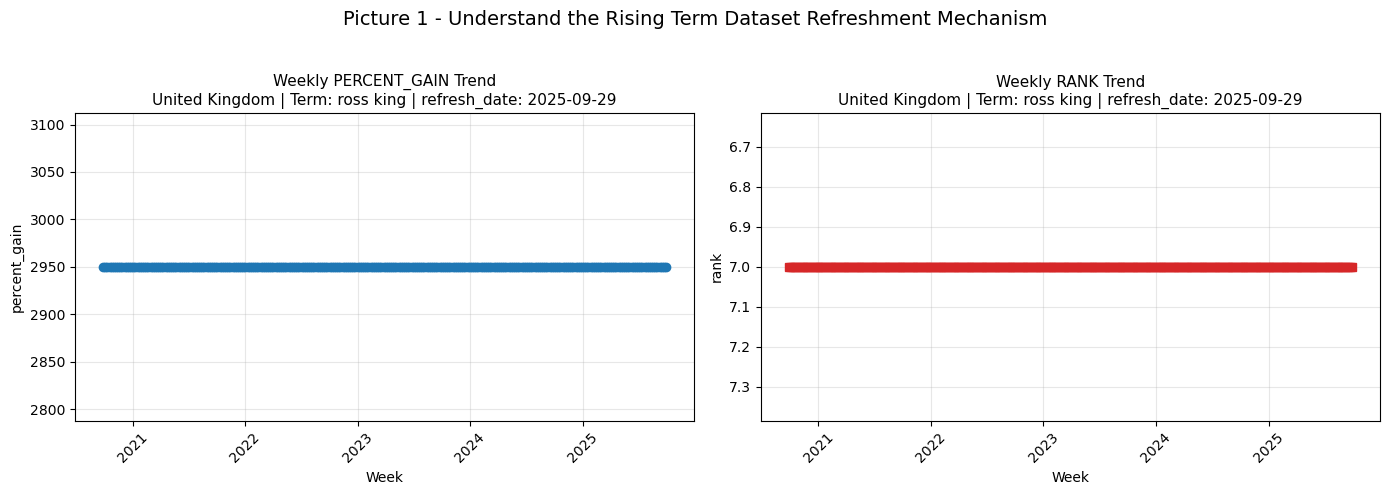

In [15]:
target_country = "United Kingdom"

rising_all_week = rising_term.withColumn("week_date", F.to_date("week"))

# Randomly sample one (term, refresh_date)
sample_row = (
    rising_all_week
    .filter(F.col("country_name") == target_country)
    .select("term", "refresh_date")
    .dropDuplicates()
    .orderBy(F.rand(seed=843))
    .limit(1)
    .collect()[0]
)

target_term = sample_row["term"]
target_refresh_date = sample_row["refresh_date"]

term_week_sdf = (
    rising_all_week
    .filter(
        (F.col("country_name") == target_country) &
        (F.col("term") == target_term) &
        (F.col("refresh_date") == target_refresh_date)
    )
    .groupBy("week_date")
    .agg(
        F.avg("percent_gain").alias("percent_gain"),
        F.avg("rank").alias("rank")
    )
    .orderBy("week_date")
)

term_week_pdf = term_week_sdf.toPandas()


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), sharey=False)
fig.suptitle(
    "Picture 1 - Understand the Rising Term Dataset Refreshment Mechanism",
    fontsize=14
)

ax1.plot(
    term_week_pdf["week_date"],
    term_week_pdf["percent_gain"],
    marker="o",
    linestyle="-"
)
ax1.set_title(
    f"Weekly PERCENT_GAIN Trend\n{target_country} | Term: {target_term} | refresh_date: {target_refresh_date}",
    fontsize=11
)
ax1.set_xlabel("Week")
ax1.set_ylabel("percent_gain")
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

ax2.plot(
    term_week_pdf["week_date"],
    term_week_pdf["rank"],
    marker="s",
    linestyle="--",
    color="tab:red"
)
ax2.set_title(
    f"Weekly RANK Trend\n{target_country} | Term: {target_term} | refresh_date: {target_refresh_date}",
    fontsize=11
)
ax2.set_xlabel("Week")
ax2.set_ylabel("rank")
ax2.invert_yaxis()   # Rank 1 = highest
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Based on the results of the above code and visual inspection, we observed that the rising_term dataset operates as a rolling snapshot rather than a continuously accumulated time series. The distinct refresh_date values indicate that Google Trends updates its dataset almost daily, and within each refresh, identical combinations of country_name, term, rank, and percent_gain are repeated multiple times. Moreover, each refresh covers roughly 260 distinct week values, with both the earliest and latest weeks shifting forward together as the refresh date advances. These patterns suggest that every refresh is essentially a full rewrite of historical data rather than an incremental update, causing substantial redundancy across refreshes.

To simplify data management and reduce duplication, we compress each refresh_date by aggregating repeated observations of the same country–term pair into a single constant record and drop the week column, retaining only stable identifiers and metrics for subsequent analysis.

In [16]:
rising_term = rising_term.drop('week').dropDuplicates()
rising_term.cache()
rising_term.show(5, truncate=False)

+------------+------------+------------------------+----+------------+
|country_name|refresh_date|term                    |rank|percent_gain|
+------------+------------+------------------------+----+------------+
|Italy       |2025-09-30  |daniele lavia           |14  |1150        |
|France      |2025-09-30  |alcaraz                 |20  |100         |
|Colombia    |2025-10-21  |liverpool               |19  |1300        |
|Poland      |2025-10-20  |fc barcelona – girona fc|1   |14350       |
|Netherlands |2025-10-03  |jeroen kramer           |16  |550         |
+------------+------------+------------------------+----+------------+
only showing top 5 rows



In [17]:
# Check missing values
rising_term.select(
    F.count("*").alias("total_rows"),
    F.count(F.when(F.col("country_name").isNull(), 1)).alias("country_name_NA"),
    F.count(F.when(F.col("refresh_date").isNull(), 1)).alias("refresh_date_NA"),
    F.count(F.when(F.col("term").isNull(), 1)).alias("term_NA"),
    F.count(F.when(F.col("rank").isNull(), 1)).alias("rank_NA"),
    F.count(F.when(F.col("percent_gain").isNull(), 1)).alias("percent_gain_NA")
).show(truncate=False)

+----------+---------------+---------------+-------+-------+---------------+
|total_rows|country_name_NA|refresh_date_NA|term_NA|rank_NA|percent_gain_NA|
+----------+---------------+---------------+-------+-------+---------------+
|33500     |0              |0              |0      |0      |0              |
+----------+---------------+---------------+-------+-------+---------------+



#### **Table 2: international_top_term**

Following the data dictionary, we drop columns unrelated to our project and remove any resulting duplicate rows.

In [18]:
top_term = international_top_term.drop("region_name", "region_code", "country_code").dropDuplicates()

And then, similarly, we need to have better understanding of "refresh_date" to the top terms table.

In [19]:
top_term.select("refresh_date").distinct().orderBy("refresh_date").show(10, truncate=False)

(
    top_term
    .select("country_name", "term", "refresh_date", "rank", "score")
    .groupBy("country_name", "term", "refresh_date", "rank", "score")
    .count()
    .orderBy(F.desc("count"))
    .show(20, truncate=False)
)

+------------+
|refresh_date|
+------------+
|2025-09-01  |
|2025-09-10  |
|2025-09-11  |
|2025-09-14  |
|2025-09-16  |
|2025-09-17  |
|2025-09-18  |
|2025-09-19  |
|2025-09-20  |
|2025-09-21  |
+------------+
only showing top 10 rows



+------------+---------------------------------+------------+----+-----+-----+
|country_name|term                             |refresh_date|rank|score|count|
+------------+---------------------------------+------------+----+-----+-----+
|Chile       |31 minutos                       |2025-10-06  |1   |NULL |262  |
|Finland     |roope salminen                   |2025-10-08  |19  |NULL |262  |
|Germany     |birce akalay                     |2025-10-17  |24  |NULL |262  |
|Hungary     |nyugdíjemelés 2026               |2025-10-08  |5   |NULL |262  |
|Japan       |岩屋外務大臣                     |2025-09-25  |21  |NULL |262  |
|Indonesia   |meyden                           |2025-10-07  |4   |NULL |262  |
|Italy       |ondata di freddo                 |2025-10-02  |11  |NULL |262  |
|South Africa|mount everest                    |2025-10-06  |6   |NULL |262  |
|Brazil      |calendario outubro               |2025-09-29  |21  |NULL |262  |
|Ukraine     |world cup qualifiers             |2025-10-13

In [20]:
#Sanity Check
check = (
    top_term
    .groupBy("refresh_date", "country_name", "term")
    .agg(
        F.countDistinct("rank").alias("n_rank"),
        F.countDistinct("score").alias("n_score")
    )
    .orderBy(F.desc("n_rank"), F.desc("n_score"))
)

check.show()

+------------+------------+--------------------+------+-------+
|refresh_date|country_name|                term|n_rank|n_score|
+------------+------------+--------------------+------+-------+
|  2025-10-04|       Japan|            松本若菜|     1|    100|
|  2025-10-01|       India|               ilt20|     1|    100|
|  2025-10-10|     Vietnam|                xsmn|     1|    100|
|  2025-10-04|     Vietnam|      xổ số miền nam|     1|    100|
|  2025-09-21|    Thailand|         แอสตันวิลลา|     1|    100|
|  2025-09-26|       Japan|            米倉涼子|     1|    100|
|  2025-09-26|     Vietnam|               barca|     1|    100|
|  2025-10-06|      Turkey| selahattin demirtaş|     1|    100|
|  2025-10-21|      Turkey|uzak şehir son bö...|     1|    100|
|  2025-09-22|     Nigeria|     fabrizio romano|     1|    100|
|  2025-10-12|       Japan|                dena|     1|    100|
|  2025-10-04|       Egypt|        ترتيب الدوري|     1|    100|
|  2025-09-21|     Vietnam|           newcastle|

The situation differs from what we observed in the rising terms table. Although each refresh_date still contains only one unique rank across all weeks, the scores vary substantially, with around 100 distinct values. To better understand the refresh mechanism of the top terms table, we examine the data for a specific country and term within a single refresh day to gain a more intuitive view of how these values behave.

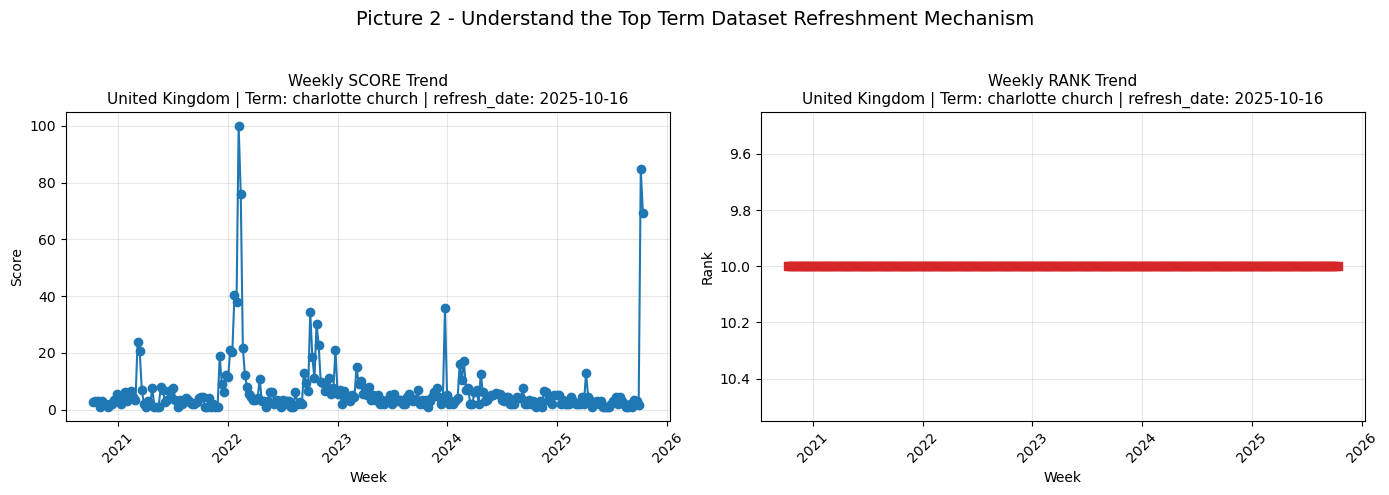

In [21]:
target_country = "United Kingdom"
top_all_week = top_term.withColumn("week_date", F.to_date("week"))

sample_row = (
    top_all_week
    .filter(F.col("country_name") == target_country)
    .select("term", "refresh_date")
    .dropDuplicates()
    .orderBy(F.rand(seed=147))
    .limit(1)
    .collect()[0]
)

target_term = sample_row["term"]
target_refresh_date = sample_row["refresh_date"]

term_week_sdf = (
    top_all_week
    .filter(
        (F.col("country_name") == target_country) &
        (F.col("term") == target_term) &
        (F.col("refresh_date") == target_refresh_date)
    )
    .groupBy("week_date")
    .agg(
        F.avg("score").alias("score"),
        F.avg("rank").alias("rank")
    )
    .orderBy("week_date")
)

term_week_pdf = term_week_sdf.toPandas()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), sharey=False)
fig.suptitle(
    "Picture 2 - Understand the Top Term Dataset Refreshment Mechanism",
    fontsize=14
)

ax1.plot(
    term_week_pdf["week_date"],
    term_week_pdf["score"],
    marker="o",
    linestyle="-"
)
ax1.set_title(
    f"Weekly SCORE Trend\n{target_country} | Term: {target_term} | refresh_date: {target_refresh_date}",
    fontsize=11
)
ax1.set_xlabel("Week")
ax1.set_ylabel("Score")
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

ax2.plot(
    term_week_pdf["week_date"],
    term_week_pdf["rank"],
    marker="s",
    linestyle="--",
    color="tab:red"
)
ax2.set_title(
    f"Weekly RANK Trend\n{target_country} | Term: {target_term} | refresh_date: {target_refresh_date}",
    fontsize=11
)
ax2.set_xlabel("Week")
ax2.set_ylabel("Rank")
ax2.invert_yaxis()
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Based on the results of our sanity-check code and the visual inspection, we observe that the rank column in the top_term table behaves similarly to that in the rising terms dataset, its value remains constant within each (country, term, refresh_date) group and therefore does not contribute meaningful temporal variation. However, the score column shows a fundamentally different pattern. For every refresh_date, Google retains roughly 100 historical weeks of score values, forming a genuine five-year time series that reflects the long-term popularity dynamics of each term within each country, including visible peaks and troughs. This means we cannot simply compress all weeks into a single value, nor can we mix the weekly score series across different refresh_date snapshots without distorting the underlying signal.

Therefore, in subsequent analyses of the top terms dataset, we adopt a two-part strategy:

- For understanding Google’s update behavior, we retain all records across refresh_date and analyze trends during those refresh period.

- For any analysis involving the actual time-series behavior of a term’s score, we rely exclusively on the most recent refresh_date snapshot to avoid mixing incompatible historical series and to preserve internal consistency.

In [22]:
latest_date = top_term.agg(F.max("refresh_date").alias("latest")).collect()[0]["latest"]
top_latest = top_term.filter(F.col("refresh_date") == latest_date).drop("week").dropDuplicates()
top_term.cache()
top_latest.cache()
top_term.show(5, truncate=False)
top_latest.show(5, truncate=False)

+----+------------+------------+---------------+----------+-----+
|rank|refresh_date|country_name|term           |week      |score|
+----+------------+------------+---------------+----------+-----+
|25  |2025-10-08  |Thailand    |อียิปต์        |2022-09-04|57   |
|20  |2025-10-08  |Colombia    |epm            |2024-10-20|40   |
|3   |2025-10-08  |Colombia    |gol caracol    |2021-10-03|13   |
|20  |2025-10-08  |Romania     |digi24         |2021-12-05|40   |
|23  |2025-10-08  |Romania     |ilie dumitrescu|2021-09-26|7    |
+----+------------+------------+---------------+----------+-----+
only showing top 5 rows



+----+------------+--------------+---------------------+-----+
|rank|refresh_date|country_name  |term                 |score|
+----+------------+--------------+---------------------+-----+
|17  |2025-10-21  |United Kingdom|psg                  |9    |
|21  |2025-10-21  |Argentina     |city                 |4    |
|3   |2025-10-21  |Malaysia      |uefa champions league|6    |
|8   |2025-10-21  |Finland       |psg                  |20   |
|4   |2025-10-21  |Colombia      |betplay              |58   |
+----+------------+--------------+---------------------+-----+
only showing top 5 rows



In [23]:
# Check missing values
top_term.select(
    F.count("*").alias("total_rows"),
    F.count(F.when(F.col("rank").isNull(), 1)).alias("rank_nulls"),
    F.count(F.when(F.col("refresh_date").isNull(), 1)).alias("refresh_date_NA"),
    F.count(F.when(F.col("country_name").isNull(), 1)).alias("country_name_nulls"),
    F.count(F.when(F.col("term").isNull(), 1)).alias("term_nulls"),
    F.count(F.when(F.col("score").isNull(), 1)).alias("score_nulls")
).show(truncate=False)

top_latest.select(
    F.count("*").alias("total_rows"),
    F.count(F.when(F.col("rank").isNull(), 1)).alias("rank_nulls"),
    F.count(F.when(F.col("refresh_date").isNull(), 1)).alias("refresh_date_NA"),
    F.count(F.when(F.col("country_name").isNull(), 1)).alias("country_name_nulls"),
    F.count(F.when(F.col("term").isNull(), 1)).alias("term_nulls"),
    F.count(F.when(F.col("score").isNull(), 1)).alias("score_nulls")
).show(truncate=False)

+----------+----------+---------------+------------------+----------+-----------+
|total_rows|rank_nulls|refresh_date_NA|country_name_nulls|term_nulls|score_nulls|
+----------+----------+---------------+------------------+----------+-----------+
|22045302  |0         |0              |0                 |0         |8399071    |
+----------+----------+---------------+------------------+----------+-----------+



+----------+----------+---------------+------------------+----------+-----------+
|total_rows|rank_nulls|refresh_date_NA|country_name_nulls|term_nulls|score_nulls|
+----------+----------+---------------+------------------+----------+-----------+
|49315     |0         |0              |0                 |0         |1028       |
+----------+----------+---------------+------------------+----------+-----------+



The “Score” column is the only one with missing values. We first examine whether the missingness is random or structural before choosing a suitable handling method.

In [24]:
score_null_stats = (
    top_term
    .groupBy("term", "country_name")
    .agg(
        F.round(F.avg("rank")).alias("avg_rank"),
        F.count(F.when(F.col("score").isNull(), 1)).alias("null_score_count"),
        F.count("*").alias("total_rows"),
    )
    .withColumn("null_rate", F.round(F.col("null_score_count") / F.col("total_rows"), 4))
    .orderBy(F.desc("null_score_count"))
)

score_null_stats.show(10, truncate=False)

+------------------+------------+--------+----------------+----------+---------+
|term              |country_name|avg_rank|null_score_count|total_rows|null_rate|
+------------------+------------+--------+----------------+----------+---------+
|casper ruud       |Norway      |16.0    |2344            |8341      |0.281    |
|tomás barrios     |Chile       |11.0    |1833            |4883      |0.3754   |
|weather           |New Zealand |14.0    |1833            |24763     |0.074    |
|sylvester stallone|Hungary     |9.0     |1831            |4440      |0.4124   |
|hero              |New Zealand |18.0    |1572            |14155     |0.1111   |
|alexandra eala    |Philippines |14.0    |1558            |2726      |0.5715   |
|sgs               |Thailand    |14.0    |1557            |22603     |0.0689   |
|nordlys           |Norway      |12.0    |1556            |14020     |0.111    |
|asia cup          |New Zealand |14.0    |1310            |1990      |0.6583   |
|твіч              |Ukraine 

Based on the above results, we observe that the terms with missing values in the Score column are widely distributed across different countries, generally appear at lower ranks, and account for only a small portion of the total records. Considering Google Trends’ definition of Score, it is reasonable to infer that these missing values correspond to extremely low search interest, values approaching zero that were therefore not displayed. Consequently, instead of dropping these rows, we decide to impute the missing Score values with 0.

In [25]:
top_term = top_term.withColumn(
    "score",
    F.when(F.col("score").isNull(), 0.0).otherwise(F.col("score"))
).dropDuplicates()

In [26]:
top_latest = top_latest.withColumn(
    "score",
    F.when(F.col("score").isNull(), 0.0).otherwise(F.col("score"))
).dropDuplicates()

In [27]:
top_term.select(
    F.count("*").alias("total_rows"),
    F.count(F.when(F.col("rank").isNull(), 1)).alias("rank_nulls"),
    F.count(F.when(F.col("refresh_date").isNull(), 1)).alias("refresh_date_NA"),
    F.count(F.when(F.col("country_name").isNull(), 1)).alias("country_name_nulls"),
    F.count(F.when(F.col("term").isNull(), 1)).alias("term_nulls"),
    F.count(F.when(F.col("score").isNull(), 1)).alias("score_nulls")
).show(truncate=False)

top_latest.select(
    F.count("*").alias("total_rows"),
    F.count(F.when(F.col("rank").isNull(), 1)).alias("rank_nulls"),
    F.count(F.when(F.col("refresh_date").isNull(), 1)).alias("refresh_date_NA"),
    F.count(F.when(F.col("country_name").isNull(), 1)).alias("country_name_nulls"),
    F.count(F.when(F.col("term").isNull(), 1)).alias("term_nulls"),
    F.count(F.when(F.col("score").isNull(), 1)).alias("score_nulls")
).show(truncate=False)

+----------+----------+---------------+------------------+----------+-----------+
|total_rows|rank_nulls|refresh_date_NA|country_name_nulls|term_nulls|score_nulls|
+----------+----------+---------------+------------------+----------+-----------+
|22045302  |0         |0              |0                 |0         |0          |
+----------+----------+---------------+------------------+----------+-----------+



+----------+----------+---------------+------------------+----------+-----------+
|total_rows|rank_nulls|refresh_date_NA|country_name_nulls|term_nulls|score_nulls|
+----------+----------+---------------+------------------+----------+-----------+
|49315     |0         |0              |0                 |0         |0          |
+----------+----------+---------------+------------------+----------+-----------+



#### **Table 3: world_bank_development_indicators**

In [28]:
selected_cols = [
    "country",
    "date",
    "goverment_effectiveness_estimate",
    "individuals_using_internet%",
    "GDP_current_US",
    "voice_and_accountability_estimate",
    "population",
]
world_bank = world_bank.select(selected_cols)

In [29]:
# Verify the latest update date to ensure our project uses the most up-to-date country context.
world_bank.select("date").distinct().orderBy(F.desc("date")).show(2, truncate=False)

+----------+
|date      |
+----------+
|2023-01-01|
|2022-01-01|
+----------+
only showing top 2 rows



In [30]:
w = W.partitionBy("country").orderBy(F.desc("date"))
world_bank_latest = (
    world_bank
    .filter(F.col("date") == '2023-01-01')
)

world_bank_latest.show(10, truncate=False)

+---------------------------+----------+--------------------------------+---------------------------+--------------+---------------------------------+----------+
|country                    |date      |goverment_effectiveness_estimate|individuals_using_internet%|GDP_current_US|voice_and_accountability_estimate|population|
+---------------------------+----------+--------------------------------+---------------------------+--------------+---------------------------------+----------+
|Afghanistan                |2023-01-01|NULL                            |NULL                       |NULL          |NULL                             |NULL      |
|Africa Eastern and Southern|2023-01-01|NULL                            |NULL                       |NULL          |NULL                             |NULL      |
|Africa Western and Central |2023-01-01|NULL                            |NULL                       |NULL          |NULL                             |NULL      |
|Albania                    

It is clear that the data for 2023-01-01 have not been updated and contain only missing values. Next, we will examine whether the second most recent date, 2022-01-01, can serve as the representative data for each country in this project.

In [31]:
world_bank_latest = (
    world_bank
    .filter(F.col("date") == '2022-01-01')
)

world_bank_latest.show(10, truncate=False)

+---------------------------+----------+--------------------------------+---------------------------+--------------+---------------------------------+------------+
|country                    |date      |goverment_effectiveness_estimate|individuals_using_internet%|GDP_current_US|voice_and_accountability_estimate|population  |
+---------------------------+----------+--------------------------------+---------------------------+--------------+---------------------------------+------------+
|Afghanistan                |2022-01-01|-1.8795524                      |NULL                       |NULL          |-1.7515873                       |4.1128772E7 |
|Africa Eastern and Southern|2022-01-01|NULL                            |NULL                       |1.18513769E12 |NULL                             |7.2085914E8 |
|Africa Western and Central |2022-01-01|NULL                            |NULL                       |8.7539371E11  |NULL                             |4.9033088E8 |
|Albania        

In [32]:
non_null_summary = world_bank_latest.select([
    F.count(F.when(F.col(c).isNotNull(), 1)).alias(c)
    for c in selected_cols
])

non_null_summary.show(truncate=False)

+-------+----+--------------------------------+---------------------------+--------------+---------------------------------+----------+
|country|date|goverment_effectiveness_estimate|individuals_using_internet%|GDP_current_US|voice_and_accountability_estimate|population|
+-------+----+--------------------------------+---------------------------+--------------+---------------------------------+----------+
|266    |266 |205                             |67                         |242           |203                              |265       |
+-------+----+--------------------------------+---------------------------+--------------+---------------------------------+----------+



This table contains a large number of missing values, indicating that many countries or regions lack data for these columns. However, since our Google Trends dataset includes only 42 countries or regions, it is not yet clear whether these specific columns are missing for those 42 entities. Therefore, we decide to first merge the selected columns into the Google Trends table and then assess the missingness within that subset before determining how to handle the missing values.

#### **Merge**

Before merging, we need to ensure that the country names in the Google Trends table match those in the World Bank dataset. If differences exist, we will standardize them into a unified naming format for consistency.

In [33]:
rising_countries = rising_term.select("country_name").distinct()
top_countries = top_term.select("country_name").distinct()
worldbank_countries = world_bank_latest.select("country").distinct()

rising_overlap = rising_countries.join(worldbank_countries, rising_countries.country_name == worldbank_countries.country, "inner").count()
top_overlap = top_countries.join(worldbank_countries, top_countries.country_name == worldbank_countries.country, "inner").count()
rising_top_overlap = rising_countries.join(top_countries, "country_name", "inner").count()

rising_total = rising_countries.count()
top_total = top_countries.count()
worldbank_total = worldbank_countries.count()

print("--- Country Overlap Summary ---")
print(f"Rising Term countries: {rising_total}")
print(f"Top Term countries:    {top_total}")
print(f"World Bank countries:  {worldbank_total}\n")

print(f"Rising ∩ World Bank: {rising_overlap} countries ({rising_overlap/rising_total:.2%} of Rising)")
print(f"Top ∩ World Bank:    {top_overlap} countries ({top_overlap/top_total:.2%} of Top)")
print(f"Rising ∩ Top Terms:  {rising_top_overlap} countries ({rising_top_overlap/rising_total:.2%} of Rising, {rising_top_overlap/top_total:.2%} of Top)")


--- Country Overlap Summary ---
Rising Term countries: 42
Top Term countries:    42
World Bank countries:  266

Rising ∩ World Bank: 36 countries (85.71% of Rising)
Top ∩ World Bank:    36 countries (85.71% of Top)
Rising ∩ Top Terms:  42 countries (100.00% of Rising, 100.00% of Top)


In [34]:
top_not_in_wb = top_countries.join(
    worldbank_countries,
    top_countries.country_name == worldbank_countries.country,
    "left_anti"
)

print("Countries in Top Term NOT found in World Bank:")
top_not_in_wb.show(20, truncate=False)

top_in_wb = top_countries.join(
    worldbank_countries,
    top_countries.country_name == worldbank_countries.country,
    "inner"
).select(top_countries.country_name)

print("Countries in Top Term FOUND in World Bank:")
top_in_wb.show(40, truncate=False)

Countries in Top Term NOT found in World Bank:


+--------------+
|country_name  |
+--------------+
|Turkey        |
|Vietnam       |
|South Korea   |
|Czech Republic|
|Taiwan        |
|Egypt         |
+--------------+

Countries in Top Term FOUND in World Bank:


+--------------+
|country_name  |
+--------------+
|Argentina     |
|Norway        |
|Israel        |
|Mexico        |
|New Zealand   |
|Poland        |
|Portugal      |
|Netherlands   |
|Germany       |
|Finland       |
|India         |
|Chile         |
|Nigeria       |
|Spain         |
|Thailand      |
|Brazil        |
|United Kingdom|
|Philippines   |
|Ukraine       |
|Canada        |
|Japan         |
|Colombia      |
|Belgium       |
|Denmark       |
|Saudi Arabia  |
|Austria       |
|Hungary       |
|Sweden        |
|Malaysia      |
|France        |
|Italy         |
|Indonesia     |
|Switzerland   |
|Australia     |
|Romania       |
|South Africa  |
+--------------+



In [35]:
world_bank_latest.filter(F.col("country").like("%Korea%")).select("country").distinct().show(truncate=False)
world_bank_latest.filter(F.col("country").like("%Taiwan%")).select("country").distinct().show(truncate=False)
world_bank_latest.filter(F.col("country").like("%Turkey%")).select("country").distinct().show(truncate=False)
world_bank_latest.filter(F.col("country").like("%Vietnam%")).select("country").distinct().show(truncate=False)
world_bank_latest.filter(F.col("country").like("%Egypt%")).select("country").distinct().show(truncate=False)
world_bank_latest.filter(F.col("country").like("%Czech%")).select("country").distinct().show(truncate=False)

countries = world_bank_latest.select("country").distinct().toPandas()["country"].tolist()
print(countries)

+-------------------------+
|country                  |
+-------------------------+
|Korea, Rep.              |
|Korea, Dem. People's Rep.|
+-------------------------+

+-------+
|country|
+-------+
+-------+

+-------+
|country|
+-------+
+-------+

+-------+
|country|
+-------+
+-------+

+----------------+
|country         |
+----------------+
|Egypt, Arab Rep.|
+----------------+

+-------+
|country|
+-------+
|Czechia|
+-------+

['Somalia', 'Suriname', 'Zambia', 'Turkiye', 'Slovenia', 'Viet Nam', 'South Asia', 'World', 'Tonga', 'Turks and Caicos Islands', 'Togo', 'Sierra Leone', 'Sub-Saharan Africa', 'United States', 'Sao Tome and Principe', 'Tuvalu', 'Venezuela, RB', 'Spain', 'St. Martin (French part)', 'Thailand', 'South Asia (IDA & IBRD)', 'Trinidad and Tobago', 'United Arab Emirates', 'Seychelles', 'Tanzania', 'Sub-Saharan Africa (IDA & IBRD countries)', 'United Kingdom', 'Slovak Republic', 'Singapore', 'Sudan', 'San Marino', 'Ukraine', 'Uganda', 'Uzbekistan', 'St. Vincent an

We couldn't find out the relevant data for Taiwan from World Bank Development Indicator table, so we will have to neglect them from country context analysis. However, we did find out the rest of 5 countries so can map them into unified country name.

In [36]:
world_bank_latest = world_bank_latest.withColumn(
    "country",
    F.when(F.col("country") == "Korea, Rep.", "South Korea")
     .when(F.col("country") == "Egypt, Arab Rep.", "Egypt")
     .when(F.col("country") == "Czechia", "Czech Republic")
     .when(F.col("country") == "Viet Nam", "Vietnam")
     .when(F.col("country") == "Turkiye", "Turkey")
     .otherwise(F.col("country"))
)

In [37]:
rising_merged = (
    rising_term
    .join(world_bank_latest,
          rising_term.country_name == world_bank_latest.country,
          how="inner")
    .drop(world_bank_latest.country)
)
rising_merged.cache()
rising_merged.show(5, truncate=False)

+------------+------------+------------------------+----+------------+----------+--------------------------------+---------------------------+--------------+---------------------------------+-----------+
|country_name|refresh_date|term                    |rank|percent_gain|date      |goverment_effectiveness_estimate|individuals_using_internet%|GDP_current_US|voice_and_accountability_estimate|population |
+------------+------------+------------------------+----+------------+----------+--------------------------------+---------------------------+--------------+---------------------------------+-----------+
|Italy       |2025-09-30  |daniele lavia           |14  |1150        |2022-01-01|0.44905707                      |85.060745                  |2.04973723E12 |1.070306                         |5.8940424E7|
|France      |2025-09-30  |alcaraz                 |20  |100         |2022-01-01|1.1658069                       |85.33331                   |2.77909235E12 |1.1058648                  

In [38]:
top_merged = (
    top_term
    .join(world_bank_latest,
          top_term.country_name == world_bank_latest.country,
          how="inner")
    .drop(world_bank_latest.country)
)

top_merged.cache()
top_merged.show(5, truncate=False)

+----+------------+------------+-------------------+----------+-----+----------+--------------------------------+---------------------------+--------------+---------------------------------+------------+
|rank|refresh_date|country_name|term               |week      |score|date      |goverment_effectiveness_estimate|individuals_using_internet%|GDP_current_US|voice_and_accountability_estimate|population  |
+----+------------+------------+-------------------+----------+-----+----------+--------------------------------+---------------------------+--------------+---------------------------------+------------+
|5   |2025-09-30  |Philippines |nicole kidman      |2021-09-12|11.0 |2022-01-01|0.0647772                       |NULL                       |4.04284342E11 |-0.056843475                     |1.15559008E8|
|21  |2025-10-09  |Nigeria     |morocco            |2022-12-25|8.0  |2022-01-01|-1.0351235                      |NULL                       |4.72624595E11 |-0.59521097                 

In [39]:
top_latest_merged = (
    top_latest
    .join(world_bank_latest,
          top_latest.country_name == world_bank_latest.country,
          how="inner")
    .drop(world_bank_latest.country)
)

top_latest_merged.cache()
top_latest_merged.show(5, truncate=False)

+----+------------+------------+-------------------+-----+----------+--------------------------------+---------------------------+--------------+---------------------------------+------------+
|rank|refresh_date|country_name|term               |score|date      |goverment_effectiveness_estimate|individuals_using_internet%|GDP_current_US|voice_and_accountability_estimate|population  |
+----+------------+------------+-------------------+-----+----------+--------------------------------+---------------------------+--------------+---------------------------------+------------+
|23  |2025-10-21  |Japan       |布団ちゃん 契約解除|74.0 |2022-01-01|1.6197468                       |NULL                       |4.25641063E12 |1.0170673                        |1.25124992E8|
|11  |2025-10-21  |Thailand    |gold price         |7.0  |2022-01-01|0.12828507                      |87.97728                   |4.95423357E11 |-0.6226077                       |7.1697032E7 |
|13  |2025-10-21  |Turkey      |psv - napoli

We need to check whether the merged country context data still contain any missing values and identify which countries these missing values belong to.

In [40]:
cols_to_check = [
    "goverment_effectiveness_estimate",
    "individuals_using_internet%",
    "GDP_current_US",
    "voice_and_accountability_estimate",
    "population"
]

rising_missing_summary = (
    rising_merged
    .groupBy("country_name")
    .agg(
        F.count("*").alias("rows"),
        *[
            F.count(F.when(F.col(c).isNull(), 1)).alias(f"{c}")
            for c in cols_to_check
        ]
    )
    .orderBy("country_name")
)

rising_missing_summary.show(50, truncate=False)

+--------------+----+--------------------------------+---------------------------+--------------+---------------------------------+----------+
|country_name  |rows|goverment_effectiveness_estimate|individuals_using_internet%|GDP_current_US|voice_and_accountability_estimate|population|
+--------------+----+--------------------------------+---------------------------+--------------+---------------------------------+----------+
|Argentina     |800 |0                               |0                          |0             |0                                |0         |
|Australia     |806 |0                               |806                        |0             |0                                |0         |
|Austria       |800 |0                               |0                          |0             |0                                |0         |
|Belgium       |750 |0                               |0                          |0             |0                                |0         |

In [41]:
top_missing_summary = (
    top_merged
    .groupBy("country_name")
    .agg(
        F.count("*").alias("rows"),
        *[
            F.count(F.when(F.col(c).isNull(), 1)).alias(f"{c}")
            for c in cols_to_check
        ]
    )
    .orderBy("country_name")
)

top_missing_summary.show(50, truncate=False)

+--------------+------+--------------------------------+---------------------------+--------------+---------------------------------+----------+
|country_name  |rows  |goverment_effectiveness_estimate|individuals_using_internet%|GDP_current_US|voice_and_accountability_estimate|population|
+--------------+------+--------------------------------+---------------------------+--------------+---------------------------------+----------+
|Argentina     |535232|0                               |0                          |0             |0                                |0         |
|Australia     |401568|0                               |401568                     |0             |0                                |0         |
|Austria       |362103|0                               |0                          |0             |0                                |0         |
|Belgium       |300565|0                               |0                          |0             |0                              

The tables above show that only the individuals_using_internet% column still contains missing values, which appear to be structural and limited to certain countries. Since the number of these countries is not small and their national contexts vary significantly, we cannot simply drop them or arbitrarily impute the missing values.

Therefore, we decide to retain the missingness in this column. When conducting analyses related to individuals_using_internet%, we will exclude these specific countries, while keeping their data available for analyses involving other columns.

In [42]:
# Our final tables for analysis:

rising_term.cache() #Top rising terms on all update days from Aug-24-2025 to Oct-21-2025
rising_merged.cache() #The rising_term table merged with World Bank indicators

top_term.cache() #Top terms on all update days from Aug-24-2025 to Oct-21-2025
top_merged.cache() #The top_term table merged with World Bank indicators

top_latest.cache() #Top terms on the latest update day
top_latest_merged.cache() #The top_latest_term table merged with World Bank indicators

25/12/09 18:50:20 WARN CacheManager: Asked to cache already cached data.
25/12/09 18:50:20 WARN CacheManager: Asked to cache already cached data.
25/12/09 18:50:20 WARN CacheManager: Asked to cache already cached data.
25/12/09 18:50:20 WARN CacheManager: Asked to cache already cached data.


DataFrame[rank: bigint, refresh_date: date, country_name: string, term: string, score: double, date: date, goverment_effectiveness_estimate: float, individuals_using_internet%: float, GDP_current_US: float, voice_and_accountability_estimate: float, population: float]

## **3. EDA**

To begin our analysis, we first examine the temporal patterns of Google Trends’ refresh behavior across all refresh dates.

### **3.1 Term's Temporal Analysis**

#### **3.1.1 How many new terms are generated per day?**

In [43]:
# Examine each term in the Rising Terms table to determine whether it is newly introduced compared with previous refreshes.

dates_by_country = (
    rising_term
    .select("country_name", "refresh_date")
    .distinct()
)

w_dates = W.partitionBy("country_name").orderBy("refresh_date")

dates_by_country = dates_by_country.withColumn(
    "prev_refresh_date",
    F.lag("refresh_date").over(w_dates)
)

rising_with_prev = (
    rising_term
    .join(dates_by_country,
          on=["country_name", "refresh_date"],
          how="left")
)

w_first = W.partitionBy("country_name", "term")

rising_flagged = (
    rising_with_prev
    .withColumn(
        "first_refresh_date_for_term",
        F.min("refresh_date").over(w_first)
    )
    .withColumn(
        "is_new_term",
        F.when(
            F.col("refresh_date") == F.col("first_refresh_date_for_term"),
            F.lit(1)
        ).otherwise(F.lit(0))
    )
)

rising_flagged.select(
    "country_name",
    "refresh_date",
    "term",
    "prev_refresh_date",
    "first_refresh_date_for_term",
    "is_new_term"
).show(20, truncate=False)

+------------+------------+-------------------------------+-----------------+---------------------------+-----------+
|country_name|refresh_date|term                           |prev_refresh_date|first_refresh_date_for_term|is_new_term|
+------------+------------+-------------------------------+-----------------+---------------------------+-----------+
|Argentina   |2025-09-28  |al ittihad al-nassr            |2025-09-27       |2025-09-27                 |0          |
|Argentina   |2025-09-27  |al ittihad al-nassr            |2025-09-26       |2025-09-27                 |1          |
|Argentina   |2025-09-22  |al-nassr al riyadh             |2025-09-21       |2025-09-21                 |0          |
|Argentina   |2025-09-21  |al-nassr al riyadh             |2025-09-20       |2025-09-21                 |1          |
|Argentina   |2025-10-17  |argentina colombia             |2025-10-16       |2025-10-17                 |1          |
|Argentina   |2025-10-10  |argentina sub-20 nigeria sub-

In [44]:
# Aggregate to compute each country’s new-term introduction rate.
rising_new_terms_stats = (
    rising_flagged
    .groupBy("country_name", "refresh_date")
    .agg(
        F.sum("is_new_term").alias("new_terms"),
        F.count("*").alias("total_terms")
    )
    .withColumn("new_term_ratio", F.col("new_terms") / F.col("total_terms"))
    .withColumn("new_term_pct", F.round(F.col("new_term_ratio") * 100, 2))
    .orderBy("country_name", "refresh_date")
    .cache()
)

rising_new_terms_stats.show(20, truncate=False)


+------------+------------+---------+-----------+--------------+------------+
|country_name|refresh_date|new_terms|total_terms|new_term_ratio|new_term_pct|
+------------+------------+---------+-----------+--------------+------------+
|Argentina   |2025-09-20  |25       |25         |1.0           |100.0       |
|Argentina   |2025-09-21  |19       |25         |0.76          |76.0        |
|Argentina   |2025-09-22  |16       |25         |0.64          |64.0        |
|Argentina   |2025-09-23  |14       |25         |0.56          |56.0        |
|Argentina   |2025-09-24  |17       |25         |0.68          |68.0        |
|Argentina   |2025-09-25  |18       |25         |0.72          |72.0        |
|Argentina   |2025-09-26  |15       |25         |0.6           |60.0        |
|Argentina   |2025-09-27  |12       |25         |0.48          |48.0        |
|Argentina   |2025-09-28  |20       |25         |0.8           |80.0        |
|Argentina   |2025-09-29  |10       |25         |0.4           |

In [45]:
# Aggregate to compute global daily new-term introduction rate.

rising_new_terms_global = (
    rising_new_terms_stats
    .groupBy("refresh_date")
    .agg(
        F.sum("new_terms").alias("new_terms_global"),
        F.sum("total_terms").alias("total_terms_global")
    )
    .withColumn("new_term_ratio_global", F.round(F.col("new_terms_global") / F.col("total_terms_global"), 2))
    .withColumn("new_term_pct_global", F.round((F.col("new_terms_global") / F.col("total_terms_global")) * 100, 2))
    .orderBy("refresh_date")
    .cache()
)

rising_new_terms_global.show(20, truncate=False)


+------------+----------------+------------------+---------------------+-------------------+
|refresh_date|new_terms_global|total_terms_global|new_term_ratio_global|new_term_pct_global|
+------------+----------------+------------------+---------------------+-------------------+
|2025-08-24  |2               |2                 |1.0                  |100.0              |
|2025-08-25  |1               |1                 |1.0                  |100.0              |
|2025-08-27  |3               |3                 |1.0                  |100.0              |
|2025-08-28  |2               |2                 |1.0                  |100.0              |
|2025-08-29  |2               |2                 |1.0                  |100.0              |
|2025-08-30  |1               |1                 |1.0                  |100.0              |
|2025-09-01  |3               |3                 |1.0                  |100.0              |
|2025-09-03  |2               |2                 |1.0                 

Now we have the result of the global daily new-term introduction rate for rising terms, let's also get the result for the top terms.

In [46]:
# Examine each term in the Top Terms table to determine whether it is newly introduced compared with previous refreshes.

dates_by_country_top = (
    top_term
    .select("country_name", "refresh_date")
    .distinct()
)

w_dates = W.partitionBy("country_name").orderBy("refresh_date")

dates_by_country_top = dates_by_country_top.withColumn(
    "prev_refresh_date",
    F.lag("refresh_date").over(w_dates)
)

top_with_prev = top_term.join(
    dates_by_country_top,
    on=["country_name", "refresh_date"],
    how="left"
)

w_first_top = W.partitionBy("country_name", "term")

top_flagged = (
    top_with_prev
    .withColumn(
        "first_refresh_date_for_term",
        F.min("refresh_date").over(w_first_top)
    )
    .withColumn(
        "is_new_term",
        F.when(
            F.col("refresh_date") == F.col("first_refresh_date_for_term"),
            F.lit(1)
        ).otherwise(F.lit(0))
    )
)

top_flagged.select(
    "country_name",
    "refresh_date",
    "term",
    "prev_refresh_date",
    "first_refresh_date_for_term",
    "is_new_term"
).show(20, truncate=False)


+------------+------------+-------------+-----------------+---------------------------+-----------+
|country_name|refresh_date|term         |prev_refresh_date|first_refresh_date_for_term|is_new_term|
+------------+------------+-------------+-----------------+---------------------------+-----------+
|Argentina   |2025-10-13  |13 de octubre|2025-10-12       |2025-10-13                 |1          |
|Argentina   |2025-10-13  |13 de octubre|2025-10-12       |2025-10-13                 |1          |
|Argentina   |2025-10-13  |13 de octubre|2025-10-12       |2025-10-13                 |1          |
|Argentina   |2025-10-13  |13 de octubre|2025-10-12       |2025-10-13                 |1          |
|Argentina   |2025-10-13  |13 de octubre|2025-10-12       |2025-10-13                 |1          |
|Argentina   |2025-10-13  |13 de octubre|2025-10-12       |2025-10-13                 |1          |
|Argentina   |2025-10-13  |13 de octubre|2025-10-12       |2025-10-13                 |1          |


In [47]:
# Aggregate per Country
top_new_terms_stats = (
    top_flagged
    .groupBy("country_name", "refresh_date")
    .agg(
        F.sum("is_new_term").alias("new_terms"),
        F.count("*").alias("total_terms")
    )
    .withColumn("new_term_ratio", F.col("new_terms") / F.col("total_terms"))
    .withColumn("new_term_pct", F.round(F.col("new_term_ratio") * 100, 2))
    .orderBy("country_name", "refresh_date")
    .cache()
)

top_new_terms_stats.show(20, truncate=False)

+------------+------------+---------+-----------+------------------+------------+
|country_name|refresh_date|new_terms|total_terms|new_term_ratio    |new_term_pct|
+------------+------------+---------+-----------+------------------+------------+
|Argentina   |2025-09-20  |15694    |15694      |1.0               |100.0       |
|Argentina   |2025-09-21  |8733     |8733       |1.0               |100.0       |
|Argentina   |2025-09-22  |18595    |18595      |1.0               |100.0       |
|Argentina   |2025-09-23  |11822    |14437      |0.8188681859112004|81.89       |
|Argentina   |2025-09-24  |20850    |20850      |1.0               |100.0       |
|Argentina   |2025-09-25  |19711    |19711      |1.0               |100.0       |
|Argentina   |2025-09-26  |13407    |14217      |0.9430259548427938|94.3        |
|Argentina   |2025-09-27  |11333    |11333      |1.0               |100.0       |
|Argentina   |2025-09-28  |15317    |17940      |0.8537904124860647|85.38       |
|Argentina   |20

In [48]:
# Aggregate the global result
top_new_terms_global = (
    top_new_terms_stats
    .groupBy("refresh_date")
    .agg(
        F.sum("new_terms").alias("new_terms_global"),
        F.sum("total_terms").alias("total_terms_global")
    )
    .withColumn("new_term_ratio_global", F.round(F.col("new_terms_global") / F.col("total_terms_global"), 2))
    .withColumn("new_term_pct_global", F.round((F.col("new_terms_global") / F.col("total_terms_global")) * 100, 2))
    .orderBy("refresh_date")
    .cache()
)

top_new_terms_global.show(20, truncate=False)


+------------+----------------+------------------+---------------------+-------------------+
|refresh_date|new_terms_global|total_terms_global|new_term_ratio_global|new_term_pct_global|
+------------+----------------+------------------+---------------------+-------------------+
|2025-09-01  |356             |356               |1.0                  |100.0              |
|2025-09-10  |2893            |2893              |1.0                  |100.0              |
|2025-09-11  |894             |894               |1.0                  |100.0              |
|2025-09-14  |1496            |1496              |1.0                  |100.0              |
|2025-09-16  |279             |279               |1.0                  |100.0              |
|2025-09-17  |2458            |2458              |1.0                  |100.0              |
|2025-09-18  |13425           |13425             |1.0                  |100.0              |
|2025-09-19  |18137           |18137             |1.0                 

Now we have prepared all the data ready, let's put them together as a panel to analyze the daily new terms updates and refreshment rate.

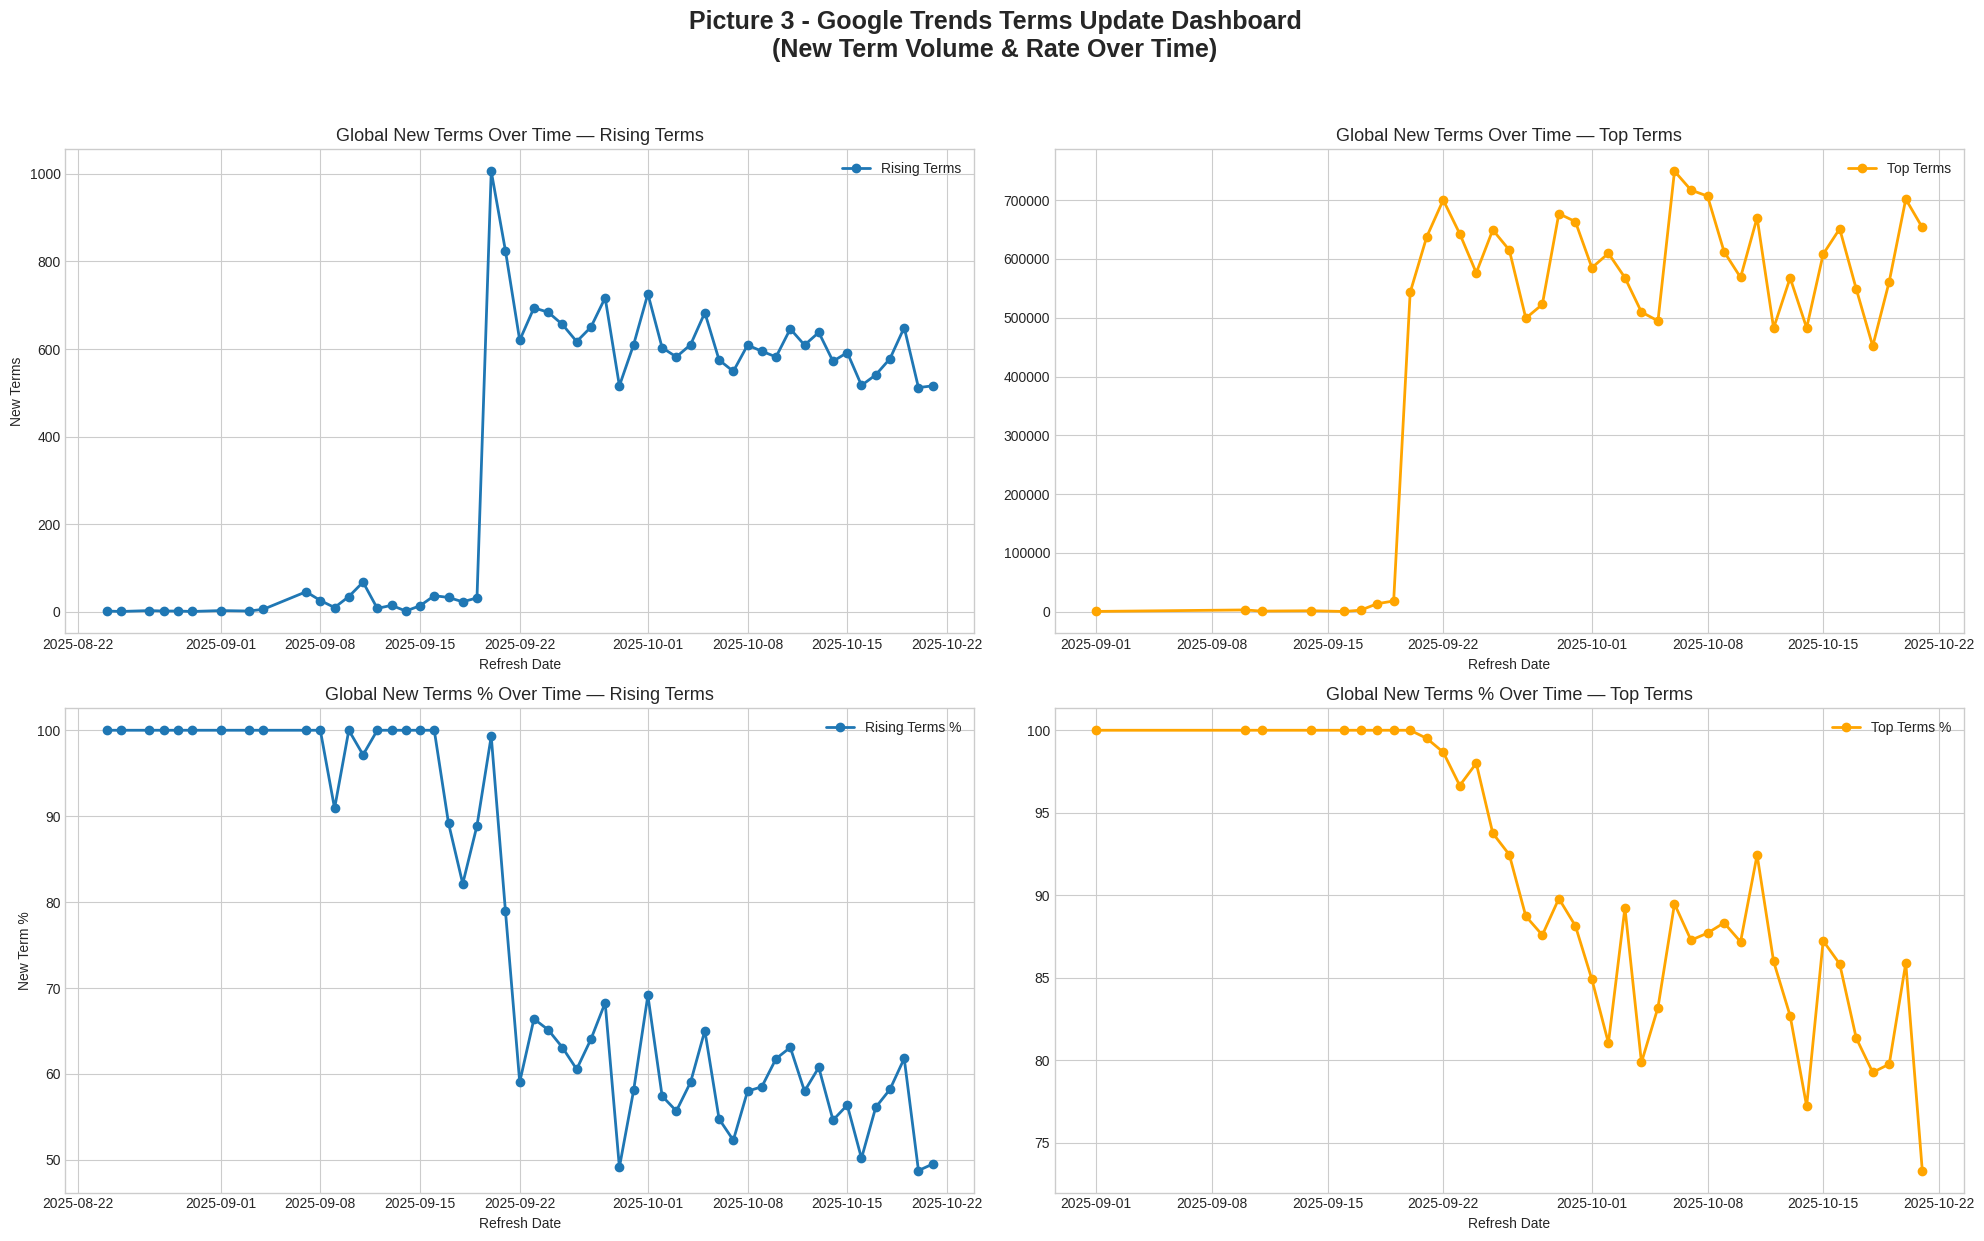

In [49]:
# Spark to pandas: 
pdf_rising_global = rising_new_terms_global.orderBy("refresh_date").toPandas()
pdf_top_global = top_new_terms_global.orderBy("refresh_date").toPandas()
pdf_rising_country = rising_new_terms_stats.orderBy("country_name").toPandas()
pdf_top_country = top_new_terms_stats.orderBy("country_name").toPandas()

# Ensuring refresh_date is Datetime
pdf_rising_global["refresh_date"] = pd.to_datetime(pdf_rising_global["refresh_date"])
pdf_top_global["refresh_date"] = pd.to_datetime(pdf_top_global["refresh_date"])
pdf_rising_country["refresh_date"] = pd.to_datetime(pdf_rising_country["refresh_date"])
pdf_top_country["refresh_date"] = pd.to_datetime(pdf_top_country["refresh_date"])

plt.style.use("seaborn-v0_8-whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(20, 12), sharey=False)

# Panel 1 — Rising New Terms (Count)
ax = axes[0, 0]
ax.plot(
    pdf_rising_global["refresh_date"],
    pdf_rising_global["new_terms_global"],
    marker="o", linewidth=2, label="Rising Terms"
)
ax.set_title("Global New Terms Over Time — Rising Terms", fontsize=13)
ax.set_xlabel("Refresh Date")
ax.set_ylabel("New Terms")
ax.legend()

# Panel 2 — Top New Terms (Count)
ax = axes[0, 1]
ax.plot(
    pdf_top_global["refresh_date"],
    pdf_top_global["new_terms_global"],
    marker="o", linewidth=2, color="orange", label="Top Terms"
)
ax.set_title("Global New Terms Over Time — Top Terms", fontsize=13)
ax.set_xlabel("Refresh Date")
ax.legend()

# Panel 3 — Rising New Terms (%)
ax = axes[1, 0]
ax.plot(
    pdf_rising_global["refresh_date"],
    pdf_rising_global["new_term_pct_global"],
    marker="o", linewidth=2, label="Rising Terms %"
)
ax.set_title("Global New Terms % Over Time — Rising Terms", fontsize=13)
ax.set_xlabel("Refresh Date")
ax.set_ylabel("New Term %")
ax.legend()

# Panel 4 — Top New Terms (%)
ax = axes[1, 1]
ax.plot(
    pdf_top_global["refresh_date"],
    pdf_top_global["new_term_pct_global"],
    marker="o", linewidth=2, color="orange", label="Top Terms %"
)
ax.set_title("Global New Terms % Over Time — Top Terms", fontsize=13)
ax.set_xlabel("Refresh Date")
ax.legend()

fig.suptitle(
    "Picture 3 - Google Trends Terms Update Dashboard\n(New Term Volume & Rate Over Time)",
    fontsize=18, fontweight="bold", y=1.03
)

plt.tight_layout()
plt.show()


**Summary**

These four subplots highlight two distinct but complementary lenses on Google Trends volatility: the absolute number of new terms introduced at each refresh and the percentage of terms that are newly introduced. A major structural jump occurs around mid-September, where Google appears to increase the refresh size for both rising and top terms, likely reflecting a backend update or an indexing expansion rather than a true behavioral shift in global search patterns.

In absolute terms, top terms exhibit far larger refresh volumes, with hundreds of thousands of new entries introduced after mid-September, orders of magnitude above rising terms. This reflects the fact that the “top” table includes a substantially larger term universe compared to the more selective rising-term list.

When normalized into percentage of new terms per refresh, the contrast becomes even clearer. Top terms maintain an extremely high turnover rate, often close to 100%, even after the structural jump, indicating that Google frequently replaces most of the top-term list at each refresh. In contrast, rising terms show a declining and more moderate percentage of new entries, suggesting that rising-term composition stabilizes more quickly once the refresh size expands.

Taken together, these patterns highlight a structural difference between the two lists:

- Top terms behave like a large, high-turnover inventory, refreshed aggressively and broadly each day.

- Rising terms behave more like a curated set of momentum signals, where true “newcomers” diminish over time as the system tracks ongoing spikes.

#### **3.1.2 How Long Do “Trending” Terms Survive in the Google Trends Ecosystem?**

After understanding how new terms are introduced in Google Trends, we next examine a different question: under such a fast-cycling update mechanism, which topics actually persist long enough to become “real” sustained trends? In other words, we want to identify the terms that remain on the board for multiple refresh cycles rather than disappearing immediately.

To do this, we first compute the number of consecutive refresh dates during which each term continues to appear. However, because refresh dates are not spaced exactly one day apart, we additionally calculate the actual elapsed time (in days) between the first and last refresh dates of each consecutive streak. This provides a more accurate measure of how long a term truly survives in the trending ecosystem.

In [50]:
# Calculate the term age for rising terms
rising_all_date = rising_term.withColumn(
    "refresh_date_date",
    F.to_date("refresh_date")
)

rising_dist = (
    rising_all_date
    .select("country_name", "term", "refresh_date_date")
    .dropDuplicates()
)

dates_by_country = (
    rising_dist
    .select("country_name", "refresh_date_date")
    .distinct()
)

w_dates = W.partitionBy("country_name").orderBy("refresh_date_date")

dates_by_country = dates_by_country.withColumn(
    "refresh_idx",
    F.row_number().over(w_dates)
)

rising_with_idx = (
    rising_dist
    .join(
        dates_by_country,
        on=["country_name", "refresh_date_date"],
        how="left"
    )
)

w_term = W.partitionBy("country_name", "term").orderBy("refresh_idx")

rising_seq = (
    rising_with_idx
    .withColumn("rn", F.row_number().over(w_term))
    .withColumn("streak_group", F.col("refresh_idx") - F.col("rn"))
)

rising_streaks = (
    rising_seq
    .groupBy("country_name", "term", "streak_group")
    .agg(
        F.min("refresh_idx").alias("streak_start_idx"),
        F.max("refresh_idx").alias("streak_end_idx"),
        (F.max("refresh_idx") - F.min("refresh_idx") + F.lit(1)).alias("streak_len_refresh"),
        F.min("refresh_date_date").alias("streak_start_date"),
        F.max("refresh_date_date").alias("streak_end_date")
    )
)

rising_streaks.orderBy(F.col("streak_len_refresh").desc()).show(20, truncate=False)

w_longest = W.partitionBy("country_name", "term").orderBy(
    F.col("streak_len_refresh").desc(),
    F.col("streak_start_idx").asc()
)

rising_longest = (
    rising_streaks
    .withColumn("rn_longest", F.row_number().over(w_longest))
    .filter(F.col("rn_longest") == 1)
    .drop("rn_longest")
)

term_age_rising = (
    rising_longest
    .select(
        "country_name",
        "term",
        F.col("streak_start_date").alias("first_seen"),
        F.col("streak_end_date").alias("last_seen"),
        (F.datediff("streak_end_date", "streak_start_date") + F.lit(1)).alias("term_age_days"),
        F.col("streak_len_refresh").alias("streak_len_refresh")
    )
    .orderBy("term_age_days", ascending=False)
    .cache()
)

term_age_rising.show(20, truncate=False)


+--------------+---------------------------------------+------------+----------------+--------------+------------------+-----------------+---------------+
|country_name  |term                                   |streak_group|streak_start_idx|streak_end_idx|streak_len_refresh|streak_start_date|streak_end_date|
+--------------+---------------------------------------+------------+----------------+--------------+------------------+-----------------+---------------+
|Czech Republic|signal festival                        |33          |34              |37            |4                 |2025-10-16       |2025-10-19     |
|Czech Republic|signal festival 2025                   |33          |34              |37            |4                 |2025-10-16       |2025-10-19     |
|Japan         |台風 気象 情報 台風 第 23 号           |20          |21              |24            |4                 |2025-10-10       |2025-10-13     |
|Malaysia      |anm                                    |30          |33         

+--------------+---------------------------------------+----------+----------+-------------+------------------+
|country_name  |term                                   |first_seen|last_seen |term_age_days|streak_len_refresh|
+--------------+---------------------------------------+----------+----------+-------------+------------------+
|Vietnam       |xsmn thứ 3                             |2025-09-10|2025-09-17|8            |2                 |
|Spain         |barça hoy                              |2025-09-16|2025-09-20|5            |2                 |
|Czech Republic|signal festival                        |2025-10-16|2025-10-19|4            |4                 |
|Czech Republic|signal festival 2025                   |2025-10-16|2025-10-19|4            |4                 |
|Japan         |台風 気象 情報 台風 第 23 号           |2025-10-10|2025-10-13|4            |4                 |
|Malaysia      |anm                                    |2025-10-14|2025-10-17|4            |4                 |
|P

In [51]:
# Calculate the term age for top terms
top_all_date = top_term.withColumn(
    "refresh_date_date",
    F.to_date("refresh_date")
)

top_dist = (
    top_all_date
    .select("country_name", "term", "refresh_date_date")
    .dropDuplicates()
)

dates_by_country_top = (
    top_dist
    .select("country_name", "refresh_date_date")
    .distinct()
)

w_dates_top = W.partitionBy("country_name").orderBy("refresh_date_date")

dates_by_country_top = dates_by_country_top.withColumn(
    "refresh_idx",
    F.row_number().over(w_dates_top)
)

top_with_idx = (
    top_dist
    .join(
        dates_by_country_top,
        on=["country_name", "refresh_date_date"],
        how="left"
    )
)

w_term_top = W.partitionBy("country_name", "term").orderBy("refresh_idx")

top_seq = (
    top_with_idx
    .withColumn("rn", F.row_number().over(w_term_top))
    .withColumn("streak_group", F.col("refresh_idx") - F.col("rn"))
)

top_streaks = (
    top_seq
    .groupBy("country_name", "term", "streak_group")
    .agg(
        F.min("refresh_idx").alias("streak_start_idx"),
        F.max("refresh_idx").alias("streak_end_idx"),
        (F.max("refresh_idx") - F.min("refresh_idx") + F.lit(1)).alias("streak_len_refresh"),
        F.min("refresh_date_date").alias("streak_start_date"),
        F.max("refresh_date_date").alias("streak_end_date")
    )
)

top_streaks.orderBy(F.col("streak_len_refresh").desc()).show(20, truncate=False)

w_longest_top = W.partitionBy("country_name", "term").orderBy(
    F.col("streak_len_refresh").desc(),
    F.col("streak_start_idx").asc()
)

top_longest = (
    top_streaks
    .withColumn("rn_longest", F.row_number().over(w_longest_top))
    .filter(F.col("rn_longest") == 1)
    .drop("rn_longest")
)

term_age_top = (
    top_longest
    .select(
        "country_name",
        "term",
        F.col("streak_start_date").alias("first_seen"),
        F.col("streak_end_date").alias("last_seen"),
        (F.datediff("streak_end_date", "streak_start_date") + F.lit(1)).alias("term_age_days"),
        F.col("streak_len_refresh").alias("streak_len_refresh")
    )
    .orderBy("term_age_days", ascending=False)
    .cache()
)

term_age_top.show(20, truncate=False)


+--------------+-------------------+------------+----------------+--------------+------------------+-----------------+---------------+
|country_name  |term               |streak_group|streak_start_idx|streak_end_idx|streak_len_refresh|streak_start_date|streak_end_date|
+--------------+-------------------+------------+----------------+--------------+------------------+-----------------+---------------+
|Norway        |wayward            |5           |6               |10            |5                 |2025-09-25       |2025-09-29     |
|Hungary       |ungvári miklós     |17          |19              |22            |4                 |2025-10-07       |2025-10-10     |
|Belgium       |annelien coorevits |9           |10              |13            |4                 |2025-09-29       |2025-10-02     |
|Israel        |מרואן ברגותי       |16          |17              |20            |4                 |2025-10-05       |2025-10-08     |
|Hungary       |sylvester stallone |17          |18    

+--------------+--------------------+----------+----------+-------------+------------------+
|country_name  |term                |first_seen|last_seen |term_age_days|streak_len_refresh|
+--------------+--------------------+----------+----------+-------------+------------------+
|Norway        |wayward             |2025-09-25|2025-09-29|5            |5                 |
|Hungary       |ungvári miklós      |2025-10-07|2025-10-10|4            |4                 |
|Israel        |מרואן ברגותי        |2025-10-05|2025-10-08|4            |4                 |
|Belgium       |annelien coorevits  |2025-09-29|2025-10-02|4            |4                 |
|Hungary       |sylvester stallone  |2025-10-06|2025-10-09|4            |4                 |
|Netherlands   |rob jetten          |2025-10-15|2025-10-18|4            |4                 |
|Belgium       |bart de wever       |2025-10-07|2025-10-09|3            |3                 |
|Belgium       |ward lemmelijn      |2025-10-12|2025-10-14|3          

In [52]:
# Country level average term age
# Rising Terms
rising_age_country = (
    term_age_rising
    .groupBy("country_name")
    .agg(
        F.avg("term_age_days").alias("avg_age_rising")
    )
    .toPandas()
)

rising_age_country

,country_name,avg_age_rising
0,Turkey,1.498965
1,Argentina,1.503968
2,Norway,1.466667
3,Israel,1.420000
4,Mexico,1.527451
5,New Zealand,1.374060
6,Poland,1.504484
7,Portugal,1.522876
8,Netherlands,1.502092
9,Germany,1.525355


In [53]:
# Top Terms
top_age_country = (
    term_age_top
    .groupBy("country_name")
    .agg(
        F.avg("term_age_days").alias("avg_age_top")
    )
    .toPandas()
)

top_age_country

,country_name,avg_age_top
0,Argentina,1.002660
1,Norway,1.084112
2,Israel,1.053968
3,Mexico,1.003922
4,New Zealand,1.067881
5,Poland,1.002639
6,Portugal,1.006711
7,Netherlands,1.017520
8,Germany,1.002574
9,Finland,1.023155


At this point, we also want to examine how long trending topics tend to survive within each country, to see whether some countries exhibit longer-lasting search interests than others. In other words, we aim to compare the average lifespan of trending terms across countries and identify which nations sustain their hot topics for a relatively longer period.

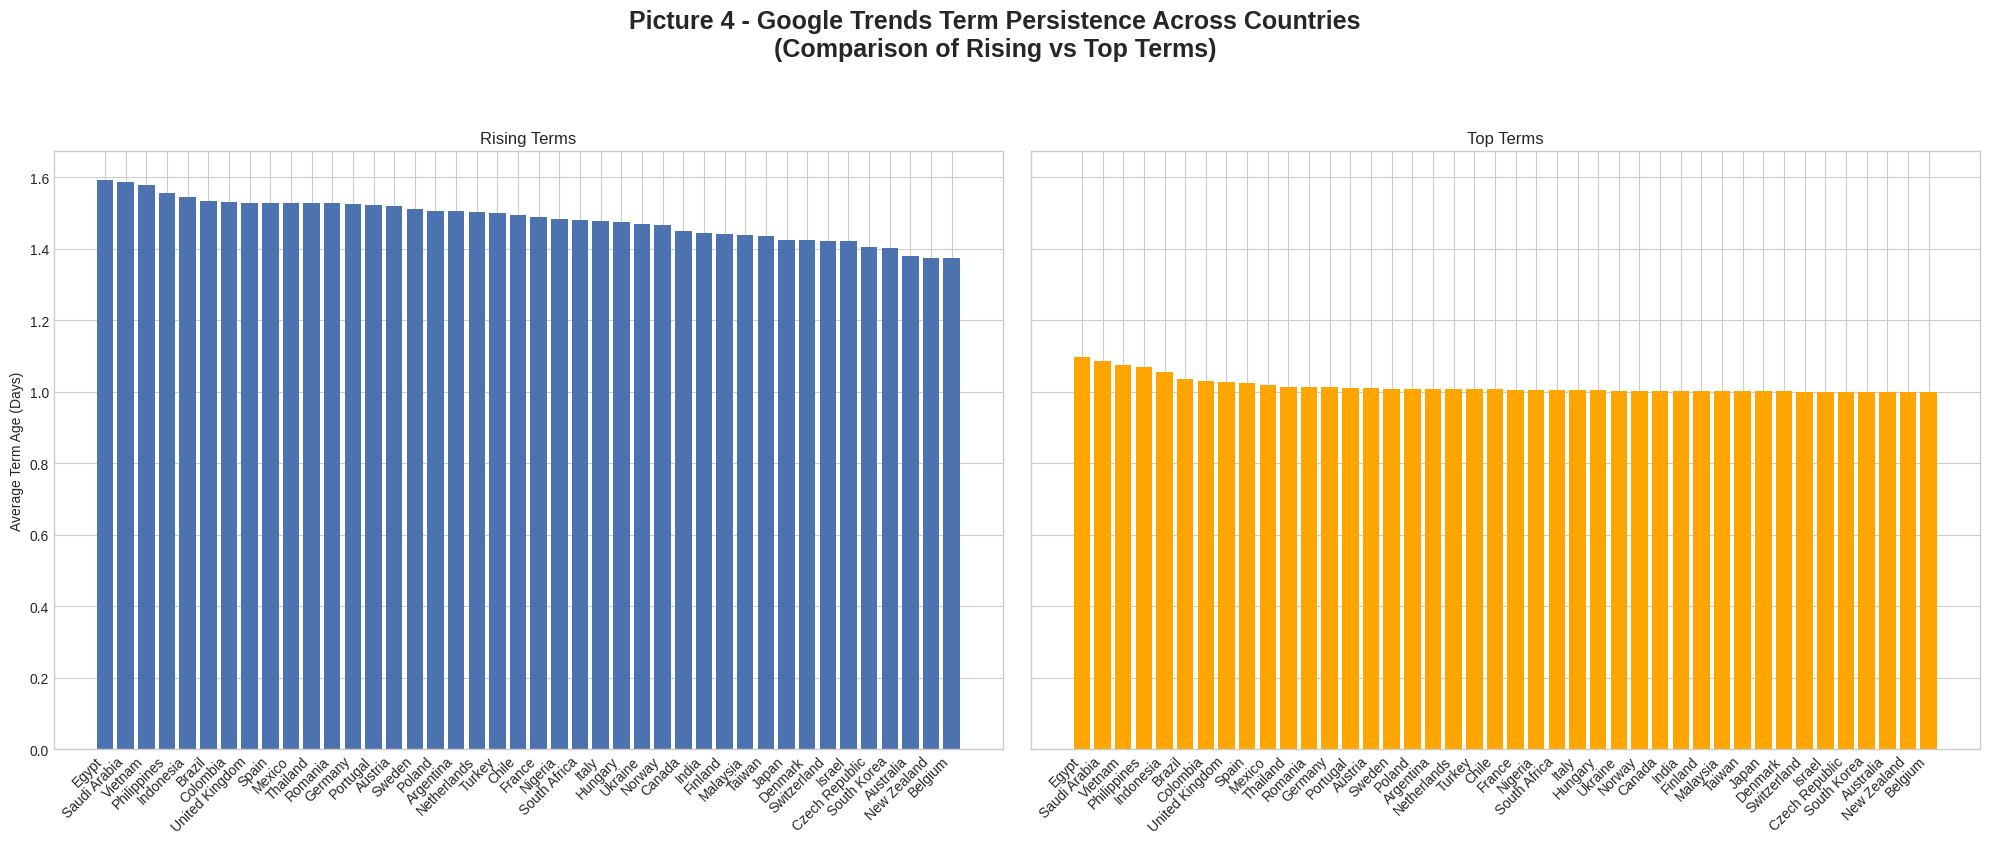

In [54]:
age_bar = rising_age_country.merge(top_age_country, on="country_name", how="inner")
age_bar = age_bar.sort_values(by=["avg_age_rising"], ascending=False)

countries = age_bar["country_name"].tolist()
x = np.arange(len(countries))

fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

axes[0].bar(x, age_bar["avg_age_rising"], color="#4C72B0")
axes[0].set_title("Rising Terms")
axes[0].set_ylabel("Average Term Age (Days)")
axes[0].set_xticks(x)
axes[0].set_xticklabels(countries, rotation=45, ha="right")

age_bar = age_bar.sort_values(by=["avg_age_top"], ascending=False)

axes[1].bar(x, age_bar["avg_age_top"], color="orange")
axes[1].set_title("Top Terms")
axes[1].set_xticks(x)
axes[1].set_xticklabels(countries, rotation=45, ha="right")

fig.suptitle(
    "Picture 4 - Google Trends Term Persistence Across Countries\n(Comparison of Rising vs Top Terms)",
    fontsize=18, fontweight="bold", y=1.05
)

plt.tight_layout()
plt.show()

**Summary**

This figure above compares how long search terms persist across countries for both Rising Terms and Top Terms. As mentioned earlier, Term persistence is measured as the number of days a term continues appearing in Google Trends, calculated by grouping each country–term pair and computing the difference between the first and last appearance date in consecutive streak. After averaging term ages within each country, we visualize the results as two ranked bar charts.

The left panel shows that rising terms generally persist slightly longer, around 1.35 to 1.60 days, with countries like Egypt, Saudi Arabia, and the Philippines displaying the longest-lasting rising queries. This suggests that trending topics in these regions tend to maintain public attention for longer periods. Meanwhile, countries such as Belgium and the Netherlands show shorter persistence, indicating more rapid turnover in what captures search interest. In the right panel, top terms have noticeably lower persistence, typically around 1 day, reflecting higher competition in the daily top-ranked list, where terms frequently move in and out of the leaderboard even if they are popular overall.

Together, these patterns reveal meaningful cross-country differences in search dynamics. Rising terms consistently last longer than top terms, implying that event-driven or emergent interest tends to sustain attention more effectively than the crowded and competitive environment of daily top queries. The variability across countries further suggests differences in information consumption and attention span, some regions maintain engagement with trending topics over longer periods, while others exhibit faster shifts in collective interest. Overall, this comparison highlights the heterogeneity of global search behavior and provides a foundation for understanding how attention cycles vary across cultural and media environments.


Next, since we now know the survival duration of each term, we were naturally curious about which specific terms stayed alive the longest. So we took a closer look at the longest-lasting entries in the dataset.

In [55]:
term_age_rising_summary = (
    term_age_rising
    .groupBy("term_age_days")
    .agg(
        F.countDistinct("term").alias("distinct_terms")
    )
    .orderBy("term_age_days", ascending = False)
)

term_age_rising_summary.show(50, truncate=False)


+-------------+--------------+
|term_age_days|distinct_terms|
+-------------+--------------+
|8            |1             |
|5            |1             |
|4            |8             |
|3            |217           |
|2            |6804          |
|1            |8637          |
+-------------+--------------+



In [56]:
term_age_top_summary = (
    term_age_top
    .groupBy("term_age_days")
    .agg(
        F.countDistinct("term").alias("distinct_terms")
    )
    .orderBy("term_age_days", ascending = False)
)

term_age_top_summary.show(50, truncate=False)


+-------------+--------------+
|term_age_days|distinct_terms|
+-------------+--------------+
|5            |1             |
|4            |5             |
|3            |25            |
|2            |334           |
|1            |21052         |
+-------------+--------------+



Based on these results, we decided to examine the top 10 longest-lasting rising terms and the top 6 longest-lasting top terms as representative examples.

In [57]:
top6_top_spark = (
    term_age_top
    .select("country_name", "term", "term_age_days")
    .orderBy(F.col("term_age_days").desc())
    .limit(6)
)

top10_rising_spark = (
    term_age_rising
    .select("country_name", "term", "term_age_days")
    .orderBy(F.col("term_age_days").desc())
    .limit(10)
)

top6_top = top6_top_spark.toPandas()
top10_rising = top10_rising_spark.toPandas()

top6_top

,country_name,term,term_age_days
0,Norway,wayward,5
1,Hungary,ungvári miklós,4
2,Israel,מרואן ברגותי,4
3,Belgium,annelien coorevits,4
4,Hungary,sylvester stallone,4
5,Netherlands,rob jetten,4


In [58]:
# To understand the meaning of each term
translation_dict_top6 = {
    "wayward": {
        "english_term": "Wayward (Netflix Series)",
        "explanation": (
            "Refers to the 2025 Netflix miniseries 'Wayward'. "
            "The show gained sustained attention in Norway, keeping the term on Google Trends."
        )
    },
    "ungvári miklós": {
        "english_term": "Ungvári Miklós",
        "explanation": (
            "Hungarian judoka and Olympic silver medalist. "
            "Renewed media attention or sports commentary kept the name trending."
        )
    },
    "מרואן ברגותי": {
        "english_term": "Marwan Barghouti",
        "explanation": (
            "A prominent Palestinian political figure. "
            "His name often trends during regional political developments or news cycles."
        )
    },
    "annelien coorevits": {
        "english_term": "Annelien Coorevits",
        "explanation": (
            "Belgian TV personality and former Miss Belgium. "
            "Trending likely due to media appearances or entertainment news."
        )
    },
    "sylvester stallone": {
        "english_term": "Sylvester Stallone",
        "explanation": (
            "American actor known for 'Rocky' and 'Rambo'. "
            "Trending may relate to film releases, interviews, or public events."
        )
    },
    "rob jetten": {
        "english_term": "Rob Jetten",
        "explanation": (
            "Dutch politician and former Minister for Climate and Energy. "
            "Trending during political discussions or government announcements."
        )
    }
}


In [59]:
def apply_translation(row):
    item = translation_dict_top6.get(row["term"], None)
    if item is None:
        return pd.Series(["Unknown", "No explanation available"])
    return pd.Series([item["english_term"], item["explanation"]])

top6_top[["english_term", "explanation"]] = top6_top.apply(apply_translation, axis=1)

top6_top

,country_name,term,term_age_days,english_term,explanation
0,Norway,wayward,5,Wayward (Netflix Series),"Refers to the 2025 Netflix miniseries 'Wayward'. The show gained sustained attention in Norway, keeping the term on Google Trends."
1,Hungary,ungvári miklós,4,Ungvári Miklós,Hungarian judoka and Olympic silver medalist. Renewed media attention or sports commentary kept the name trending.
2,Israel,מרואן ברגותי,4,Marwan Barghouti,A prominent Palestinian political figure. His name often trends during regional political developments or news cycles.
3,Belgium,annelien coorevits,4,Annelien Coorevits,Belgian TV personality and former Miss Belgium. Trending likely due to media appearances or entertainment news.
4,Hungary,sylvester stallone,4,Sylvester Stallone,"American actor known for 'Rocky' and 'Rambo'. Trending may relate to film releases, interviews, or public events."
5,Netherlands,rob jetten,4,Rob Jetten,Dutch politician and former Minister for Climate and Energy. Trending during political discussions or government announcements.


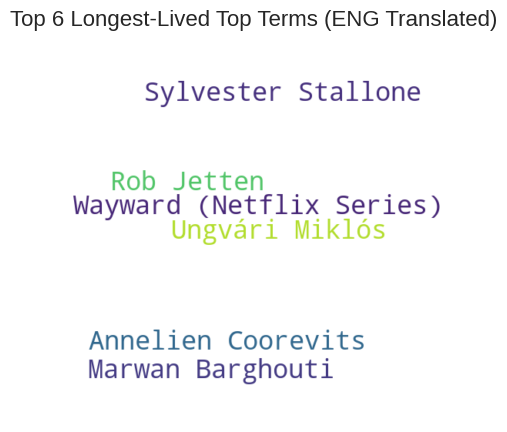

In [116]:
# Use a word cloud for clearer presentation (not counted as a formal visualization submission)

freq = dict(zip(top6_top["english_term"], [1] * len(top6_top)))

wc = WordCloud(
    width=500,
    height=500,
    background_color="white"
).generate_from_frequencies(freq)

plt.figure(figsize=(8, 5))
plt.imshow(wc, interpolation="bilinear")
plt.title("Top 6 Longest-Lived Top Terms (ENG Translated)", fontsize=16, pad=8)
plt.axis("off")
plt.show()

Next, let's take a closer look at the longest-lasting rising terms.

In [61]:
top10_rising

,country_name,term,term_age_days
0,Vietnam,xsmn thứ 3,8
1,Spain,barça hoy,5
2,Czech Republic,signal festival,4
3,Czech Republic,signal festival 2025,4
4,Japan,台風 気象 情報 台風 第 23 号,4
5,Malaysia,anm,4
6,Poland,iga świątek,4
7,Romania,atenționare moderată pentru vânt,4
8,South Korea,삼성 대 ssg,4
9,Vietnam,vòng loại giải vô địch bóng đá thế giới,4


In [62]:
# To understand the meaning of each term
rising_translation_dict_top10 = {
    "xsmn thứ 3": {
        "english_term": "Southern Vietnam Lottery — Tuesday",
        "explanation": (
            "Vietnamese abbreviation for the Southern Vietnam lottery drawn on Tuesdays, "
            "which drives recurring weekly search interest."
        )
    },
    "barça hoy": {
        "english_term": "Barça Today",
        "explanation": (
            "Spanish phrase meaning 'Barça today', typically used to check FC Barcelona’s "
            "match schedule, results, or news for the day."
        )
    },
    "signal festival": {
        "english_term": "Signal Festival",
        "explanation": (
            "A light and digital art festival held in Prague, attracting large visitor interest "
            "and repeat searches around the event period."
        )
    },
    "anm": {
        "english_term": "ANM",
        "explanation": (
            "Likely an acronym searched in Malaysia, often referring to local services or institutions; "
            "the recurring searches suggest stable and repeated interest."
        )
    },
    "iga świątek": {
        "english_term": "Iga Świątek",
        "explanation": (
            "Polish professional tennis player and multiple Grand Slam champion, "
            "generating sustained searches during tournaments."
        )
    },
    "atenționare moderată pentru vânt": {
        "english_term": "Moderate Wind Warning",
        "explanation": (
            "Romanian phrase used in meteorological alerts for moderate wind, "
            "leading to repeated searches during unstable weather conditions."
        )
    },
    "삼성 대 ssg": {
        "english_term": "Samsung vs SSG",
        "explanation": (
            "Korean phrase for a baseball game between Samsung Lions and SSG Landers "
            "in the KBO league, searched around game days."
        )
    },
    "vòng loại giải vô địch bóng đá thế giới": {
        "english_term": "FIFA World Cup Qualifiers",
        "explanation": (
            "Vietnamese phrase referring to football World Cup qualifying matches, "
            "spiking in search volume around important games."
        )
    },
    "signal festival 2025": {
        "english_term": "Signal Festival 2025",
        "explanation": (
            "Searches specifically about the 2025 edition of Prague’s Signal light festival, "
            "reflecting interest in dates, locations, and programs."
        )
    },
    "台風 気象 情報 台風 第 23 号": {
        "english_term": "Typhoon No. 23 Weather Information",
        "explanation": (
            "Japanese phrase for meteorological information about Typhoon No. 23, "
            "leading to repeated searches as the storm develops."
        )
    }
}


In [63]:
def enrich_terms(df, mapping):
    df["english_term"] = df["term"].apply(lambda t: mapping.get(t, {}).get("english_term", t))
    df["explanation"] = df["term"].apply(lambda t: mapping.get(t, {}).get(
        "explanation", "No explanation available."
    ))
    return df

top10_rising_enriched = enrich_terms(top10_rising.copy(), rising_translation_dict_top10)

top10_rising_enriched

,country_name,term,term_age_days,english_term,explanation
0,Vietnam,xsmn thứ 3,8,Southern Vietnam Lottery — Tuesday,"Vietnamese abbreviation for the Southern Vietnam lottery drawn on Tuesdays, which drives recurring weekly search interest."
1,Spain,barça hoy,5,Barça Today,"Spanish phrase meaning 'Barça today', typically used to check FC Barcelona’s match schedule, results, or news for the day."
2,Czech Republic,signal festival,4,Signal Festival,"A light and digital art festival held in Prague, attracting large visitor interest and repeat searches around the event period."
3,Czech Republic,signal festival 2025,4,Signal Festival 2025,"Searches specifically about the 2025 edition of Prague’s Signal light festival, reflecting interest in dates, locations, and programs."
4,Japan,台風 気象 情報 台風 第 23 号,4,Typhoon No. 23 Weather Information,"Japanese phrase for meteorological information about Typhoon No. 23, leading to repeated searches as the storm develops."
5,Malaysia,anm,4,ANM,"Likely an acronym searched in Malaysia, often referring to local services or institutions; the recurring searches suggest stable and repeated interest."
6,Poland,iga świątek,4,Iga Świątek,"Polish professional tennis player and multiple Grand Slam champion, generating sustained searches during tournaments."
7,Romania,atenționare moderată pentru vânt,4,Moderate Wind Warning,"Romanian phrase used in meteorological alerts for moderate wind, leading to repeated searches during unstable weather conditions."
8,South Korea,삼성 대 ssg,4,Samsung vs SSG,"Korean phrase for a baseball game between Samsung Lions and SSG Landers in the KBO league, searched around game days."
9,Vietnam,vòng loại giải vô địch bóng đá thế giới,4,FIFA World Cup Qualifiers,"Vietnamese phrase referring to football World Cup qualifying matches, spiking in search volume around important games."


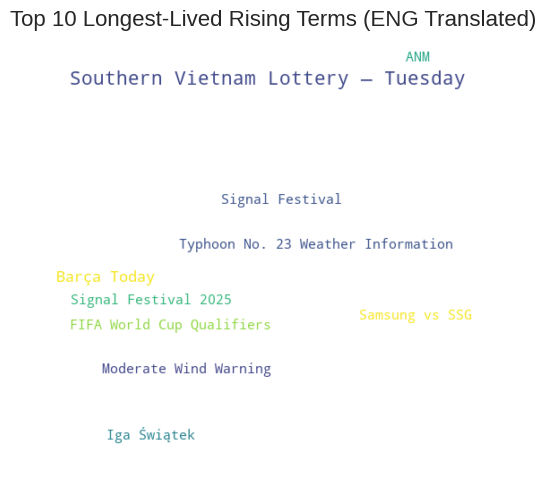

In [118]:
# Use a word cloud for clearer presentation (not counted as a formal visualization submission)

freq_rising = dict(zip(
    top10_rising_enriched["english_term"],
    top10_rising_enriched["term_age_days"]
))

wc_rising = WordCloud(
    width=500,
    height=500,
    background_color="white"
).generate_from_frequencies(freq_rising)

plt.figure(figsize=(8, 5))
plt.imshow(wc_rising, interpolation="bilinear")
plt.axis("off")
plt.title("Top 10 Longest-Lived Rising Terms (ENG Translated)", fontsize=16, pad=5)
plt.tight_layout()
plt.show()


### **3.2 Term's Spatial Spread**

In the previous section, we analyzed the temporal dimension of the data, examining the update volume and update rate of the two Google Trends lists, as well as the survival duration of individual terms. In this section, we shift our focus to the spatial dimension. We aim to understand how these trending terms are distributed across countries and, conversely, which terms manage to spread across the greatest number of countries to become truly international hot topics.

##### **3.2.1 Which Terms Spread Across the Most Countries and Become Global Hits?**

In [65]:
def get_term_country_span(df):
    return (
        df
        .select("term", "country_name")
        .distinct()
        .groupBy("term")
        .agg(
            F.size(F.collect_set("country_name")).alias("n_countries"),
            F.array_sort(F.collect_set("country_name")).alias("countries")
        )
        .filter(F.col("n_countries") > 1)
        .orderBy(F.col("n_countries").desc(), F.col("term"))
    )

# Rising Terms
rising_term_countries = get_term_country_span(rising_term)
rising_term_countries.show(5, truncate=False)

# Top Terms
top_term_countries = get_term_country_span(top_term)
top_term_countries.show(5, truncate=False)

+----------------------+-----------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|term                  |n_countries|countries                                                                                                                                                                                                                                                                                                                                                               |
+----------------------+-----------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------

+-----------------+-----------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|term             |n_countries|countries                                                                                                                                                                                                                                                                                                                                                                                                    |
+-----------------+-----------+-------------------------------------------------------------------------------------------------------------

Here, we noticed many terms resembling “สล็อต…”, “pglucky88…”, and other gambling-related strings. These anomalous entries in the Rising Terms data are not genuine search trends but the product of coordinated, programmatic manipulation. Such patterns typically originate from bot-driven SEO spam networks, clickfarms, or affiliate marketing groups that artificially inflate short-term query volumes to boost visibility for gambling or gray-market websites. Because Google’s rising-term algorithm is highly sensitive to sudden percentage spikes, even a small burst of automated searches can falsely appear as a “trend”. Identifying these terms as deliberate noise rather than organic user interest enables us to filter them out and concentrate on the meaningful portion of Rising Terms, those that truly propagate across countries and reflect authentic behavioral patterns.

In [66]:
pglucky_regex = "(pglucky|สล็อต|pg ?lucky|pg88|win ?88|slot)"

rising_clean = rising_term.filter(~F.lower(F.col("term")).rlike(pglucky_regex))
rising_clean_term_countries = get_term_country_span(rising_clean)

In [67]:
# Rising — top 10 by n_countries
pdf_rising_cross = (
    rising_clean_term_countries
    .orderBy(F.col("n_countries").desc())
    .limit(10)
    .toPandas()
)

# Top — top 10 by n_countries
pdf_top_cross = (
    top_term_countries
    .orderBy(F.col("n_countries").desc())
    .limit(10)
    .toPandas()
)

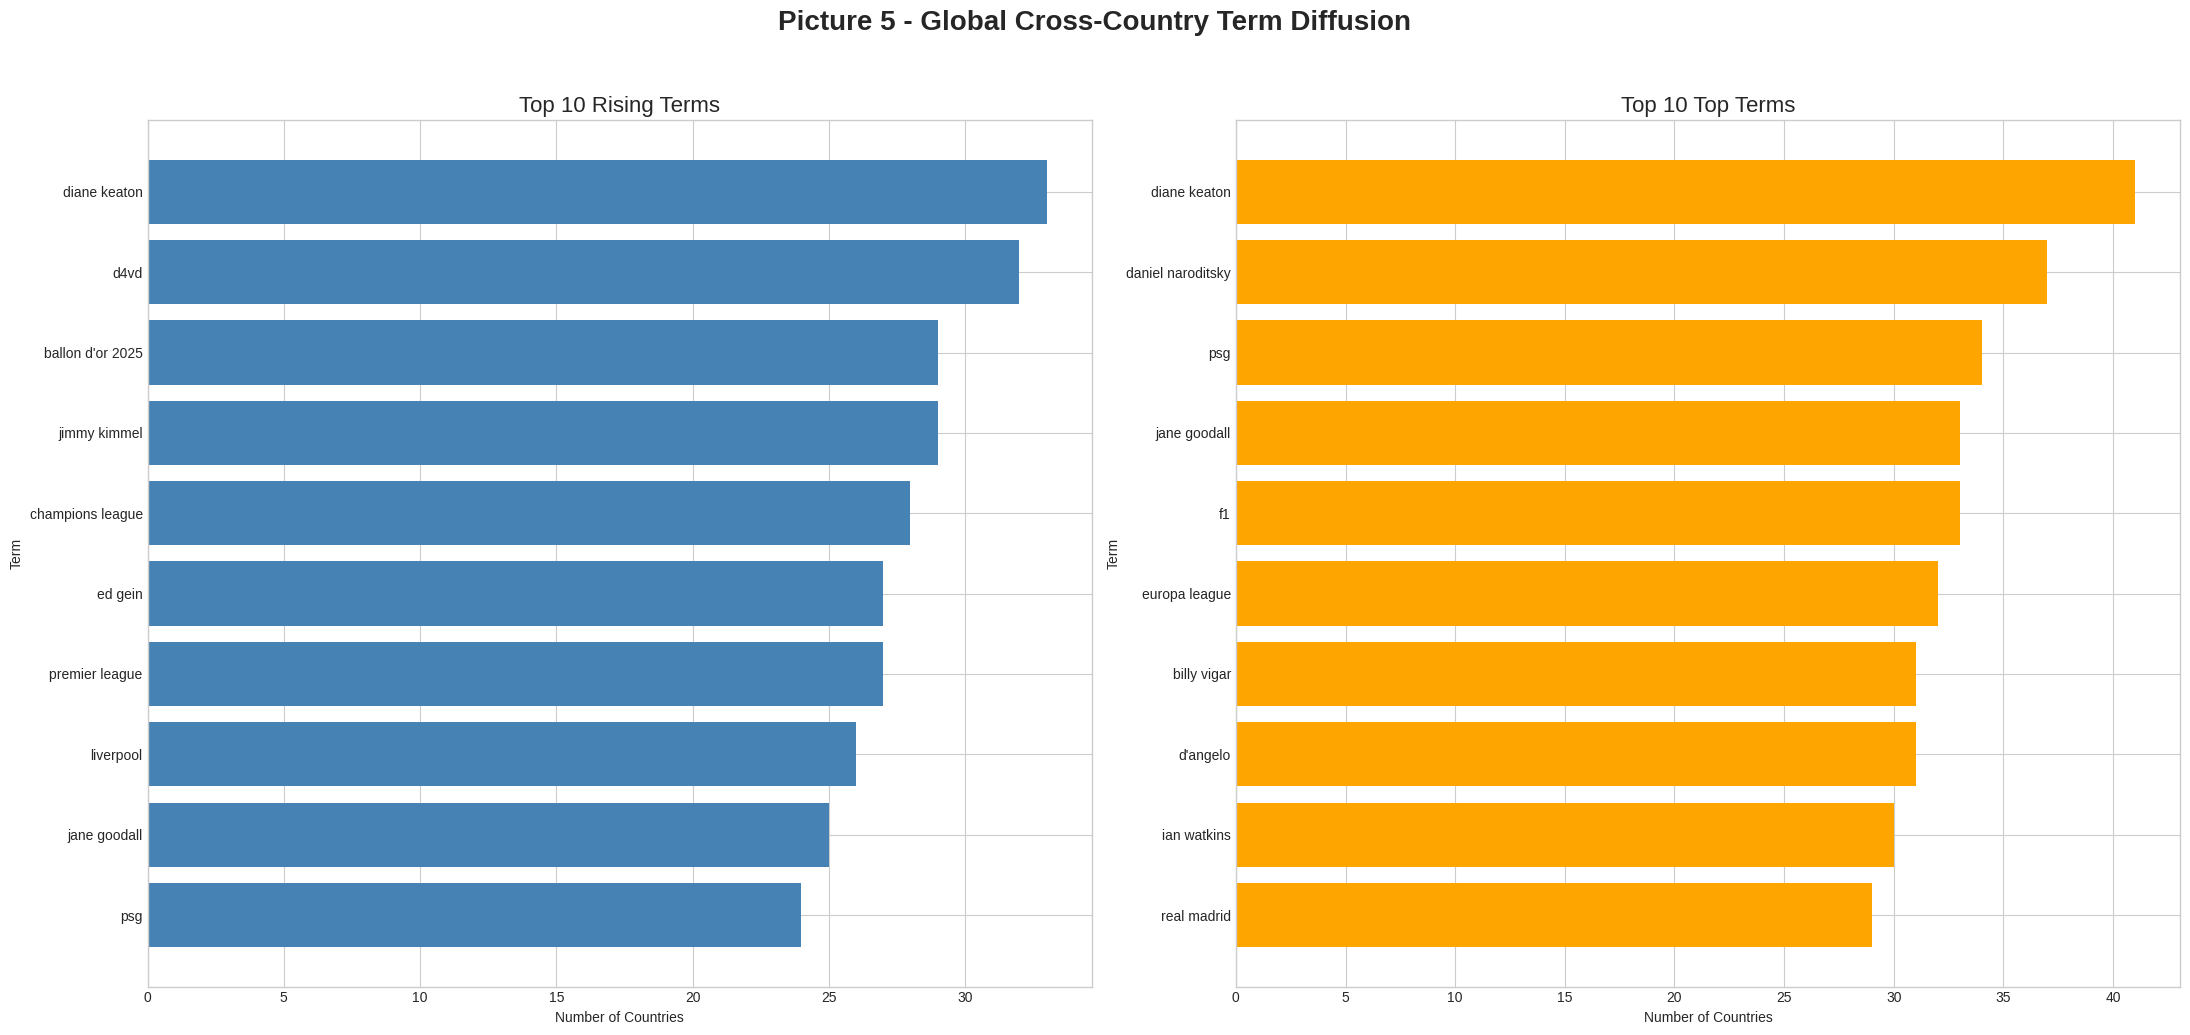

In [68]:
plt.style.use("seaborn-v0_8-whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(22, 10), sharey=False)

ax = axes[0]
ax.barh(pdf_rising_cross["term"], pdf_rising_cross["n_countries"], color="steelblue")
ax.set_title("Top 10 Rising Terms", fontsize=16)
ax.set_xlabel("Number of Countries")
ax.set_ylabel("Term")
ax.invert_yaxis()

ax = axes[1]
ax.barh(pdf_top_cross["term"], pdf_top_cross["n_countries"], color="orange")
ax.set_title("Top 10 Top Terms", fontsize=16)
ax.set_xlabel("Number of Countries")
ax.set_ylabel("Term")
ax.invert_yaxis()

fig.suptitle(
    "Picture 5 - Global Cross-Country Term Diffusion",
    fontsize=20, fontweight="bold", y=1.03
)

plt.tight_layout()
plt.show()

**Summary**

This side by side chart is showing how globally each search term travels in our Google Trends dataset, separating short term spikes from long term fixtures. The X axis in both panels is Number of Countries, the Y axis is Term, and the colors play the role of an implicit legend: steel blue for Rising terms and orange for Top terms. On the left, the blue bars list the top 10 Rising terms and show in how many different countries each term appears in the rising table. On the right, the orange bars list the top 10 Top terms and show their cross country reach in the persistent top table.

Across both panels, a small set of globally resonant topics spreads widely across regions, with Diane Keaton appearing in the most countries in both lists. Rising terms show slightly more diversity in subject matter, spanning entertainment, sports, and public figures, while Top terms are more dominated by mainstream global interests such as major sports teams, public personalities, and widely followed events. Overall, the charts highlight that certain cultural and sports-related topics consistently achieve broad international reach, while others remain more regionally concentrated.

Given our observation of widespread spam manipulation in the Rising Terms dataset, and the fact that it appears to be a global phenomenon, we next examine the scale of this issue worldwide. Specifically, we aim to understand how severe the impact is across countries and which regions are the primary victims of these spam-driven attacks.

##### **3.2.2 Special Case Analysis: The Gambling Attack on Google Trends**

In [69]:
pglucky_terms = (
    rising_term
    .filter(F.lower(F.col("term")).rlike(pglucky_regex))
    .select("term", "country_name", "refresh_date")
)

pglucky_terms.cache()
pglucky_terms.show(20, truncate=False)

+----------------------------------+------------+------------+
|term                              |country_name|refresh_date|
+----------------------------------+------------+------------+
|สล็อต pgstar777 hair              |Turkey      |2025-09-21  |
|เกม สล็อต pggroup777 wiki         |Romania     |2025-10-10  |
|pg slot pggroup777.wiki           |Turkey      |2025-10-10  |
|ทดลอง เล่น สล็อต pgstar777 top win|Romania     |2025-09-26  |
|สล็อต pglucky88 win 88            |Canada      |2025-10-17  |
|pg slot www.pgstar777.top         |Mexico      |2025-09-28  |
|สล็อต ทดลอง www pxj edu pl        |Thailand    |2025-10-08  |
|สล็อต pggroup777 hair             |Colombia    |2025-10-17  |
|เกม สล็อต pglucky88 win 88        |Egypt       |2025-10-17  |
|slot gacor sangathoki             |Indonesia   |2025-09-24  |
|ทดลอง เล่น สล็อต pglucky88 win vip|Poland      |2025-10-11  |
|pg slot pgbkk999.center           |Saudi Arabia|2025-09-23  |
|สล็อต ออนไลน์ www pggroup777 wiki |Saudi Arabia|2025-1

In [70]:
# Calculate the attack frequency per refresh date, per country
daily_stats = (
    pglucky_terms
    .groupBy("refresh_date")
    .agg(
        F.count("*").alias("freq"),
        F.countDistinct("country_name").alias("n_countries")
    )
    .orderBy("refresh_date")
)

country_stats = (
    pglucky_terms
    .groupBy("country_name")
    .agg(F.count("*").alias("freq"))
    .orderBy(F.col("freq").desc())
)

pdf_daily = daily_stats.toPandas()
pdf_daily["refresh_date"] = pd.to_datetime(pdf_daily["refresh_date"])

pdf_daily

,refresh_date,freq,n_countries
0,2025-08-27,1,1
1,2025-09-07,2,2
2,2025-09-10,4,3
3,2025-09-15,1,1
4,2025-09-17,1,1
5,2025-09-18,2,2
6,2025-09-19,2,1
7,2025-09-20,58,15
8,2025-09-21,83,22
9,2025-09-22,63,19


In [71]:
pdf_country = country_stats.toPandas()
pdf_country

,country_name,freq
0,Philippines,350
1,Egypt,293
2,Thailand,245
3,India,205
4,Indonesia,202
5,Colombia,183
6,Saudi Arabia,146
7,Romania,128
8,Mexico,114
9,Turkey,107


For clearer presentation, we use a px.choropleth map to visualize the global reach of these spam attacks and the frequency with which each country is targeted. Since the raw counts are extremely high, we apply a log transformation to better represent the relative severity across countries.

In [ ]:
pdf_country["freq_log"] = np.log1p(pdf_country["freq"])

fig = px.choropleth(
    pdf_country,
    locations="country_name",
    locationmode="country names",
    color="freq_log",
    color_continuous_scale="Reds",
    title="Picture 6 - Gambling Spam Attack Global Spread (Log Frequency)"
)

fig.update_layout(
    autosize=True,
    height=650,
    margin=dict(l=40, r=40, t=80, b=40),
    coloraxis_colorbar=dict(
        thickness=16,
        len=0.55
    )
)

fig.show()

**Summary**

This choropleth map illustrates the global diffusion pattern of gambling-related spam terms within Google Trends. Instead of reflecting genuine cultural interest, these terms appear to spread in a coordinated manner across multiple regions. Countries are shaded by the logged frequency of gambling spam appearances, which allows us to visualize both high-intensity hotspots and lower-frequency regions without the values being overwhelmed by a few extreme cases. Darker reds mark markets where these spam terms appear repeatedly, while lighter shades indicate more sporadic activity.

A clear geographic pattern emerges. East and Southeast Asia, including countries such as the Philippines, Indonesia, Malaysia, and Vietnam, show some of the highest logged frequencies, consistent with regional spam networks that are known to operate across these markets. South Asia and parts of the Middle East also display concentrated activity, and several Latin American countries exhibit moderate to strong signals as well. In contrast, most of Europe and Oceania show only light or isolated appearances.

Overall, the visualization highlights that gambling-related spikes are not random anomalies. They follow recognizable cross-country pathways that align more with coordinated spam behavior than with organic user interest, reinforcing the need to treat certain trending surges as artifacts of manipulation rather than genuine signals of public attention.

### **3.3 Term Content Category Analysis**

Next, we aim to investigate what types of topics these trending terms belong to, and whether different regions exhibit distinct preferences or tendencies in the kinds of topics that appear in their trending lists.

In [73]:
rising_term_list = (
    rising_term
        .select("term")
        .distinct()
        .orderBy("term")
        .rdd.flatMap(lambda x: x)
        .collect()
)

top_term_list = (
    top_term
        .select("term")
        .distinct()
        .orderBy("term")
        .rdd.flatMap(lambda x: x)
        .collect()
)

all_terms = sorted(list(set(rising_term_list + top_term_list)))

print("Total unique terms across rising & top:", len(all_terms))

Total unique terms across rising & top: 31184


Our dataset contains a total of 31,184 unique terms, and given the project’s time constraints, it is not feasible to manually examine the attributes of each one to derive precise topic distributions for every region. Therefore, we adopt a sampling-based approach: we randomly select 20 terms from each country’s vocabulary and use these samples as a reference point for topic characterization. This provides a reasonable approximation for exploratory analysis, with the possibility of conducting a larger-scale content study in the future.

In [74]:
all_terms_df = (
    rising_term.select("country_name", "term")
    .unionByName(top_term.select("country_name", "term"))
    .dropDuplicates()
)

K = 20
w = W.partitionBy("country_name").orderBy(F.rand(seed=843))

stratified_sample_df = (
    all_terms_df
    .withColumn("rn", F.row_number().over(w))
    .filter(F.col("rn") <= K)
    .drop("rn")
)

sample_terms_pdf = stratified_sample_df.orderBy("country_name").toPandas()

terms_list = sample_terms_pdf["term"].tolist()

print("Total sampled terms:", len(terms_list))
print(terms_list)

Total sampled terms: 840
['argentina vs colombia sub 20', 'kairat real madrid', 'diane keaton de que murio', 'final mundial sub 20', 'inter slavia praga', 'arsenal - deportivo maipú', 'ganador de la voz argentina 2025', 'carabao cup', 'amistosos internacionales', 'fiorentina - como', 'sporting lisboa', 'aljibe', 'qualy f1', 'balin miller', 'เว็บ pgbkk999 center ออนไลน์', 'manchester city everton', 'gimnasia jujuy - chacarita', 'link gaming', 'fulham - brentford', 'espanyol', 'gta 6 release date update', 'sri lanka vs pakistan', 'daylight saving 2025', 'amazon aws outages', 'tom holland', 'bathurst 1000 results', 'moon rise today', 'f1 standings', 'virgin australia baggage allowance', 'shannon cox', 'bitcoin', 'sculpture by the sea 2025', 'rebel sport', 'pete hegseth', 'tottenham vs aston villa', 'brayden fiorini', 'king cake', 'ayes', 'wayward', 'dally m', 'fabian', 'melika foroutan', 'gak – hartberg', 'österreich rumänien live', 'bayern – werder bremen', 'wolverhampton – everton', 'vö

**Category Summary**

| Category | Percentage | Notes |
|----------|------------|-------|
| **SPORTS** | 45.7% | The dominant category. Includes global football leagues (Premier League, La Liga, Serie A), national team tournaments, tennis (Djokovic), cricket, Formula 1, and major U.S. sports leagues (NFL/NHL). |
| **ENTERTAINMENT (Celebrities / Culture)** | 15.7% | Pop-culture focused. Covers film actors (Tom Holland), musicians (Katy Perry, Taylor Swift), cultural holidays (Diwali, Rosh Hashana), reality TV, and gaming-related content. |
| **NEWS & SOCIETY (Politics / Weather / Events)** | 13.6% | A blend of current affairs: geopolitical news (Putin, Gaza, elections), social issues (missing persons), and natural-disaster or weather-related alerts (typhoons, earthquakes). |
| **GENERAL / MISC (Locations / Health / Other)** | 9.4% | A long-tail mix including geographic locations (Capri, Singapore), health topics (gallbladder, HPV), education, translation queries, and other uncategorized items. |
| **GAMBLING** | 8.4% | Strong regional characteristics. Primarily Southeast Asian slot-machine terms (PG Slot), gambling agent keywords (Dewa, Zeus), and global lottery results. |
| **FINANCE & TECH** | 7.3% | Money and technology topics: consumer electronics rumors (iPhone 16/17), software issues (Windows, Steam), stock indices (S&P 500), cryptocurrencies, and tax-related searches. |
| **TOTAL** | 100% |  |



We leveraged Gemini to assist in manually classifying the attributes of these large-scale, multilingual terms. Based on these classifications, we then analyzed the distribution of topic categories within each country.

In [75]:
sports = ['méxico ecuador', 'godoy cruz - instituto', 'b nacional', 'wolves - everton', 'argentina colombia', 'portugal hungría', 'alianza lima', 'rangers', 'liverpool southampton', 'danubio - nacional', 'aldosivi - argentinos jrs.', 'al ittihad - al-nassr', 'barcelona girona', 'suecia - kosovo', 'fiorentina', 'south africa vs namibia', 'bangladesh women vs south africa women', 'rangers', 'srbija albanija', 'rapid wien', 'luke humphries', 'juventus – atalanta', "wer hat den ballon d'or 2025 gewonnen", 'europa conference league', 'deutschland luxemburg', 'zypern – bosnien-herzegowina', 'genk union', 'champions league mannen', 'beerschot', 'milan - fiorentina', 'sri lanka vs pakistan', 'daniel naroditsky', 'roeselare', 'atalanta', 'spanje - bulgarije', 'galatasaray – liverpool', 'stvv westerlo', 'naples – pise', 'jorge carrascal', 'daniel naroditsky', 'benfica x gil vicente', 'real madrid x espanyol', 'porto x benfica', 'lituânia x polônia', 'jogo flamengo', 'jogo da espanha', 'spfc', 'japan vs brazil', 'selecao', 'celtic', 'burnley x nottingham forest', 'crystal palace x bournemouth', 'jogo do flamengo hoje', 'bournemouth fulham 03/10/2025', 'ldu quito x são paulo', 'ufc 320', 'jack eichel', 'oilers vs rangers', 'panthers vs sabres', 'morocco vs bahrain', 'france vs azerbaijan', 'atlético madrid - osasuna', 'manchester united - sunderland afc', 'atlético madrid - rayo vallecano', 'wanderers', 'psg auxerre', 'sporting cp', 'palmeiras - bragantino', 'liverpool vs manchester united', 'novak djokovic', 'talleres river plate', 'villarreal - juventus', 'chelsea vs', 'r.c.d. mallorca atlético madrid', 'real madrid rcd espanyol', 'catolica vs', 'lamine yamal', 'corea del sur paraguay', 'resultados', 'west ham crystal palace', 'balón de oro', 'gavi', 'sevilla - villarreal', 'manchester city - everton', 'atalanta - como', 'barracas central - belgrano', 'dinamo crystal palace', 'marruecos sub 20', 'paris fc', 'milan vs fiorentina', 'atlético madrid - inter', 'anna kurnikovová', 'freiburg – hoffenheim', 'karviná – olomouc', 'newcastle – barcelona', 'liveball', 'clash ppv', 'eva adamczyková', 'jacob ambæk', 'vejle - sønderjyske', 'silkeborg - fck', 'r. oviedo - barcelona', 'ryder cup 2025', 'holbæk vejle', 'nfl', 'superliga', 'اليابان ضد البرازيل', 'ليفربول', 'إثيوبيا ضد غينيا بيساو', 'مان يونايتد ضد تشيلسي', 'pyramids vs el gaish', 'real madrid', 'uefa champions league', 'الإنتر ضد كريمونيسي', 'نابولي ضد جنوى', 'نيس ضد روما', 'elias kuosmanen', 'barcelona – getafe', 'finland vs lithuania', 'aleksander barkov', 'liverpool – southampton', 'portugal – irlande', 'carlos alcaraz', 'villarreal – betis', 'monaco – manchester city', "balon d'or", 'dembele', 'marc marquez', 'barcelone – real sociedad', '2 bundesliga', 'harry kane', 'dynamo dresden', 'milan – neapel', 'aston villa – bologna', 'samsunspor', 'románia–ausztria', 'aston villa–fulham', 'billy vigar', 'nottingham forest–sunderland', 'liverpool meccs', 'asif afridi', 'shamim hossain', 'dortmund vs wolfsburg', 'real betis vs nottm forest', 'toni fernández', 'jediah blades', 'al-duhail vs al-ahli saudi', 'villarreal vs betis', 'portugal vs', 'italy vs israel', 'sunderland vs wolves', 'sergio busquets', 'fabrício bruno', 'lion city sailors vs selangor', 'tsg hoffenheim', 'sweden vs', 'sunderland vs aston villa', 'דניאל פרץ', 'sevilla vs villarreal', 'liverpool vs everton', 'הפועל ת״א נגד מכבי ת"א', 'מכבי ת"א נגד דינמו זאגרב', 'הפועל ירושלים נגד עירוני נס ציונה', 'ויאריאל נגד יובנטוס', 'ארסנל', "מנצ'סטר יונייטד נגד סנדרלנד", 'psg vs strasbourg', 'liverpool everton', 'monza - padova', 'ligue 1', 'villarreal - manchester city', 'žalgiris - olimpia milano', 'max verstappen', 'roccella', '凱旋門賞 2025', 'アイルランドトロフィー 2025', '川須騎手', '島崎伸作', 'リチャード 草間', 'india vs bangladesh', 'f1 qualifying', 'everton vs west ham', 'chelsea vs mu', 'carabao cup', 'leeds united vs tottenham', 'south korea vs brazil', 'nepal vs oman', 'indonesia national football team', 'tottenham vs aston villa', 'hwang ui jo', 'nepal vs samoa', 'arctic open 2025', 'pak vs ban', 'chelsea f.c. vs liverpool f.c. timeline', 'mlb', 'max verstappen', 'eliminatorias africanas', 'borussia', 'real madrid villarreal', 'mexico vs españa', 'inter - slavia praga', 'besiktas', 'barca vs psg', 'mexico vs chile sub 20', 'uefa', 'américa pumas', 'ravens rams', 'mazatlan vs san luis', 'águilas doradas - medellín', 'eagles - broncos', 'luuk de jong', 'benfica - gil vicente', 'irak - indonesië', 'twente - heracles', 'nac', 'jong oranje', 'nederland finland', 'dinamo zagreb - fenerbahçe', 'marathon eindhoven 2025', 'nrl', 'cricbuzz', 'afl', 'chiefs vs ravens', 'tottenham vs doncaster', 'real madrid vs espanyol', 'usa vs australia', 'ryan fox', 'giants vs chiefs', 'fpl', 'utrecht vs lyon', 'atalanta vs lazio', 'rio ave vs porto', 'celtic vs motherwell', 'real m', 'bulgaria vs türkiye', 'newcastle', 'fiorentina', 'morocco u-20 vs france u-20', 'fluminense vs botafogo', 'lazio vs torino', 'osasuna vs elche', 'vicky lopez', 'tunisia vs namibia', 'chelsea vs man united', 'iceland vs france', 'al-nassr vs al-riyadh', 'eliteserien tabeller', 'sarpsborg 08', 'liverpool vs man united', 'tabell eliteserien', 'haugesund rosenborg', 'bernt hulsker', 'a laget', 'aces vs fever', 'jakub wikłacz', 'lm', 'norwegia izrael', 'newcastle – benfica', 'denis załęcki', 'losc - psg', 'fcporto', 'fluminense - botafogo', 'luis filipe vieira', 'brentford - city', 'palmeiras - vasco da gama', 'chelsea benfica', 'palmeiras river plate', 'jogo do benfica', 'barcelona vs psg', 'cyprus vs bosnia and herzegovina', 'vlad dragomir', 'rapid', 'universitatea craiova vs dinamo bucureşti', 'manchester', 'galatasaray - beşiktaş', 'poziții superliga', 'universitatea craiova unirea slobozia', 'نيوكاسل يونايتد ضد برشلونة', 'afghanistan vs zimbabwe', 'ليفربول ضد ساوثهامبتون', 'دوري ابطال اوروبا', 'bulgaria vs türkiye', 'المغرب ضد الكونغو', 'al-shorta vs al-ittihad', 'ceará vs santos', 'أستون فيلا ضد بولونيا', 'valencia vs athletic club', 'أتلتيكو مدريد ضد الريال', 'six kings slam', 'الزمالك ضد غزل المحلة', 'union saint-gilloise vs inter', 'barcelona', 'world cup 2026', 'barcelona vs sevilla', 'durban city vs polokwane city', 'verona vs juventus', 'billy vigar', 'atlético madrid vs rayo vallecano', 'chelsea vs benfica', 'barcelona women', 'katiso molefe', 'sparta prague', 'pafos vs bayern', 'jaguars vs chiefs', 'parma vs torino', 'newcastle vs man city', '노팅엄 포레스트 대 미트윌란', '울 브스 대 리즈 유나이티드', 'sri lanka vs bangladesh', 'kia 대 ssg', '충남 아산 fc 대 수원', '아제르바이잔', '첼시 대 벤피카', '와일드카드 결정전', '울산 대 청두 룽청', 'barcelona vs psg', 'celta de vigo paok', 'milan - fiorentina', 'crvena zvezda real madrid', 'selección de fútbol sub-20 de españa - colombia sub-20', 'sevilla - barcelona', 'bordalas', 'hansi flick', 'arsenal mot olympiakos', 'mjällby mot elfsborg', "ballon d'or 2025 time", 'färöarna', 'aik gais', 'allsvenskan tabell', 'armand duplantis', 'milan', 'chelsea vs benfica', 'örgryte mot bois', 'robin olsen', 'roma – inter', 'hoffenheim – bayern', 'arsenal – atlético madrid', 'hongrie – portugal', 'sion – lausanne', 'conference league', 'villarreal – man city', 'wm-qualifikation uefa', 'fenerbahçe – ogc nizza', 'fcsg', 'newcastle – benfica', 'young boys – fc thun', '中職', 'brentford vs man utd', 'ปาร์มา พบ โตรีโน', 'เบรนท์ฟอร์ด พบ แมนยู', 'ไทย พบ จีน ไทเป', 'วูล์ฟแฮมป์ตัน พบ เอฟเวอร์ตัน', 'บาร์นสลีย์ พบ ไบรท์ตัน', 'ลำพูน ว อริ เออ ร์ พบ เมืองทอง', 'ittihad fc - al nassr', 'برشلونة ضد بي اس جي', 'real sociedad - mallorca', 'kocaelispor - rizespor', 'gs frankfurt', 'hull city - leicester city', 'غلطة سراي ضد ليفربول', 'gençlerbirliği eyüpspor', 'пробій – інгулець', 'жирона – еспаньйол', 'испания – грузия', 'олександрія – полтава', 'шахтёр донецк – заря', 'арсенал – вест хэм юнайтед', "реал ов'єдо – еспаньйол", 'атлетик – жирона', 'колос – верес', 'довбик', 'фенербахче – антальяспор', 'crystal palace vs bournemouth', 'liverpool vs everton', 'matt beard cause of death', 'ryder cup 2027', 'scotland v belarus', 'kilmarnock vs hearts', 'manchester united f.c. vs chelsea f.c. timeline', 'iraq vs saudi arabia', 'carlos alcaraz', 'pak vs ban', 'middlesbrough vs west brom', 'tây ban nha vs', 'barcelona vs girona', 'marseille đấu với ajax', 'lào đấu với malaysia', 'monaco đấu với man city', 'lazio đấu với roma', 'pakistan vs india', 'mu vs', 'psg marseille', 'barcelona đấu với girona', 'fulham – arsenal']
gambling = ['alice springs powerball winner', 'lotto doppeljackpot gewinner', 'สล็อต www pgstar777 top', 'pg slot slothero99.com ⚡', 'เว็บ ออนไลน์ www pggroup777 wiki', 'บา คา ร่า pggroup777 cloud', 'situs proxy', 'เว็บ สล็อต ชนะ pglucky88 win', 'สล็อต pgline777 world', 'สล็อต pggroup777 cloud', 'maxwinpro333 .info', 'pg slot mio555.win pg', 'link a1--suria88', 'ทดลอง เล่น สล็อต pggroup777 center', 'pg slot pggroup777.monster', 'dewa33-com', 'nusa link', 'pg slot mio555.win เล่น', 'pg slot www.pglucky88.win', 'multigacor88.com', 'pgmaxwin357 .com', 'mahjong773 .com', 'raja132h.com', 'dewa200c.com', 'dewa138ca.com', 'zeus323.com', 'kingpoker99', 'situs gacor ovovegas.com', 'lotto result sept 23 2025', 'lotto result october 18 2025', 'bingoplus', 'lotto result october 20 2025', 'mega lotto results', 'eurodreams', 'pg slot www.pgstar777.top', 'slotrajadewa138.online', 'เกม สล็อต www pggroup777 wiki', 'เว็บ www deva555 vip', 'pg slot pglucky88.win ✅', 'คา สิ โน mvpwin555 digital login', 'เกม สล็อต pgstar777 hair', 'slot mahjong', 'la primitiva', 'casino utan spelpaus www.casinostallet.se', 'eurojackpot', 'สล็อต www mvpwin555 live login', 'เว็บ mvpwin555 live', 'pg slot pggroup777.hair', 'citibet88 resmi', 'gacorzeus66.com', 'สล็อต www pglucky88 win', 'สล็อต www pggroup777 wiki', 'genting', 'เว็บ pglucky88 win', 'ทดลอง เล่น สล็อต pglucky88 win ชนะ', 'pg สล็อต ทดลอง เล่น khao555 com', 'เว็บ www gtviet com', 'bonus veren siteler', 'jojobet', 'galabet', 'สล็อต pggroup777 hair', 'xổ số miền bắc thứ sáu', 'xổ số bình thuận ngày 2 tháng 10', 'xổ số đắk lắk', 'xổ số miền nam ngày 26 tháng 9', 'xổ số khánh hòa ngày 15 tháng 10', 'หวยลาว8/10/68']
news = ['dia del jubilado en argentina', 'dia de la costurera', 'vladimir putin', 'senate estimates', 'donald trump wladimir putin', 'tag der deutschen einheit', 'russlands wirtschaft', 'alerte belgique', 'luisa maria de belgique', 'rtbf auvio', 'tv oost', 'nyheder', 'pressemøde', 'helle nielsen død', 'gaza', 'أسعار البنزين', 'nouveau premier ministre', 'vol au louvre', 'retraite', 'marie ange debon sncf', 'vermisster fabian güstrow tot', 'sirene hamburg heute', 'hamas', 'andre wüstner', 'katonai szolgálat', 'donald tusk', 'felföldi ágota eltűnt', 'baleset m7 autópálya', 'afghanistan', 'justin trudeau', 'israel', 'news', 'magang pam jaya 2025', 'דודי אמסלם', 'vajont', 'allerta moderata per vento', 'legge di bilancio 2026', '国税 調査 と は', 'anwar ibrahim asean summit donald trump', 'deepavali 2025 school holiday', 'cebu earthquake today', 'tropical storm halong philippines', 'bagyong ramil', 'awaria internetu', 'pue zus', 'rekruci', 'krzysztof śmiszek', 'zmiana czasu letniego', 'niedziele handlowe', 'resultados eleições autárquicas', 'despedimento coletivo teleperformance', 'furacão humberto portugal', 'eleição autárquicas 2025', 'carlos moedas', 'maia sandu', 'ppda moldova', 'اليوم العالمي للقهوة', 'علي شمخاني', 'prince andrew', 'nobel peace prize 2025', 'jeremy trujillo niño desaparecido', '김건희', '정세협', '부동산 대책', 'google 창립 27 주년', 'vito quiles', 'otan', '27.º aniversario del nacimiento de google', 'vox', 'lofoten båtolycka', 'arbeitslosenquote schweiz', 'abstimmung', 'valerie dittli', 'météorite suisse', '星宇', '國慶日垃圾車', '花蓮 光復', '新竹車禍', '黃曙光', '何卫东', '麥當勞優惠', '9 23 颱風 假', 'ตักบาตร เท โว', 'มิส แก รน ด์ ประจวบ vk', 'สวอังคณา', 'hmn-739', 'วัน เกิด ปี ที่ 27 ของ google', 'işkur gençlik programı başvuru', 'kütahya deprem', 'gaziantep haber', 'thy pilot alımı', 'нафтогаз особистий кабінет', 'прогноз погоди на жовтень', 'вчасно', 'epstein files', 'stamp duty', 'bão', 'ngân 98 bị bắt 2025', 'diwali happy diwali wishes', 'rosh hashana 2025', 'antifa', 'jurado de votación 2025', 'schwacher polarwirbel', 'orf wetter christa kummer', 'tornadoes', 'revontuliennuste', 'wetter', 'trafikkmeldinger', 'rosh hashanah', 'diwali 2025']
finance_tech = ['bitcoin price', 'csl share price', 'amd stock', 'sp500', 'bitcoin', 'infosys q2 results', 'iphone 16 pro price drop', 'tvs apache rtx 300', 'xiaomi 17 pro max', 'inbiz', 'nuovo btp valore ottobre 2025 rendimento', 'btp valore ottobre 2025', '日経 平均 株価', 'vix', 's;p', 's&p 500', 'dow jones', '금값', 'egp', 'agent builder openai', 'windows 10', 'deepl', 'flightradar', 'marine traffic', 'chet gpt', 'osmo nano', 'nysc portal', 'nelfund', 'pkobp', 'stock market', 'whatsapp liquid glass', 'apple', 'is steam down', 'mizrahi tefahot', 'מזרחי טפחות', 'fattal', 'ocr announcement', 'kiwibank', 'brent', 'brt', 'nitazeni', 'sora', 'strivectin', 'tracking system', 'cancer vaccines', 'ios 26', 'vchasno', 'вчасно', 'нафтогаз особистий кабінет', 'colissimo', 'bmw takaisinkutsu', 'braathens', 'starlux', '星宇', 'hmn-739', 'zerobase coin', '제로베이스 코인', 'yt industries']
entertainment = ['kiss', 'video de las 3 chicas desaparecidas', 'vanessa amorosi', 'ace frehley', 'ananta', 'good charlotte', 'the life of a showgirl', 'what did jimmy kimmel say about charlie kirk', 'al pacino', 'tom holland', 'anther', 'halid bešlić', 'rea garvey', 'diane keaton', 'alex agnew', 'dennis dj', 'forza horizon 6', 'grey anatomy', 'cami ingersoll', 'yesavage', 'nintendo switch', 'dyon smart', 'crown royal', 'culpa nuestra', 'premios cordillera 2025', 'chilevision en vivo', 'jane goodall', 'paul hogan', 'ladka nergesova', 'katy perry', 'liveball', 'pitbull praha 2026', 'lars lilholt', 'sofie linde', 'aphaca koncert', 'gift ved første blik', 'simply', 'victoria beckham', 'ticketmaster', 'kimberly hebert gregory big bang theory', 'jonathan jenvrin', 'kris jenner', 'montmartre', 'tom holland', 'die nichte des polizisten', 'holy', 'josefine preuß', 'paco herb', 'stohl andrás', 'zacher gábor', 'kudlik júlia', 'tv műsor', 'miley cyrus', 'köllő babett', 'paramore', 'jimmy kimmel', 'dudos creek', 'דוסון קריק', 'אן בי סרטון', 'carmen di pietro', 'morgan freeman', 'bridgerton', 'd4vd', '黒田 エイミ', '大沢 たかお', 'ディーン フジオカ', 'alexa miro', 'twice', 'shakira', 'jake cuenca', 'emiru', 'bohosiewicz', 'chopin chopin', 'ben vito', 'diddy', 'konkurs chopinowski 2025', 'flávio furtado', 'trovante', 'will smith', 'radio zu', 'program pro tv', 'antena 3', 'interstellar', 'martijn krabbe', 'peter buwalda', 'ed gein netflix', 'iris stalzer', 'mike libanon', 'viaplay', 'dumpert', 'mkr australia 2025', 'kick', 'høy på pæra', 'line schøyen andersen', 'johan golden', 'chris medina', 'julie andrews', 'taylor swift life of a showgirl review', 'nick mohammed', 'ngự trù của bạo chúa tập 9', 'ngân 98 bị bắt 2025', 'amaia montero', 'emilia', 'mago pop', 'mundicolor', 'skims', 'victoria secret fashion show 2025', 'burna boy stockholm', 'candice swanepoel', 'black rabbit', 'christina block', '赵薇', '王識賢', '王百瑜', '內 田真禮', 'mojiniim', 'bruce willis', 'inci taneleri yeni sezon', 'mabel matiz perperişan sözleri', 'дайан китон', 'зворотній напрямок скільки серій', 'epstein files', 'ben lewis', 'is steam down', '創戰神', '롤갤']
general = ['capri', 'singapur', 'ananta', 'anther', 'unimarkt', 'landgasthaus schneider', 'gallenblase', 'opettaja', 'konditionaali', 'seitsemän', 'mika roivas tampere', 'plk', 'aldi würfel', 'wartburg', 'classroom', 'wallmüllerstuben', 'ki hívott', 'dilexi te pope leo xiv', 'tomatina', 'トマト 祭り', 'skort meaning', 'aegis meaning', 'jan trotman', 'helonium', 'aunivers', 'line schøyen andersen', 'kevin chen', 'francja', 'strivectin', 'brussels fry', '브뤼셀프라이', 'nunu', '누누', 'oh in-hye', '오인혜', 'skims', 'stonehenge', 'braathens', 'färöarna', 'svenska kyrkan', 'black rabbit', 'zahnklinik ungarn helvetic clinics', 'thomas tumler', 'kreatin', 'new mitsukoshi taichung', '新光 三越 台中', 'hpv 病毒 是 什麼', '50嵐', 'england vs wales', 'เบ บี๋ มิส แก รน ด์ ประจวบ vk', 'mizofoni nedir', 'sparrow park lviv', 'лапаївка', 'aznauri', 'isle of wight festival 2026', 'varusteleka', 'ticketmaster', 'colissimo', 'kap verde', 'sri lanka', 'bangladesh', 'kirkeristen', 'kidush rosh hashana', 'קידוש ראש השנה', 'havdalah', 'הבדלה למוצאי ראש השנה', 'bride', 'दुल्हन', 'kerkdienst gemist', 'yesavage', 'cami ingersoll', 'dyon smart', 'ratolesti', 'dumpert', 'a laget']

In [76]:
sc = SparkContext.getOrCreate()

sports_bc         = sc.broadcast({t.lower().strip() for t in sports})
gambling_bc       = sc.broadcast({t.lower().strip() for t in gambling})
news_bc       = sc.broadcast({t.lower().strip() for t in news})
entertainment_bc  = sc.broadcast({t.lower().strip() for t in entertainment})
finance_tech_bc    = sc.broadcast({t.lower().strip() for t in finance_tech})
general_bc        = sc.broadcast({t.lower().strip() for t in general})

In [77]:
def categorize_term(term):
    term_lower = term.lower().strip() if term else ""

    if term_lower in sports_bc.value:
        return "sports"
    elif term_lower in gambling_bc.value:
        return "gambling"
    elif term_lower in news_bc.value:
        return "news"
    elif term_lower in entertainment_bc.value:
        return "entertainment"
    elif term_lower in finance_tech_bc.value:
        return "finance_tech"
    elif term_lower in general_bc.value:
        return "general"
    else:
        return "other"

categorize_udf = F.udf(categorize_term)

In [78]:
def build_country_category_pivot(df, term_col="term", country_col="country_name"):
    tagged = df.withColumn("category", categorize_udf(F.col(term_col)))
    country_cat_counts = (
        tagged.groupBy(country_col, "category")
              .agg(F.countDistinct(term_col).alias("term_count"))
    )
    country_total = (
        tagged.groupBy(country_col)
              .agg(F.countDistinct(term_col).alias("total_terms"))
    )
    country_cat_ratio = (
        country_cat_counts.join(country_total, on=country_col, how="left")
                          .withColumn("ratio", F.round(F.col("term_count") / F.col("total_terms"), 4))
    )
    country_cat_pivot = (
        country_cat_ratio
        .groupBy(country_col)
        .pivot("category")
        .agg(F.first("ratio"))
        .fillna(0)
        .orderBy(country_col)
    )

    return country_cat_pivot

In [79]:
labeled_terms = (
    set(t.lower().strip() for t in sports)
    | set(t.lower().strip() for t in gambling)
    | set(t.lower().strip() for t in news)
    | set(t.lower().strip() for t in entertainment)
    | set(t.lower().strip() for t in finance_tech)
    | set(t.lower().strip() for t in general)
)

all_terms_labeled = (
    all_terms_df
    .withColumn("term_norm", F.lower(F.trim(F.col("term"))))
    .filter(F.col("term_norm").isin(list(labeled_terms)))
    .drop("term_norm")
)

tagged_labeled = all_terms_labeled.withColumn(
    "category", categorize_udf(F.col("term"))
)

country_cat_pivot = build_country_category_pivot(
    tagged_labeled,
    term_col="term",
    country_col="country_name"
)

country_cat_pivot.show(50, truncate=False)

+--------------+-------------+------------+--------+-------+------+------+
|country_name  |entertainment|finance_tech|gambling|general|news  |sports|
+--------------+-------------+------------+--------+-------+------+------+
|Argentina     |0.1176       |0.0         |0.0824  |0.0118 |0.0353|0.7529|
|Australia     |0.2955       |0.0909      |0.0114  |0.0568 |0.0682|0.4773|
|Austria       |0.2055       |0.0411      |0.0274  |0.0685 |0.0959|0.5616|
|Belgium       |0.1875       |0.0375      |0.05    |0.0    |0.1   |0.625 |
|Brazil        |0.186        |0.0         |0.0465  |0.0    |0.0233|0.7442|
|Canada        |0.2903       |0.086       |0.0108  |0.043  |0.0753|0.4946|
|Chile         |0.1667       |0.0111      |0.0     |0.0    |0.0222|0.8   |
|Colombia      |0.0485       |0.0097      |0.2136  |0.0194 |0.0388|0.6699|
|Czech Republic|0.3667       |0.0833      |0.05    |0.0333 |0.05  |0.4167|
|Denmark       |0.3016       |0.0476      |0.0159  |0.0635 |0.0952|0.4762|
|Egypt         |0.0658   

From the results above, we observe that the vast majority of countries have term distributions heavily concentrated in the sports category, leaving relatively weak differentiation across nations. To uncover clearer patterns and more meaningful insights, we therefore aggregate countries into broader socioeconomic and cultural regions, allowing us to examine category preferences at a more interpretable regional level.

In [80]:
region_map = {
    # Europe
    "Austria": "Europe",
    "Belgium": "Europe",
    "Czech Republic": "Europe",
    "Denmark": "Europe",
    "Finland": "Europe",
    "France": "Europe",
    "Germany": "Europe",
    "Hungary": "Europe",
    "Italy": "Europe",
    "Netherlands": "Europe",
    "Norway": "Europe",
    "Poland": "Europe",
    "Portugal": "Europe",
    "Romania": "Europe",
    "Spain": "Europe",
    "Sweden": "Europe",
    "Switzerland": "Europe",
    "Turkey": "Europe",
    "Ukraine": "Europe",
    "United Kingdom": "Europe",

    # North America
    "Canada": "North America",
    "Mexico": "North America",

    # South America
    "Argentina": "South America",
    "Brazil": "South America",
    "Chile": "South America",
    "Colombia": "South America",

    # East Asia
    "Japan": "East Asia",
    "South Korea": "East Asia",
    "Taiwan": "East Asia",

    # South Asia
    "India": "South Asia",

    # Southeast Asia
    "Indonesia": "Southeast Asia",
    "Malaysia": "Southeast Asia",
    "Philippines": "Southeast Asia",
    "Thailand": "Southeast Asia",
    "Vietnam": "Southeast Asia",

    # Middle East / MENA
    "Egypt": "Middle East",
    "Israel": "Middle East",
    "Saudi Arabia": "Middle East",

    # Africa
    "Nigeria": "Africa",
    "South Africa": "Africa",

    # Oceania
    "Australia": "Oceania",
    "New Zealand": "Oceania"
}

In [81]:
sc = SparkContext.getOrCreate()
region_map_bc = sc.broadcast(region_map)

@F.udf
def map_region(country):
    if country in region_map_bc.value:
        return region_map_bc.value[country]
    else:
        return "Other"

sample_region = country_cat_pivot.withColumn("region", map_region(F.col("country_name")))

category_cols = [c for c in sample_region.columns if c not in ["country_name", "region"]]

sample_region_agg = (
    sample_region.groupBy("region")
    .agg(*[F.round(F.mean(c), 4).alias(c) for c in category_cols])
    .orderBy("region")
)

sample_region_agg.show(truncate=False)

+--------------+-------------+------------+--------+-------+------+------+
|region        |entertainment|finance_tech|gambling|general|news  |sports|
+--------------+-------------+------------+--------+-------+------+------+
|Africa        |0.057        |0.0408      |0.0287  |0.0116 |0.0287|0.8333|
|East Asia     |0.2018       |0.1113      |0.245   |0.0564 |0.1021|0.2833|
|Europe        |0.2407       |0.0623      |0.0556  |0.0427 |0.1007|0.498 |
|Middle East   |0.1094       |0.0541      |0.2069  |0.0277 |0.0312|0.5707|
|North America |0.2103       |0.0538      |0.0652  |0.0269 |0.054 |0.5897|
|Oceania       |0.2514       |0.0882      |0.0057  |0.0711 |0.0768|0.507 |
|South America |0.1297       |0.0052      |0.0856  |0.0078 |0.0299|0.7418|
|South Asia    |0.0375       |0.0875      |0.2     |0.025  |0.0375|0.6125|
|Southeast Asia|0.1358       |0.0527      |0.1956  |0.0125 |0.0876|0.5157|
+--------------+-------------+------------+--------+-------+------+------+



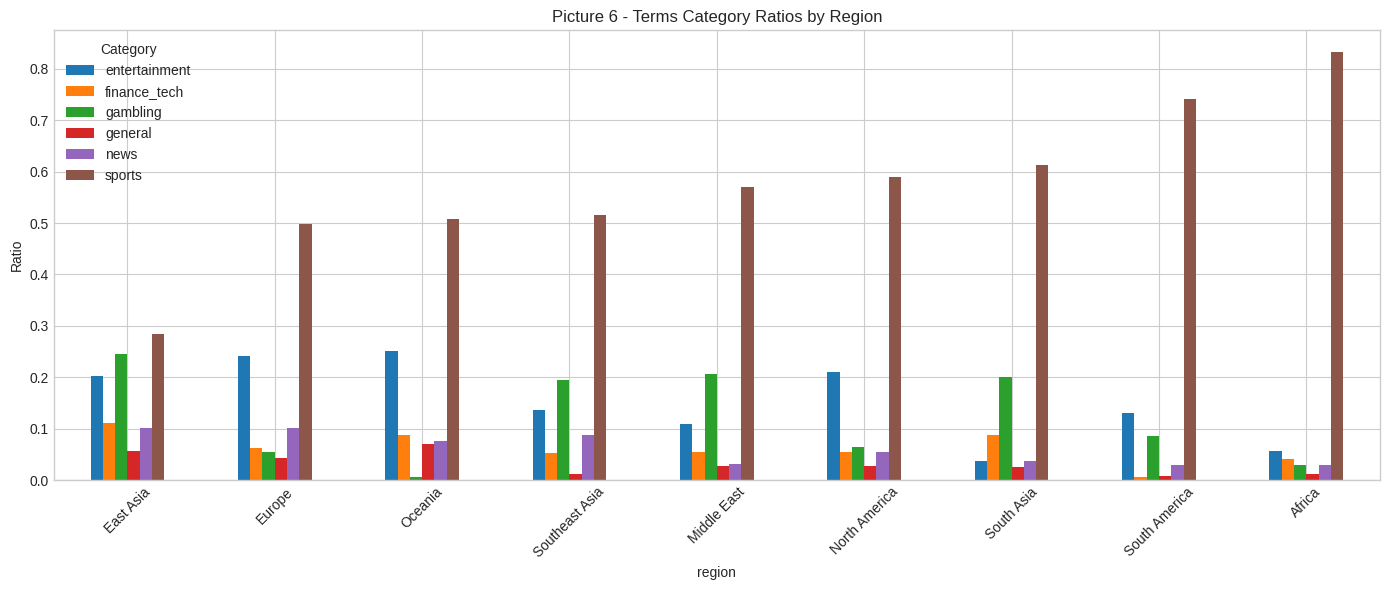

In [111]:
region_pdf = sample_region_agg.toPandas()
region_pdf = region_pdf.set_index("region")
region_pdf = region_pdf.sort_values("sports")

region_pdf.plot(kind="bar", figsize=(14, 6))
plt.xticks(rotation=45)
plt.title("Picture 6 - Terms Category Ratios by Region")
plt.ylabel("Ratio")
plt.legend(title="Category")
plt.tight_layout()
plt.show()

**Summary**

This grouped bar chart compares how different regions allocate their search attention across major content categories. Sports dominates every region, but its share is especially high in South America, Africa, and the Middle East, indicating strongly sport-centric search behavior. In contrast, regions like East Asia and Europe show more balanced patterns, with noticeably higher proportions of entertainment and news terms. Gambling also appears disproportionately in East Asia, Southeast Asia, and South Asia, echoing the regional spam diffusion patterns seen earlier in the project.

The chart highlights that global search volatility is shaped not only by which individual terms trend, but by the underlying content mix that each region is structurally inclined toward. These persistent category biases help explain why some areas could see more event-driven churn, others could show more stable attention, and certain regions may exhibit recurring patterns of spam or niche interest.

### **3.4 Google Trends with Country Indicators**

In the earlier sections, our analysis focused primarily on understanding the inherent dynamics of Google Trends itself, examining trending terms through temporal patterns, geographic distribution, and content attributes. We now introduce the World Bank’s development indicators to explore a new question: do Google Trends metrics behave differently across countries with varying levels of economic development and other structural characteristics?

Before assessing these relationships, we first examine how the two core Google Trends metrics are distributed across countries. That is, the score to top-terms and the percent_gain to rising-terms.

##### **3.4.1 Search Intensity Analysis: Are Countries More Event-Driven or Routine in Their Search Behavior?**

As noted in the data section, each term receives a set of 100 weekly scores for each refresh date, representing its relative search intensity over the past five years. Within each term’s time series, the highest point is normalized to 100, and all other scores reflect search volume relative to that peak. Importantly, these values do not represent absolute search volumes, which means that raw scores cannot be directly compared across different terms.

However, a derived metric can carry meaningful interpretation: the difference between a term’s average score and its median score, which we refer to as the “concentration gap”. This measure captures the shape of a term’s search-intensity curve. A larger concentration gap indicates that the peak is much higher than the typical level—signaling event-driven terms whose attention spikes sharply (e.g., product launches, breaking scandals) but remain relatively low during normal periods. Conversely, a smaller concentration gap suggests that the peak is closer to the median, reflecting routine, consistently searched terms such as daily utilities or recurring informational queries.

With this interpretation in mind, we now examine each country’s average term score and concentration gap. These metrics provide insights into whether a country’s trending ecosystem skews more toward episodic, event-driven attention or toward stable, everyday search behavior.

In [83]:
score_stats = (
    top_latest_merged
    .groupBy("country_name")
    .agg(
        F.mean("score").alias("mean_score"),
        F.expr("percentile_approx(score, 0.5)").alias("median_score")
    )
    .withColumn("concentration_gap", F.col("mean_score") - F.col("median_score"))
    .orderBy(F.desc("concentration_gap"))
)

score_stats_pd = score_stats.toPandas().round(2)

display(score_stats_pd)

,country_name,mean_score,median_score,concentration_gap
0,Spain,41.58,37.0,4.58
1,Belgium,41.29,37.0,4.29
2,France,42.96,39.0,3.96
3,South Africa,40.72,37.0,3.72
4,Canada,45.48,42.0,3.48
5,United Kingdom,43.30,40.0,3.30
6,Saudi Arabia,45.16,42.0,3.16
7,Germany,44.86,42.0,2.86
8,India,43.76,41.0,2.76
9,Australia,43.64,41.0,2.64


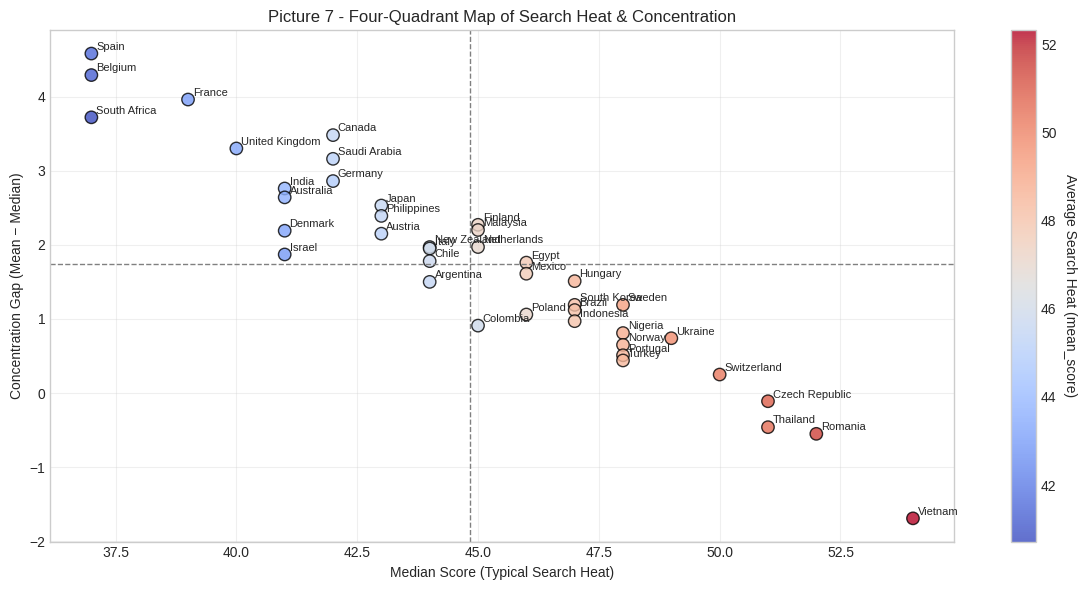

In [110]:
df = score_stats_pd.copy()

x_mean = df["median_score"].mean()
y_mean = df["concentration_gap"].mean()

plt.figure(figsize=(12, 6))
sc = plt.scatter(
    df["median_score"],
    df["concentration_gap"],
    c=df["mean_score"],
    cmap="coolwarm",
    alpha=0.8,
    edgecolor="k",
    s=80
)

cbar = plt.colorbar(sc)
cbar.set_label("Average Search Heat (mean_score)", rotation=270, labelpad=15)

plt.axvline(x=x_mean, color="gray", linestyle="--", linewidth=1)
plt.axhline(y=y_mean, color="gray", linestyle="--", linewidth=1)

for _, row in df.iterrows():
    plt.text(
        row["median_score"] + 0.1,
        row["concentration_gap"] + 0.05,
        row["country_name"],
        fontsize=8
    )

plt.title("Picture 7 - Four-Quadrant Map of Search Heat & Concentration", fontsize=12)
plt.xlabel("Median Score (Typical Search Heat)")
plt.ylabel("Concentration Gap (Mean − Median)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

The figure maps each country’s typical search heat (x-axis, median score) against how “spiky” its attention is (y-axis, mean–median). Countries on the upper-left, such as Spain, Belgium, South Africa, and France, have lower baseline heat but large concentration gaps, indicating highly event-driven behavior where attention is dominated by short-lived spikes. In contrast, countries in the lower-right quadrant, like the Czech Republic, Switzerland, Romania, Sweden, and Portugal, show higher typical heat with small gaps, suggesting a more stable and diversified search ecosystem.

The color scale encodes mean search heat, adding a second intensity cue: warmer colors indicate countries where terms, on average, attract stronger relative interest across weeks. Overall, higher median with low gap (often in warmer colors) corresponds to steadier, broad-based attention, while low median with high gap points to volatile, headline-driven search patterns.

##### **3.4.2 What Structural Differences in Trend Growth Do Global Markets Exhibit?**

For rising terms, one of the most important indicators is Percent Gain, which measures how much a term’s popularity has increased relative to the previous period. This value directly determines whether a term qualifies for the Top Rising list. A higher Percent Gain reflects a stronger surge in search interest and traffic. We begin by examining how the average surge magnitude varies across countries.

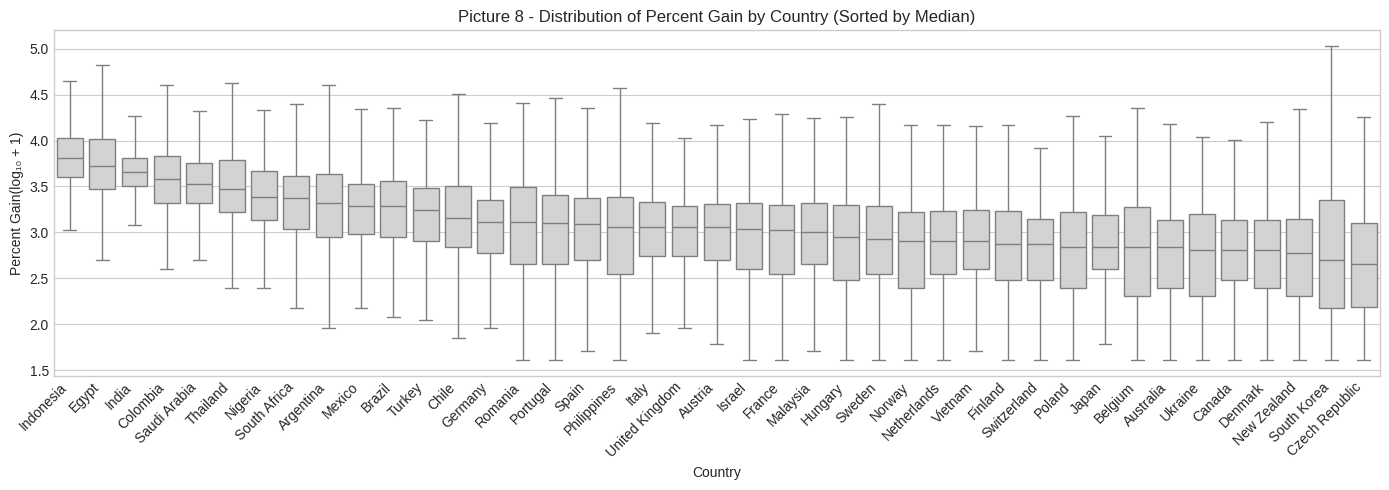

In [109]:
df = (
    rising_merged
    .select("country_name", "percent_gain")
    .filter(F.col("percent_gain").isNotNull())
)

df = df.withColumn("log_percent_gain", F.log10(F.col("percent_gain") + 1))

median_log_gain = (
    df.groupBy("country_name")
      .agg(F.expr("percentile_approx(log_percent_gain, 0.5)").alias("median_log_gain"))
      .orderBy(F.desc("median_log_gain"))
)

country_order = [row["country_name"] for row in median_log_gain.collect()]
pdf = df.toPandas()
pdf["country_name"] = pd.Categorical(pdf["country_name"], categories=country_order, ordered=True)

plt.figure(figsize=(14, 5))
sns.boxplot(
    data=pdf,
    x="country_name",
    y="log_percent_gain",
    order=country_order,
    showfliers=False,
    color="lightgray"
)
plt.title("Picture 8 - Distribution of Percent Gain by Country (Sorted by Median)")
plt.xlabel("Country")
plt.ylabel("Percent Gain(log₁₀ + 1)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

**Summary**

During the analysis, we found that the raw Percent Gain values were extremely large and highly dispersed, making them difficult to visualize effectively. To address this, we applied a log transformation to stabilize the scale and improve interpretability in our plots. This box plot compares the distribution of percent gain for rising search terms across countries after a log₁₀(+1) transform, sorted by each country’s median. The X-axis lists countries; the Y-axis shows percent gain (log₁₀+1).

This box plot compares the distribution of Percent Gain for rising search terms across countries, sorted by median values. A striking pattern emerges: countries on the left side, such as Indonesia, Egypt, India, Colombia, and Saudi Arabia, exhibit noticeably higher medians and more compact interquartile ranges, even after logarithmic scaling. This suggests that rising terms in these regions experience larger and more frequent surges in search interest, reflecting a more “burst-driven” attention dynamic.

In contrast, the countries on the right, primarily mature economies such as Japan, France, the Netherlands, Australia, Israel, and the Czech Republic, tend to display lower medians and broader, more diffuse spreads, indicating more moderate gains from higher baseline search volumes and generally more stable search behavior.

At first glance, the divide aligns surprisingly well with global economic classifications: higher-gain countries are largely emerging markets, whereas lower-gain countries are mostly developed economies. This visual pattern hints at a potential relationship between a country’s level of economic development and the volatility or explosiveness of its rising search interest. We will quantitatively examine this possibility in the following section by computing correlations between Percent Gain metrics and World Bank indicators.

##### **3.4.3 Heatmap Analysis: Correlation Between Trend Metrics and Country Indicators**

Now let us use a heatmap to examine the correlations between these national development indicators and the key Google Trends metrics.

In [86]:
# Prepare data for Top Terms table
top_latest_merged_cast = top_latest_merged.withColumn("score", F.col("score").cast(T.LongType()))

term_level_avg = (
    top_latest_merged_cast
    .groupBy("country_name", "term")
    .agg(
        F.avg("score").alias("avg_score"),
        F.first("GDP_current_US").alias("GDP_current_US"),
        F.first("`individuals_using_internet%`").alias("individuals_using_internet%"),
        F.first("voice_and_accountability_estimate").alias("voice_and_accountability_estimate"),
        F.first("population").alias("population")
    )
)

score_stats_spark = (
    term_level_avg
    .groupBy("country_name")
    .agg(
        F.expr("percentile_approx(avg_score, 0.5)").alias("median_score"),
        F.avg("avg_score").alias("mean_score"),
        F.first("GDP_current_US").alias("GDP_current_US"),
        F.first("`individuals_using_internet%`").alias("internet_access_percent"),
        F.first("voice_and_accountability_estimate").alias("voice_and_accountability_estimate"),
        F.first("population").alias("population")
    )
    .withColumn("gdp_per_capita", F.col("GDP_current_US") / F.col("population"))
)

final_df_spark = (
    score_stats_spark
    .withColumn(
        "concentration_gap",
        F.round(F.col("mean_score") - F.col("median_score"), 4)
    )
    .na.drop(subset=["GDP_current_US"])
    .withColumn("log_gdp", F.log(F.col("GDP_current_US")))
    .withColumn("mean_score", F.round(F.col("mean_score"), 4))
    .withColumn("median_score", F.round(F.col("median_score"), 4))
)

final_df_pd = final_df_spark.toPandas()

final_df_pd.head()

,country_name,median_score,mean_score,GDP_current_US,internet_access_percent,voice_and_accountability_estimate,population,gdp_per_capita,concentration_gap,log_gdp
0,Turkey,49.7143,48.6806,9.071184e+11,83.437164,-0.926608,84979912.0,10674.504400,-1.0336,27.533539
1,Argentina,45.9438,44.8998,6.311334e+11,88.375359,0.543527,46234832.0,13650.603779,-1.0440,27.170783
2,Norway,50.4444,49.4397,5.933490e+11,98.999977,1.774868,5457127.0,108729.187507,-1.0047,27.109049
3,Israel,46.6818,46.5796,5.250024e+11,NaN,0.674336,9557500.0,54930.938080,-0.1023,26.986669
4,Mexico,50.0000,47.5973,1.465854e+12,NaN,-0.121708,127504128.0,11496.522424,-2.4027,28.013459


In [87]:
# Prepare data for Rising Terms table
rising_merged_cast = (
    rising_merged
    .withColumn("percent_gain", F.col("percent_gain").cast(T.DoubleType()))
)

rising_stats_spark = (
    rising_merged_cast
    .groupBy("country_name")
    .agg(
        F.avg("percent_gain").alias("mean_percent_gain"),
        F.sum("percent_gain").alias("sum_percent_gain"),
        F.first("GDP_current_US").alias("GDP_current_US"),
        F.first("`individuals_using_internet%`").alias("internet_access_percent"),
        F.first("voice_and_accountability_estimate").alias("voice_and_accountability_estimate"),
        F.first("population").alias("population")
     )
    .withColumn("gdp_per_capita", F.col("GDP_current_US") / F.col("population"))
)

rising_final_df_spark = (
    rising_stats_spark
    .na.drop(subset=["GDP_current_US"])
    .withColumn("log_gdp", F.log(F.col("GDP_current_US")))
    .withColumn("mean_percent_gain", F.round(F.col("mean_percent_gain"), 4))
    .withColumn("sum_percent_gain", F.round(F.col("sum_percent_gain"), 4))
)

rising_final_df_pd = rising_final_df_spark.toPandas()
rising_final_df_pd.head()

,country_name,mean_percent_gain,sum_percent_gain,GDP_current_US,internet_access_percent,voice_and_accountability_estimate,population,gdp_per_capita,log_gdp
0,Turkey,2671.3875,2137110.0,9.071184e+11,83.437164,-0.926608,84979912.0,10674.504400,27.533539
1,Argentina,3844.3125,3075450.0,6.311334e+11,88.375359,0.543527,46234832.0,13650.603779,27.170783
2,Norway,1401.6442,1142340.0,5.933490e+11,98.999977,1.774868,5457127.0,108729.187507,27.109049
3,New Zealand,1242.1963,1063320.0,2.481017e+11,NaN,1.639671,5124100.0,48418.590501,26.237105
4,Poland,1467.9442,1156740.0,6.881250e+11,86.941139,0.600356,36821748.0,18688.004310,27.257236


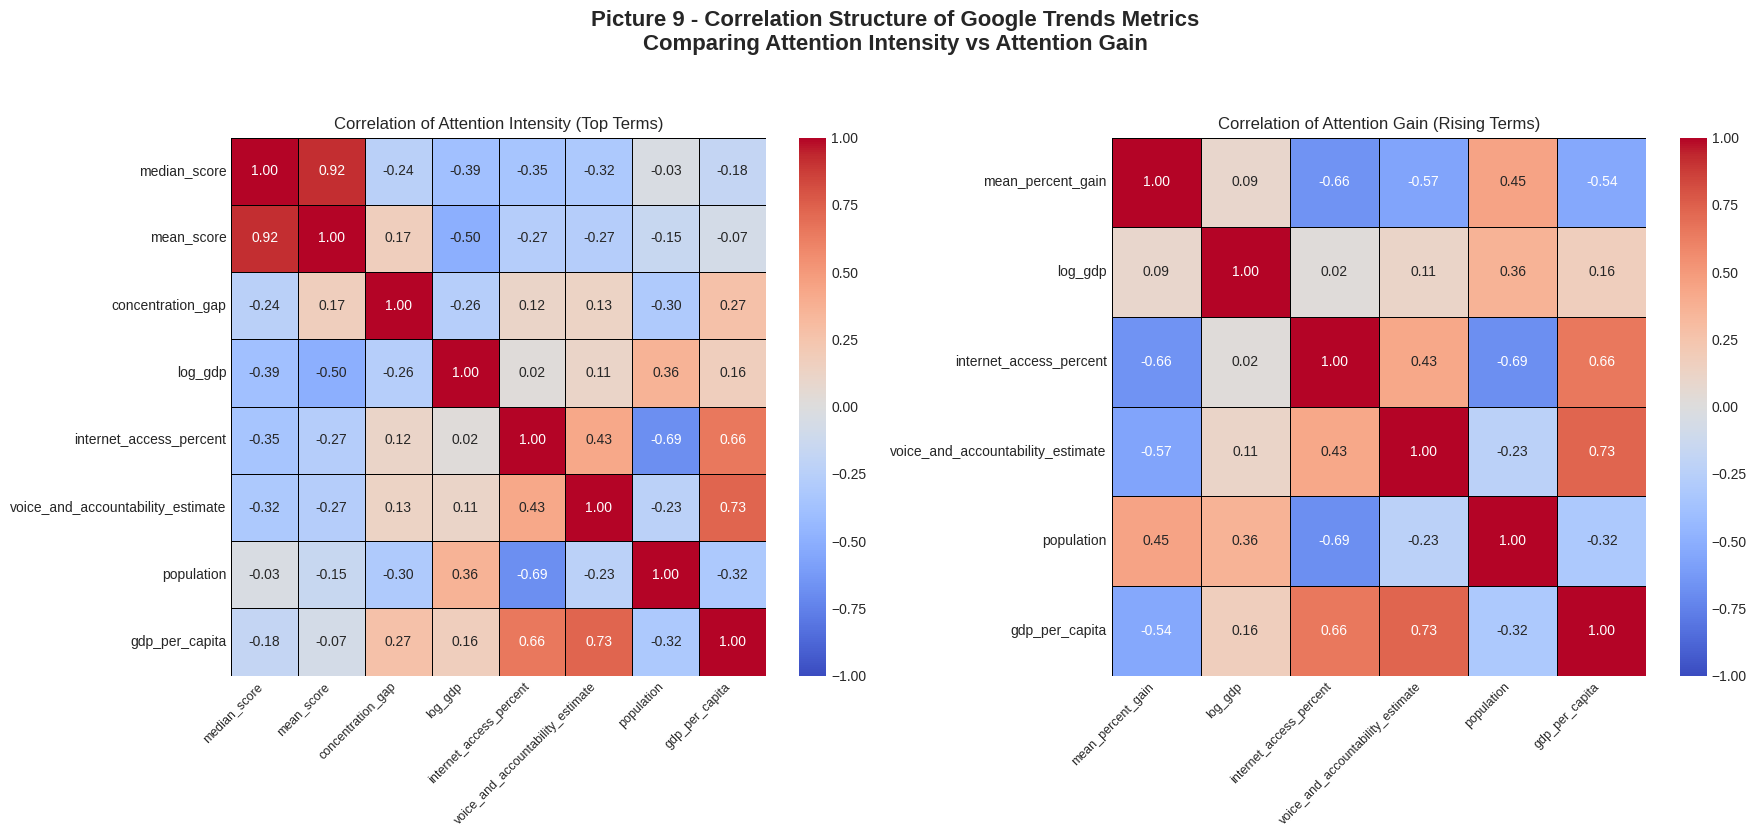

In [108]:
# Heatmap Plot
intensity_vars = [
    'median_score',
    'mean_score',
    'concentration_gap',
    'log_gdp',
    'internet_access_percent',
    'voice_and_accountability_estimate',
    'population',
    'gdp_per_capita'
]

intensity_corr_matrix = final_df_pd[intensity_vars].corr(method='pearson')

GAIN_VARS = [
    'mean_percent_gain',
    'log_gdp',
    'internet_access_percent',
    'voice_and_accountability_estimate',
    'population',
    'gdp_per_capita'
]

gain_corr_matrix = rising_final_df_pd[GAIN_VARS].corr(method='pearson')

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

sns.heatmap(
    intensity_corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    linecolor="black",
    vmin=-1, vmax=1,
    ax=axes[0]
)
axes[0].set_title("Correlation of Attention Intensity (Top Terms)", fontsize=12)

sns.heatmap(
    gain_corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    linecolor="black",
    vmin=-1, vmax=1,
    ax=axes[1]
)
axes[1].set_title("Correlation of Attention Gain (Rising Terms)", fontsize=12)

for ax in axes:
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        ha='right',
        fontsize=9
    )

fig.suptitle(
    "Picture 9 - Correlation Structure of Google Trends Metrics\nComparing Attention Intensity vs Attention Gain",
    fontsize=16, fontweight="bold", y=1.04
)

plt.tight_layout()
plt.show()

**Summary**

These two heatmaps summarize how national characteristics relate to search attention patterns. The left panel examines attention intensity in top terms using indicators such as median score, mean score, and concentration gap. As expected, median and mean scores are strongly correlated, and countries with higher GDP or stronger governance tend to show slightly lower attention intensity, suggesting that search interest in these environments is more evenly distributed rather than dominated by a few high-scoring topics.

The right panel focuses on attention gain in rising terms. Here we see that percent gain is higher in countries with lower internet penetration, weaker institutional quality, and lower income levels, indicating more pronounced spikes in the trending ecosystem. These countries exhibit more volatile search dynamics, whereas richer and more connected societies show milder, less dramatic fluctuations.

Across both heatmaps, several pairs of variables stand out with notably strong correlations. This motivates a closer look at specific relationships of interest. In the next section, we examine four key indicator pairs in detail: Mean Search Score versus Log GDP, Percent Gain versus GDP per Capita, Percent Gain versus Internet Access, and Percent Gain versus Voice and Accountability. These focused comparisons help reveal which structural factors most strongly shape how national attention behaves on Google Trends.

##### **3.4.4 How Does Mean Search Score Relate to Log GDP?**

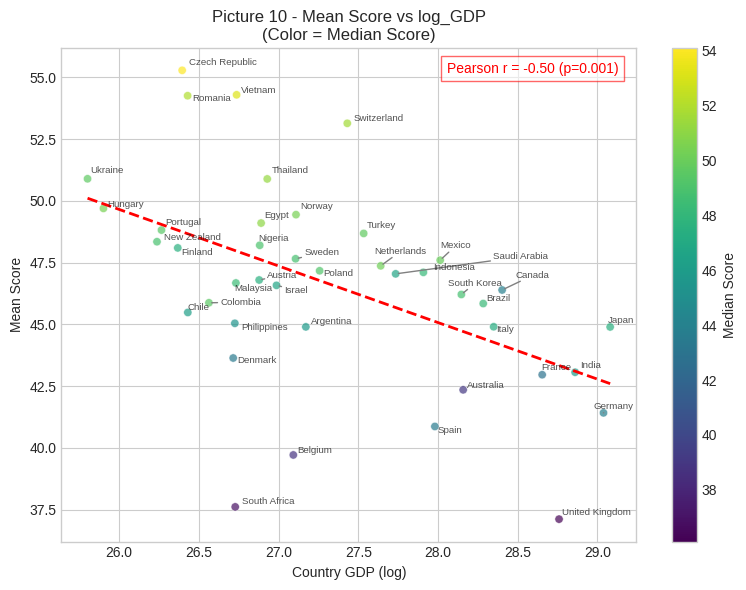

In [105]:
plt.figure(figsize=(8, 6))

corr, pval = pearsonr(final_df_pd["log_gdp"], final_df_pd["mean_score"])
corr_text = f"Pearson r = {corr:.2f} (p={pval:.3f})"

ax = sns.scatterplot(
    data=final_df_pd,
    x="log_gdp",
    y="mean_score",
    hue="median_score",
    palette="viridis",
    sizes=(40, 600),
    alpha=0.7,
    legend=False
)

sns.regplot(
    data=final_df_pd,
    x="log_gdp",
    y="mean_score",
    scatter=False,
    ax=ax,
    color="red",
    line_kws={"linestyle": "--", "linewidth": 2},
    ci=None
)

norm = plt.Normalize(final_df_pd["median_score"].min(), final_df_pd["median_score"].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("Median Score")

ax.text(
    0.67, 0.95, corr_text,
    transform=ax.transAxes,
    fontsize=10,
    color="red",
    bbox=dict(facecolor="white", alpha=0.6, edgecolor="red")
)

texts = []
for i, row in final_df_pd.iterrows():
    texts.append( ax.text( row["log_gdp"], row["mean_score"], row["country_name"], fontsize=7, alpha=0.8 ) )

adjust_text(texts, arrowprops=dict(arrowstyle="-", color='gray'))

plt.title("Picture 10 - Mean Score vs log_GDP\n(Color = Median Score)", fontsize=12)
plt.xlabel("Country GDP (log)")
plt.ylabel("Mean Score")
plt.tight_layout()
plt.show()

**Summary**

This scatterplot illustrates how a country’s economic scale relates to the intensity of its top search terms. Each point represents a country, positioned by its log GDP on the horizontal axis and its mean top-term score on the vertical axis. The colour shading reflects the median score, so countries with darker tones typically show stronger overall attention. A fitted regression line summarizes the general direction of the relationship, and the Pearson correlation displayed on the plot indicates a moderately strong negative association between log GDP and mean score. Countries with smaller or mid-sized economies, such as Ukraine, Vietnam, and Thailand, tend to sit higher on the vertical axis, meaning their top search terms receive consistently stronger attention. Conversely, the largest economies, including Japan, Germany, France, India, and the United Kingdom, cluster toward lower mean scores.

Seen together, the distribution of points and the downward-sloping trend suggest that wealthier economies tend to spread their search attention more evenly across a broader set of terms, while emerging or less affluent countries concentrate more attention on fewer dominant queries. In higher-GDP regions, online information environments appear more fragmented and diversified, reducing the intensity of any single top term. In contrast, countries with lower GDP show more focused collective attention, with top terms standing out more strongly in daily search behaviour. This pattern reinforces the idea that economic development shapes not just access to information but also the way national audiences distribute their attention across digital platforms.


##### **3.4.5 How Is Rising-Term Percent Gain Related to GDP per Capita?**

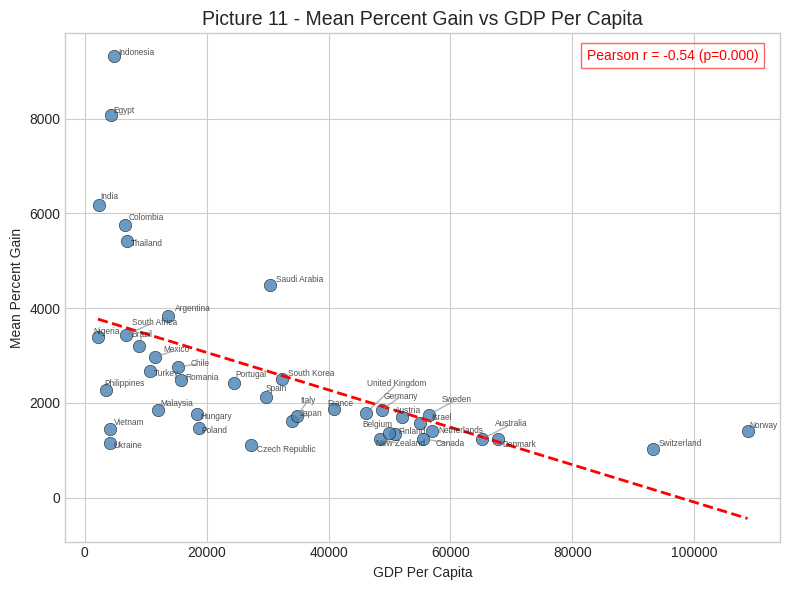

In [106]:
df = rising_final_df_pd.copy()

corr, pval = pearsonr(df["gdp_per_capita"], df["mean_percent_gain"])
corr_text = f"Pearson r = {corr:.2f} (p={pval:.3f})"

plt.figure(figsize=(8, 6))
ax = plt.gca()

ax.scatter(
    df["gdp_per_capita"],
    df["mean_percent_gain"],
    s=80,
    alpha=0.8,
    edgecolors="k",
    linewidths=0.4,
    color="steelblue"
)

sns.regplot(
    data=df,
    x="gdp_per_capita",
    y="mean_percent_gain",
    scatter=False,
    ax=ax,
    color="red",
    line_kws={"linestyle": "--", "linewidth": 2},
    ci=None
)

ax.text(
    0.97,
    0.97,
    corr_text,
    transform=ax.transAxes,
    fontsize=10,
    color="red",
    ha="right",
    va="top",
    bbox=dict(facecolor="white", alpha=0.6, edgecolor="red")
)

texts = []
for _, row in df.iterrows():
    texts.append(
        ax.text(
            row["gdp_per_capita"],
            row["mean_percent_gain"],
            row["country_name"],
            fontsize=6,
            alpha=0.8
        )
    )

adjust_text(
    texts,
    ax=ax,
    arrowprops=dict(arrowstyle="-", color="gray", alpha=0.6),
    expand_points=(1.2, 1.4),
    expand_text=(1.2, 1.4)
)

plt.title("Picture 11 - Mean Percent Gain vs GDP Per Capita", fontsize=14)
plt.xlabel("GDP Per Capita")
plt.ylabel("Mean Percent Gain")

plt.tight_layout()
plt.show()


**Summary**

This chart examines the relationship between a country’s GDP per capita (x-axis) and its mean percent gain of Google Trends rising terms (y-axis). Each point represents a country.

This chart shows a moderate negative correlation (Pearson r = –0.54, p < 0.001). Within it, some countries with lower GDP per capita (e.g., Indonesia, Egypt, India) tend to show very high mean percent gains, while wealthier countries (e.g., Switzerland, Norway, Denmark) show much lower gains. This suggests that in lower-income countries, baseline search volumes for many terms may be lower or more volatile, making it easier for new trends, events, or cultural shifts to produce very large relative spikes. This reflects a catch-up dynamic: search behavior in emerging economies is more responsive and has more room for rapid acceleration.


##### **3.4.6 How Percent Gain Varies with Internet Access and Population?**

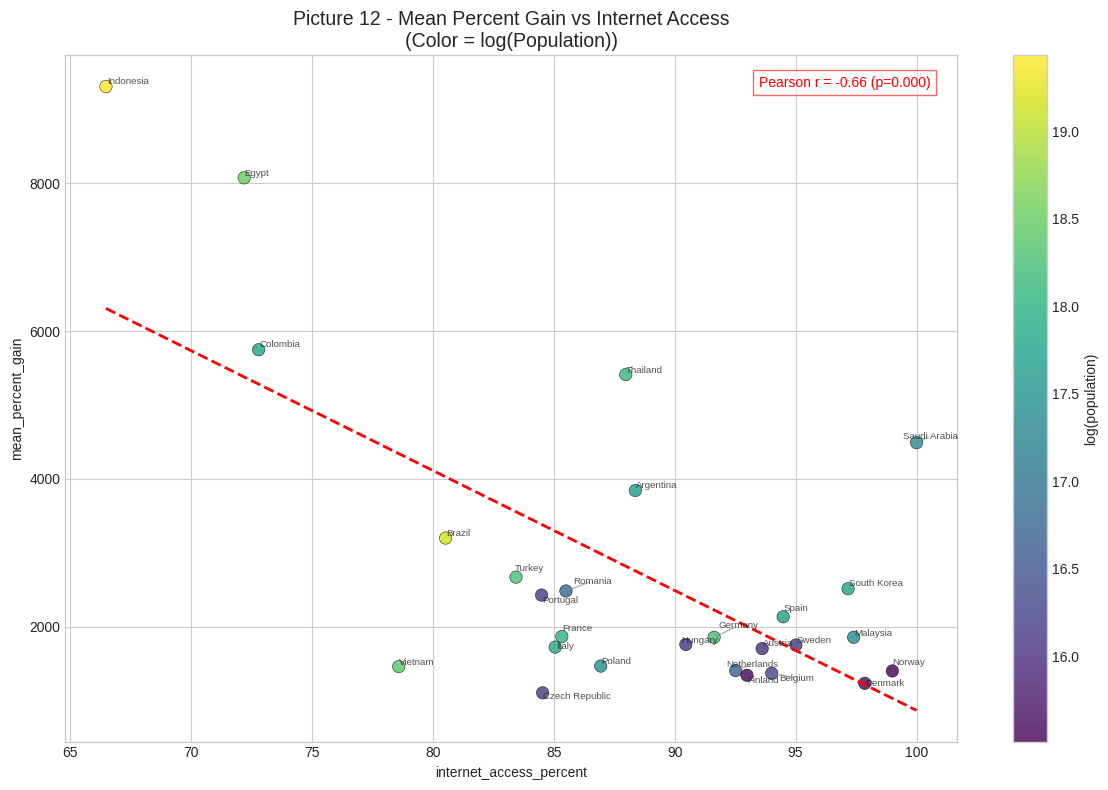

In [107]:
df = rising_final_df_pd.copy()
df["log_population"] = np.log(df["population"] + 1)

filtered = rising_final_df_pd[[
    "internet_access_percent",
    "mean_percent_gain",
    "population",
    "country_name"
]].dropna().copy()

filtered["log_population"] = np.log(filtered["population"] + 1)

corr, pval = pearsonr(
    filtered["internet_access_percent"],
    filtered["mean_percent_gain"]
)
corr_text = f"Pearson r = {corr:.2f} (p={pval:.3f})"

plt.figure(figsize=(12, 8))
ax = plt.gca()

sc = ax.scatter(
    filtered["internet_access_percent"],
    filtered["mean_percent_gain"],
    c=filtered["log_population"],
    cmap="viridis",
    s=80,
    alpha=0.8,
    edgecolors="k",
    linewidths=0.4
)

sns.regplot(
    data=filtered,
    x="internet_access_percent",
    y="mean_percent_gain",
    scatter=False,
    ax=ax,
    color="red",
    line_kws={"linestyle": "--", "linewidth": 2},
    ci=None
)

ax.text(
    0.97,
    0.97,
    corr_text,
    transform=ax.transAxes,
    fontsize=10,
    color="red",
    ha="right",
    va="top",
    bbox=dict(facecolor="white", alpha=0.6, edgecolor="red")
)

texts = []
for _, row in filtered.iterrows():
    texts.append(
        ax.text(
            row["internet_access_percent"],
            row["mean_percent_gain"],
            row["country_name"],
            fontsize=7,
            alpha=0.8
        )
    )

adjust_text(
    texts,
    ax=ax,
    arrowprops=dict(arrowstyle="-", color="gray", alpha=0.6),
    expand_points=(1.2, 1.4),
    expand_text=(1.2, 1.4)
)

cbar = plt.colorbar(sc, ax=ax)
cbar.set_label("log(population)")

plt.title("Picture 12 - Mean Percent Gain vs Internet Access\n(Color = log(Population))", fontsize=14)
plt.xlabel("internet_access_percent")
plt.ylabel("mean_percent_gain")

plt.tight_layout()
plt.show()

**Summary**

This chart depicts the relationship between internet access rates (x-axis) and the mean percent gain of Google Trends rising terms (y-axis). Each point corresponds to a country, and the color shows population size on a log scale.

This chart shows an even stronger negative correlation (Pearson r = –0.66, p < 0.001), indicating a tighter relationship between internet access and rising-term percent gains. Countries with lower levels of internet penetration (e.g., Indonesia, Egypt, Colombia) tend to exhibit markedly higher mean percent gains, while countries with near-universal connectivity (e.g., Denmark, Belgium, Norway) show much smaller increases. This suggests that in markets where a smaller share of the population is online, search activity is more sensitive to sudden engagement shifts, and the influx of newly connected users or viral events can generate disproportionately large relative spikes. Although the color gradient suggests that higher-population countries tend to fall in the lower-gain, higher-access region, this pattern is largely a reflection of global development structure that, many large-population countries are still expanding digital access. Population itself does not appear to independently drive percent gains; rather, it co-varies with internet-access maturity. Overall, the results indicate that digital-maturity differences, not demographic scale, are the primary factor shaping rising-term percent gain patterns.


##### **3.4.7 How Percent Gain Relates to Freedom of Speech?**

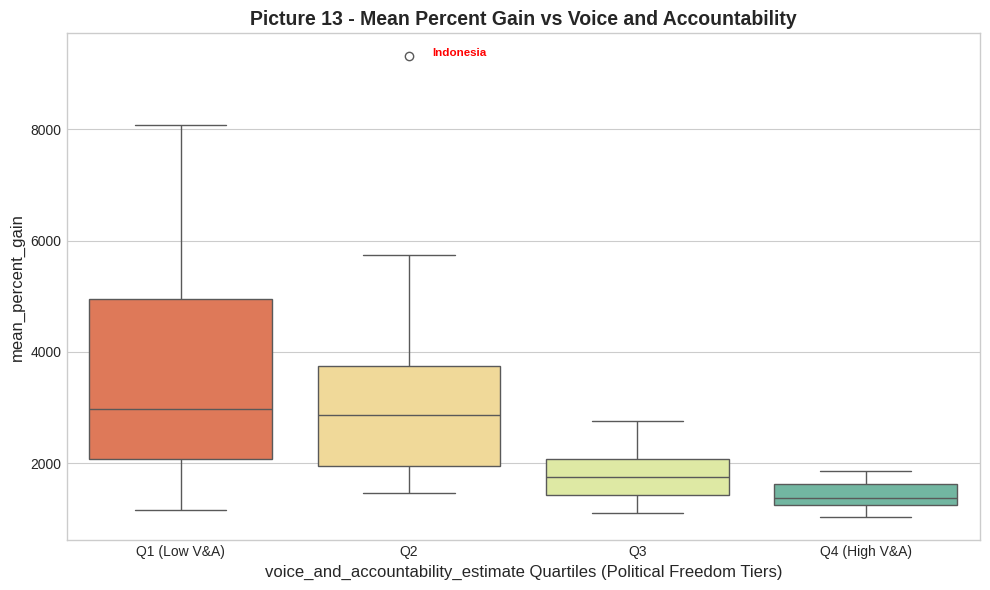

In [92]:
COUNTRY_NAME = 'country_name'
GAP = 'mean_percent_gain'
VNA = 'voice_and_accountability_estimate'

df_chart_e = rising_final_df_pd.dropna(subset=[GAP, VNA]).copy()

df_chart_e['V&A_Quartile'] = pd.qcut(
    df_chart_e[VNA],
    q=4,
    labels=['Q1 (Low V&A)', 'Q2', 'Q3', 'Q4 (High V&A)'],
    duplicates='drop'
)
VNA_QUARTILE = 'V&A_Quartile'

try:
    r, p = stats.pearsonr(df_chart_e[VNA], df_chart_e[GAP])
    CORRELATION_E = r
except Exception:
    CORRELATION_E = 0.0

plt.figure(figsize=(10, 6))
ax = sns.boxplot(
    data=df_chart_e,
    x=VNA_QUARTILE,
    y=GAP,
    hue=VNA_QUARTILE,
    palette='Spectral',
    legend=False
)

for q_label in df_chart_e[VNA_QUARTILE].cat.categories:
    subset = df_chart_e[df_chart_e[VNA_QUARTILE] == q_label]

    Q1 = subset[GAP].quantile(0.25)
    Q3 = subset[GAP].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    outliers = subset[(subset[GAP] > upper_bound) | (subset[GAP] < lower_bound)]

    x_pos = df_chart_e[VNA_QUARTILE].cat.categories.get_loc(q_label)

    for _, row in outliers.iterrows():
        ax.text(
            x_pos + 0.1,
            row[GAP],
            row[COUNTRY_NAME],
            ha='left',
            size='small',
            color='red',
            weight='bold'
        )

plt.title(
    'Picture 13 - Mean Percent Gain vs Voice and Accountability',
    fontsize=14,
    fontweight='bold'
)
plt.xlabel(f'{VNA} Quartiles (Political Freedom Tiers)', fontsize=12)
plt.ylabel(GAP, fontsize=12)
plt.tight_layout()
plt.show()

**Summary**

This boxplot compares rising-term spike intensity across four quartiles of the Voice & Accountability index, shown on the x-axis. This index captures the degree of political freedom and freedom of expression in each country, so moving from Q1 to Q4 roughly corresponds to moving from low to high levels of speech freedom. The y-axis shows the mean percent gain of rising terms, which measures how sharply search interest jumps when a topic begins trending.

The pattern is clear and monotonic: countries in the lowest freedom quartile (Q1) exhibit the largest and most volatile percent gains, with high medians and wide variability. As political freedom increases across Q2 and Q3, spike intensity declines steadily. By Q4, the most free environments, percent gains are tightly clustered and substantially lower, reflecting much more stable attention dynamics. Indonesia stands out as an extreme outlier with unusually large spikes.

Overall, the figure suggests that in countries with constrained speech environments, trending topics tend to break through in sharper, more dramatic bursts, while in more open information ecosystems, attention is distributed more smoothly and spikes are less pronounced.

Across this chapter, we showed that Google Trends metrics do not behave uniformly across countries but instead vary systematically with national characteristics such as economic development, digital access, and freedom of expression. Countries with higher GDP, stronger institutions, and mature internet infrastructure tend to exhibit lower attention intensity, smaller rising-term spikes, and more stable search ecosystems. In contrast, emerging economies and less open information environments display sharper, more concentrated bursts of attention, with rising terms that surge more dramatically and top terms that dominate more strongly. Together, these patterns indicate that the structure of a country’s economic and informational landscape shapes how collective attention forms, peaks, and dissipates. Having established these cross-country relationships, we now turn to a new question: given these dynamics, can we use machine learning to predict whether a trending rising term is likely to sustain its momentum or quickly fade from the spotlight?

### **3.5 Machine Learning: Prediction of Trend Sustainability**

In this chapter, we use logistic regression to predict whether a term that appears in the current refresh cycle is likely to persist into the next one. We begin by constructing a baseline dataset that identifies, for each term, whether it successfully carries over to the subsequent cycle, which serves as our Y label. We then introduce the numerical variables examined in earlier sections, incorporating both Google Trends–based metrics and country-level macro indicators as predictors.

In [93]:
print(rising_merged.columns)

['country_name', 'refresh_date', 'term', 'rank', 'percent_gain', 'date', 'goverment_effectiveness_estimate', 'individuals_using_internet%', 'GDP_current_US', 'voice_and_accountability_estimate', 'population']


In [94]:
# Base table with WB fields
rising_base = (
    rising_merged
    .withColumn("refresh_date_date", F.to_date("refresh_date"))
    .withColumn("gdp_per_capita", F.col("GDP_current_US")/F.col("population"))
    .select(
        "country_name",
        "term",
        "refresh_date",
        "refresh_date_date",
        "rank",
        "percent_gain",
        "goverment_effectiveness_estimate",
        "individuals_using_internet%",
        "GDP_current_US",
        "voice_and_accountability_estimate",
        "population",
        "gdp_per_capita"
    )
    .dropDuplicates()
)

In [95]:
# Distinct refresh sequence per country
dates_by_country = (
    rising_base
    .select("country_name", "refresh_date_date")
    .distinct()
)

w_dates = W.partitionBy("country_name").orderBy("refresh_date_date")

dates_by_country = dates_by_country.withColumn(
    "next_refresh_date",
    F.lead("refresh_date_date").over(w_dates)
)

rising_with_next = (
    rising_base
    .join(dates_by_country, on=["country_name", "refresh_date_date"], how="left")
)

# Table of (country, term, date) for the future lookup
future_terms = (
    rising_base
    .select(
        F.col("country_name").alias("country_future"),
        F.col("refresh_date_date").alias("future_date"),
        F.col("term").alias("term_future")
    )
    .dropDuplicates()
)

# Add label
rising_labeled = (
    rising_with_next
    .join(
        future_terms,
        (rising_with_next.country_name == future_terms.country_future) &
        (rising_with_next.next_refresh_date == future_terms.future_date) &
        (rising_with_next.term == future_terms.term_future),
        how="left"
    )
    .withColumn(
        "continued_next",
        F.when(F.col("next_refresh_date").isNull(), F.lit(None))
         .otherwise(
             F.when(F.col("term_future").isNotNull(), F.lit(1)).otherwise(F.lit(0))
         )
    )
    .filter(F.col("continued_next").isNotNull())
)

In [96]:
# Change in percent_gain per (country, term)
w_term = W.partitionBy("country_name", "term").orderBy("refresh_date_date")

rising_feats = (
    rising_labeled
    .withColumn("percent_gain_prev", F.lag("percent_gain").over(w_term))
    .withColumn(
        "pctgain_change",
        F.when(F.col("percent_gain_prev").isNull(), F.lit(0.0))
         .otherwise(F.col("percent_gain") - F.col("percent_gain_prev"))
    )
)

# Join term-age table (already computed earlier from rising_all)
rising_feats = (
    rising_feats
    .join(
        term_age_rising.select(
            "country_name", "term", "term_age_days", "streak_len_refresh"
        ),
        on=["country_name", "term"],
        how="left"
    )
)

Since the Internet Access indicator contains missing values for several countries, reflecting gaps in World Bank coverage, we aim to avoid unnecessary data loss while also assessing how much this variable actually contributes to predictive performance. To do this, we estimate two versions of the model. Model A excludes Internet Access and is trained on the full dataset, while Model B includes the variable but is restricted to countries for which the indicator is available. We then compare the results to evaluate the impact of incorporating this feature.

In [97]:
# Model A: Without Internet User %

base_features = [
    "percent_gain",
    "pctgain_change",
    "rank",
    "goverment_effectiveness_estimate",
    "GDP_current_US",
    "voice_and_accountability_estimate",
    "population",
    "gdp_per_capita"
]

for c in base_features + ["continued_next"]:
    rising_feats = rising_feats.withColumn(c, F.col(c).cast("double"))

ml_df_no_internet = (
    rising_feats
    .select(base_features + ["continued_next"])
    .dropna()
    .cache()
)

print("Model A rows:", ml_df_no_internet.count())


Model A rows: 31675


In [98]:
# Model B — WITH internet users %

features_with_internet = base_features + ["individuals_using_internet%"]

# Cast the extra column
rising_feats = rising_feats.withColumn("individuals_using_internet%", F.col("individuals_using_internet%").cast("double"))

ml_df_with_internet = (
    rising_feats
    .select(features_with_internet + ["continued_next"])
    .dropna()
    .cache()
)

print("Model B rows:", ml_df_with_internet.count())

Model B rows: 20887


In [99]:
def train_logit(df, feature_cols, label_col="continued_next", seed=843):
    train_df, test_df = df.randomSplit([0.8, 0.2], seed=seed)

    assembler = VectorAssembler(inputCols=feature_cols, outputCol="features_raw")
    scaler = StandardScaler(inputCol="features_raw", outputCol="features", withMean=True, withStd=True)
    lr = LogisticRegression(featuresCol="features", labelCol=label_col)

    pipeline = Pipeline(stages=[assembler, scaler, lr])
    model = pipeline.fit(train_df)

    preds = model.transform(test_df)
    evaluator = BinaryClassificationEvaluator(labelCol=label_col, rawPredictionCol="rawPrediction")
    auc = evaluator.evaluate(preds)

    return model, preds, auc

# Model A
model_no_int, preds_no_int, auc_no_int = train_logit(ml_df_no_internet, base_features)
print("Model A (no internet) AUC:", auc_no_int)

# Model B
model_with_int, preds_with_int, auc_with_int = train_logit(ml_df_with_internet, features_with_internet)
print("Model B (with internet) AUC:", auc_with_int)

Model A (no internet) AUC: 0.6422730852669561


Model B (with internet) AUC: 0.6426770637898696


In [100]:
# Grab underlying LR models & summaries
lr_no   = model_no_int.stages[-1]
lr_int  = model_with_int.stages[-1]

summ_no  = lr_no.summary
summ_int = lr_int.summary

# Coefficients
coef_no  = lr_no.coefficients.toArray()
coef_int = lr_int.coefficients.toArray()

# Build per-model tables
df_no = pd.DataFrame({
    "feature": base_features,
    "coef_no_internet": coef_no
})

df_int = pd.DataFrame({
    "feature": features_with_internet,   # base_features + "individuals_using_internet%"
    "coef_with_internet": coef_int
})

# Merge side-by-side (outer join keeps the extra internet feature row)
coef_compare = (
    df_no.merge(df_int, on="feature", how="outer")
         .sort_values("feature")
)

# Round for readability
coef_compare["coef_no_internet"]   = coef_compare["coef_no_internet"].round(4)
coef_compare["coef_with_internet"] = coef_compare["coef_with_internet"].round(4)

coef_compare

,feature,coef_no_internet,coef_with_internet
4,GDP_current_US,0.0398,0.0353
7,gdp_per_capita,0.0198,0.0538
3,goverment_effectiveness_estimate,-0.0444,-0.0361
8,individuals_using_internet%,NaN,-0.0291
1,pctgain_change,-0.1069,-0.1326
0,percent_gain,0.0432,0.0368
6,population,-0.0211,0.0123
2,rank,-0.4695,-0.4643
5,voice_and_accountability_estimate,-0.0690,-0.0824


In [101]:
metrics_compare = pd.DataFrame({
    "metric": ["Intercept", "Accuracy", "AUC"],
    "Model A: no internet %": [
        lr_no.intercept,
        summ_no.accuracy,
        summ_no.areaUnderROC
    ],
    "Model B: with internet %": [
        lr_int.intercept,
        summ_int.accuracy,
        summ_int.areaUnderROC
    ],
})

metrics_compare = metrics_compare.round(4)
metrics_compare

,metric,Model A: no internet %,Model B: with internet %
0,Intercept,-0.7971,-0.7803
1,Accuracy,0.6833,0.6791
2,AUC,0.6371,0.6369


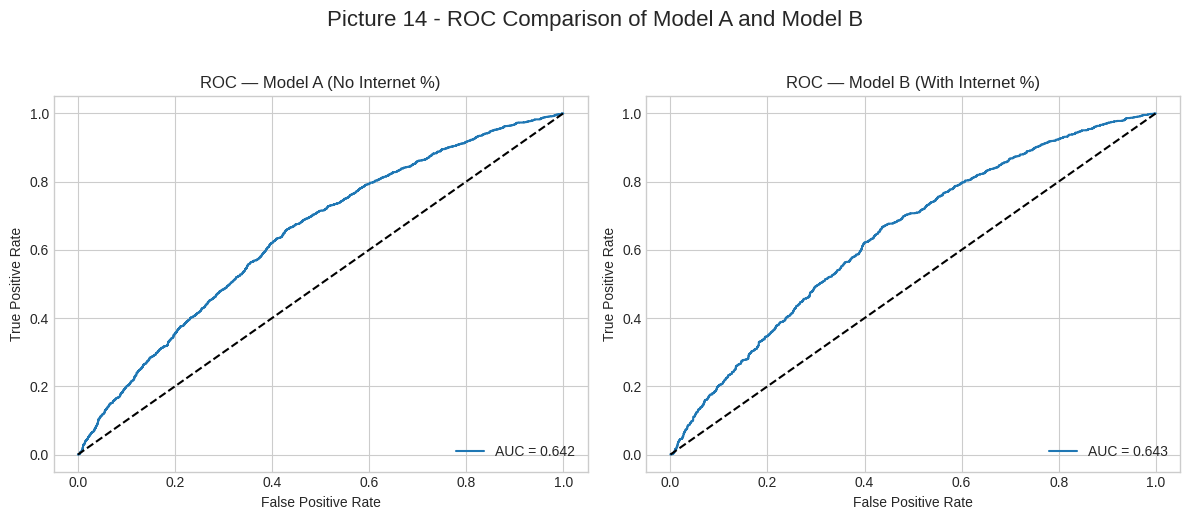

In [102]:
def get_roc_points(preds):
    pdf = preds.select("probability", "continued_next").toPandas()
    pdf["score"] = pdf["probability"].apply(lambda v: float(v[1]))
    y_true = pdf["continued_next"].values
    y_score = pdf["score"].values
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc

fpr_no, tpr_no, auc_no = get_roc_points(preds_no_int)
fpr_int, tpr_int, auc_int = get_roc_points(preds_with_int)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Model A
ax = axes[0]
ax.plot(fpr_no, tpr_no, label=f"AUC = {auc_no:.3f}")
ax.plot([0, 1], [0, 1], "k--")
ax.set_title("ROC — Model A (No Internet %)")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.legend(loc="lower right")
ax.grid(True)

# Model B
ax = axes[1]
ax.plot(fpr_int, tpr_int, label=f"AUC = {auc_int:.3f}")
ax.plot([0, 1], [0, 1], "k--")
ax.set_title("ROC — Model B (With Internet %)")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.legend(loc="lower right")
ax.grid(True)

fig.suptitle("Picture 14 - ROC Comparison of Model A and Model B", fontsize=16, y=1.03)

plt.tight_layout()
plt.show()

**Summary**

These ROC curves evaluate the performance of two logistic regression models designed to predict whether a rising term continues into the next refresh. Model A uses only universally available trend and country-level features, allowing us to include data for all countries. Model B adds “individuals using the internet (%)”, but at the cost of excluding several countries where this metric is missing. Running both models side-by-side allows us to assess whether this additional socioeconomic variable provides meaningful predictive lift.

The results show that both ROC curves are extremely similar, with AUC values around 0.64 for both models. This indicates modest but consistent predictive power and suggests that while internet penetration is an intuitive factor, it does not materially improve predictive accuracy in this dataset. Importantly, the similarity between the curves also validates our decision to build Model A first: even without the internet variable, the model captures the bulk of the explainable continuation behavior, and Model B serves as a robustness check rather than an essential improvement.

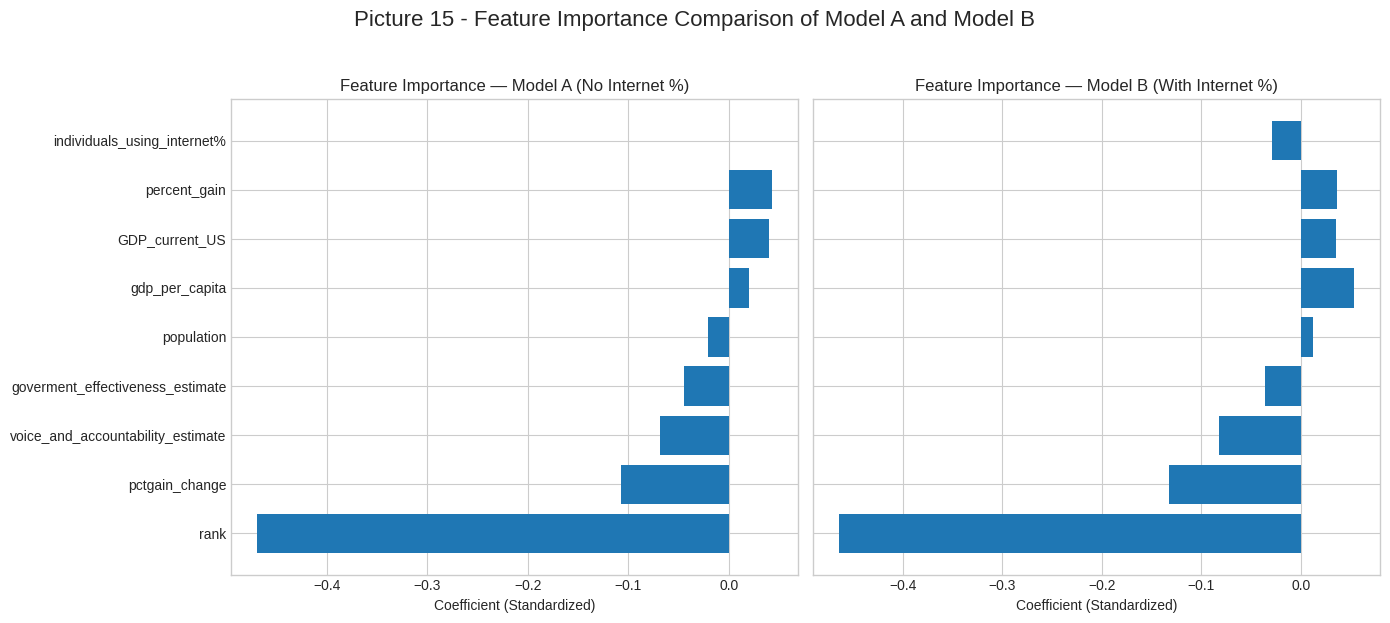

In [103]:
def coef_df(pipeline_model, feature_cols):
    lr_model = pipeline_model.stages[-1]
    coef = lr_model.coefficients.toArray()
    return pd.DataFrame({"feature": feature_cols, "coef": coef}).sort_values("coef")

coef_no = coef_df(model_no_int, base_features)
coef_int = coef_df(model_with_int, features_with_internet)

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Model A
ax = axes[0]
ax.barh(coef_no["feature"], coef_no["coef"])
ax.set_title("Feature Importance — Model A (No Internet %)")
ax.set_xlabel("Coefficient (Standardized)")

# Model B
ax = axes[1]
ax.barh(coef_int["feature"], coef_int["coef"])
ax.set_title("Feature Importance — Model B (With Internet %)")
ax.set_xlabel("Coefficient (Standardized)")

fig.suptitle("Picture 15 - Feature Importance Comparison of Model A and Model B", fontsize=16, y=1.03)

plt.tight_layout()
plt.show()

**Summary**

The feature importance plots compare standardized coefficients across the two models. In both cases, rank is by far the strongest negative predictor, terms ranked lower (higher numeric rank) are less likely to continue into the next refresh. Similarly, pctgain_change shows negative influence, meaning large short-term spikes do not necessarily translate into sustained attention. Positive contributors such as government effectiveness, voice & accountability, GDP per capita, and population are small but directionally consistent, reflecting subtle country-level structural effects.

Model B introduces one additional variable: individuals_using_internet%, which exhibits a small positive coefficient. This suggests that countries with higher internet penetration show slightly more stable trend behavior, but the effect is minor, reinforcing why the ROC curve did not shift meaningfully. The overall takeaway is that continuation is driven more by trend momentum and ranking dynamics than by socioeconomic characteristics, and adding internet penetration refines but does not fundamentally alter those relationships.

## **4. Conclusions**

### **4.1 Key Findings & Recommendations**

Our study set out to determine whether global search spikes in Google Trends are random fluctuations or structured signals shaped by country-level characteristics. Across temporal, spatial, content, and macro-diagnostic analyses, several consistent patterns emerged.

**1. Rising Terms Persist Longer Than Expected**
    
    Rising Terms exhibit longer survival times (1.35–1.60 days) than Top Terms (~1 day), contradicting the assumption that viral trends disappear instantly. This persistence varies significantly across regions: Egypt, Saudi Arabia, and the Philippines sustain rising trends longer, while Belgium and the Netherlands show rapid turnover.

**2. Not All Global Trends Are Organic — Coordinated Spam Exists**
    
    Our spatial analysis revealed that the most widely diffused terms were gambling-related spam, not genuine cultural or news topics. Their synchronized appearance across countries (e.g., Turkey, Romania, Mexico) suggests a coordinated black-hat SEO attack exploiting the Google Trends system.

**3. Regional Topic Profiles Shape Attention Dynamics**
    
    Sports dominates in South America and Africa, whereas East and Southeast Asia show disproportionately high levels of gambling-related terms (driven by spam networks). These structural topic biases help explain inter-regional variability in search volatility.

**4. Economic Development Predicts Volatility**
    
    Rising-term percent gain is highest in emerging economies (e.g., Indonesia, Egypt, India) and lowest in developed ones. This supports the idea that lower-income markets operate with “burst-driven” attention patterns, while mature economies exhibit stable, incremental search behavior.

**5. Wealthier Countries Distribute Attention More Evenly**
    
    There is a strong negative relationship between GDP and top-term Mean Score. In higher-GDP countries, attention is fragmented across more topics, whereas lower-GDP nations show high concentration, allowing individual terms to dominate more strongly.

**6. Political Freedom Moderates Attention Spikes**
    
    Using the World Bank’s Voice & Accountability index, we observed that low-freedom countries display sharper, more volatile spikes, while open societies exhibit smooth, muted attention curves. Restricted information environments appear to compress public discourse into sudden surges.

**Overall Conclusion**

    This project demonstrates that Google Trends is not simply a reflection of online activity; it is a diagnostic mirror of economic development, digital maturity, and political openness. Rising-term volatility, top-term concentration, and trend lifespan are all predictable functions of country-level structure, not random noise.

    Understanding these dynamics transforms Google Trends from a descriptive tool into a strategic analytical framework, enabling more precise interpretation of global attention patterns. Our preliminary logistic regression results further suggest that combining macro indicators with Google Trends metrics can predict whether a trend will persist or fade, opening the door for more robust forecasting models.

    In short, we successfully moved from “Spikes” to “Signals”, showing that online attention is deeply shaped by offline realities, and that organizations must interpret trends through the structural context of each market.


**Recommendations**

**1. Tailor Marketing Strategies to Local Attention Volatility**

* **High-volatility markets** (Indonesia, Egypt, Vietnam): Use **blitz strategies**, fast activation, and short-cycle creative.
* **Low-volatility markets** (France, Japan, UK): Use **sustained strategies**, consistent messaging, and long-term SEO groundwork.

**2. Localize Trend Detection Thresholds**

    A 500% spike is normal noise in some markets but a major signal in others. Detection systems should adopt country-specific volatility baselines.

**3. Filter Out Spam Before Decision-Making**

    The global gambling spam wave shows the risk of unfiltered trend data. Maintain exclusion lists or build classifiers to detect non-organic surges before forwarding insights to content or editorial teams.

**4. Use Macro-Indicators for Risk and Crisis Planning**

    Low-freedom environments generate rapid, unpredictable attention surges. Brands operating in these contexts should prepare automated, pre-approved crisis responses due to the absence of a gradual “warning phase.”

### **4.2 Challenges & Next Step**

**Big Data Challenges & How We Addressed Them**

While working with the full multi-country Google Trends dataset, we encountered several challenges that stemmed from data scale, structural inconsistencies, and operational complexity. Below we summarize the major big-data–specific issues and how we addressed them in practice.

1. **Reverse-engineering an undocumented update mechanism**

    The dataset lacks documentation on how weekly scores are generated or how refresh cycles operate. Understanding term persistence required reconstructing Google Trends’ update logic across millions of rows and multiple refresh dates.

    How we handled it:
    We manually reconstructed the refresh sequence by tracking term–country pairs across all observed dates, using Spark to group large tables efficiently. This allowed us to infer consecutive appearance windows, compute term survival time, and validate the logic with diagnostic line charts built during preprocessing.

2. **Extremely large variance in Rising-Term Percent Gain**

    Percent gain values ranged across several orders of magnitude, making direct visualization unstable and distorting statistical comparisons.

    How we handled it:
    We applied a log₁₀(+1) transformation in Spark to stabilize the scale and ensure cross-country comparability. Aggregations were computed in distributed mode to avoid memory issues when summarizing millions of observations.

3. **Integrating World Bank country-level indicators**

    External macro datasets (GDP, Internet Access, Governance, etc.) use different naming conventions, update frequencies, and coverage levels across countries. Merging them with Google Trends at scale introduced nulls, mismatches, and join inconsistencies.

    How we handled it:
    We standardized country names, performed Spark-based joins to manage large tables efficiently, and explicitly handled missing values. For Internet Access in particular, we designed two models (Model A without the variable and Model B with it) to quantify the impact of missingness on prediction accuracy.

4. **Performance constraints in computing country-level metrics**

    Country-level metrics, such as concentration gaps, medians, persistence windows, and percent-gain summaries,require repeated groupby operations over tens of millions of rows.

    How we handled it:
    We minimized data movement by computing summaries in Spark, caching intermediate tables, and reducing datasets to aggregated country-level frames before visualization. This ensured stable performance while allowing us to iterate quickly on metric definitions.


**Research Limitations**

In addition to the big-data challenges above, the project also faced several analytical constraints inherent to the dataset and scope of work.

1. **Lack of official documentation and ambiguous dataset definitions**

    Many field definitions—especially scoring logic and update frequency—are unclear, requiring trial-and-error exploration. We incorporated diagnostic visualizations in the data-cleaning stage to help validate assumptions.

2. **Absence of Rising-to-Top transitions within individual countries**

    No Rising-term transitions into Top Terms were observed during our analysis window, likely due to short observation periods. This limited our ability to model rise dynamics at the country level.

3. **Language-driven spatial bias**

    Cross-country diffusion is naturally constrained by language boundaries. A more rigorous global-spread analysis would require multilingual translation and normalization before classification.

4. **Scale of the dataset limits full manual categorization**

    The dataset contains far more terms than can be manually categorized. Sampling was used for topic labeling, which introduces variance and limits generalizability.

5. **Limited model experimentation**

    Time constraints allowed us to test only a baseline logistic regression model. More advanced algorithms and systematic hyperparameter tuning remain open opportunities for future work.



**Next Steps**

* **Leverage more capable LLMs for term classification and translation**
  
  Using advanced LLM agents could automate multilingual translation and topic categorization, enabling more precise and scalable analysis of global term diffusion.

* **Integrate term-level and country-level features into modeling**
  
  Future predictive models could incorporate term categories and country attributes to better explain the drivers of rising-term behavior and improve accuracy.

* **Expand model experimentation and apply structured hyperparameter tuning**
  
  Testing additional algorithms and performing systematic tuning may materially enhance predictive performance and reveal deeper patterns in search dynamics.

## **5. References**

- Google. Google Trends Dataset. Accessed via Google BigQuery Public Datasets. https://console.cloud.google.com/bigquery?ws=!1m4!1m3!3m2!1sbigquery-public-data!2sgoogle_trends

- The World Bank. World Development Indicators. Extracted from the World Bank database. https://www.kaggle.com/datasets/nicolasgonzalezmunoz/world-bank-world-development-indicators

- Google News Initiative. “Google Trends: Understanding the Data.”  https://newsinitiative.withgoogle.com/resources/trainings/google-trends-understanding-the-data/

- Google News Initiative. “Basics of Google Trends.” https://newsinitiative.withgoogle.com/resources/trainings/basics-of-google-trends/

- SerpApi. “Google Trends Numbers: From 0 to 100, What Is It?”  https://serpapi.com/blog/google-trends-numbers-from-0-to-100-what-is-it/

- Byte Inspired. “Google Just Changed Everything: The September 2025 Algorithm Update Explained.” Byte Inspired, September 8, 2025. https://byteinspired.com/2025/09/08/google-just-changed-everything-the-september-2025-algorithm-update-explained/

- Google Search Central. “Fighting Spam on Search.” Google Developers, updated June 2023. https://developers.google.com/search/blog/2023/06/fighting-search-spam


- Google Search Central. “Search Spam: Definition and Prevention.” Google Developers, accessed October 2024. https://developers.google.com/search/docs/fundamentals/spam-prevention

## **6. GenAI Disclosure**

We utilized GenAI (ChatGPT & Gemini) to assist us in various tasks including:
- Used it to brainstorm EDA directions and suggest alternative metrics/approaches.
- Used it for coding support: debugging errors, refining PySpark/SQL, and basic performance/structure optimizations.
- Used it to tighten written content, including short method summaries and result narratives.
- Used to classify terms from multiple languages into limited topics for further analysis.

Verification & QC: All AI-assisted code and text were manually reviewed, run, and validated by the team (sanity checks, shape/logic checks, and edits). Final analyses, interpretations, and conclusions are ours.